# Customer Churn Prediction

In [1]:
###  required lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df1=df #copy of orignal data

#### data understanding

In [4]:
df.shape

(7043, 21)

In [5]:
#We have 7043 records with 21 different features including customer id and churn

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.head(3)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Electronic check          29.85         29.85    No  
1      Mailed check          56.95        1889.5    No  
2      Mailed check          53.85        108.15   Yes  

[3 rows x 21 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
#churn is target variable

In [10]:
df.groupby('Churn').size() #count of churn vs non churn customers

Churn
No     5174
Yes    1869
dtype: int64

In [11]:
df.groupby('Churn').count() #count of churn vs non churn customers

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
Churn                                                                   
No           5174    5174           5174     5174        5174    5174   
Yes          1869    1869           1869     1869        1869    1869   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
Churn                                                                 
No             5174           5174             5174            5174   
Yes            1869           1869             1869            1869   

       OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
Churn                                                             
No             5174              5174         5174         5174   
Yes            1869              1869         1869         1869   

       StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
Churn                                                               
No                5174      5174              5174           5174   
Yes               1869      1869              1869           1869   

       MonthlyCharges  TotalCharges  
Churn                                
No               5174          5174  
Yes              1869          1869

In [12]:
df.groupby('Churn').size() / len(df)

Churn
No     0.73463
Yes    0.26537
dtype: float64

In [13]:
print('row: ', df.shape[0], 'column: ', df.shape[1])
print('Missing value: ' , df.isna().sum().values.sum())

row:  7043 column:  21
Missing value:  0


In [14]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Data Cleaning

In [15]:
#Removing missing values 
df.dropna(inplace = True)
df.shape

(7043, 21)

In [16]:
df1.shape

(7043, 21)

In [17]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
df.TotalCharges.replace({" ": "0"},inplace=True) #Replacing 11 missing value spaces with zero

In [19]:
#df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce') #could not convert string to float: ''avoiding this error

In [20]:
df.TotalCharges=df.TotalCharges.astype('float64') #Change to float type

In [21]:
#Q3 answer
df = df.drop(columns = ['customerID'])

In [22]:
df0=df

In [23]:
categorical_cols = [c for c in df.columns if df[c].dtype == 'object'
                    or c == 'SeniorCitizen']
df_categorical = df[categorical_cols].copy()
for col in categorical_cols:
    if df[col].nunique() == 2:
        df[col], _ = pd.factorize(df[col])
    else:
        df = pd.get_dummies(df, columns=[col])

#df=df

In [24]:
df_dummies =df#for 

In [25]:
redundant_columns=df.columns[df.columns.str.contains('No internet service')].tolist()

In [26]:
df.drop(columns=redundant_columns,inplace=True)

In [27]:
df.columns.size

35

#### data understanding

In [28]:
df.corr()['Churn'].sort_values(ascending = False)#Get Correlation of "Churn"

Churn                                      1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
MonthlyCharges                             0.193356
SeniorCitizen                              0.150889
Partner                                    0.150448
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService                               0.011942
gender                                    -0.008612
MultipleLines_No phone service            -0.011942
MultipleLine

#### Contract monthly, absence of online security and tech support seem to be positively correlated with churn.
#### Tenure, two year contracts and services such as Online security, Tech support, Online backup, Device protection seem to be negatively related to churn.
##### 'gender','StreamingMovies_No','StreamingTV_No','StreamingTV_Yes','StreamingMovies_Yes' seem to no difference

## Problem Statement:

### 1. Perform Basic EDA

#### a. Boxplot – All Numeric Variables 

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

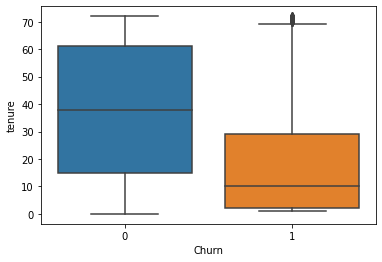

In [29]:
sns.boxplot(x = df.Churn, y = df.tenure)

In [30]:
# outliers present in data

#### b. Histogram – All Numeric Variables

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'Partner'}>],
       [<AxesSubplot:title={'center':'Dependents'}>,
        <AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'PhoneService'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>,
        <AxesSubplot:title={'center':'TotalCharges'}>, <AxesSubplot:>]],
      dtype=object)

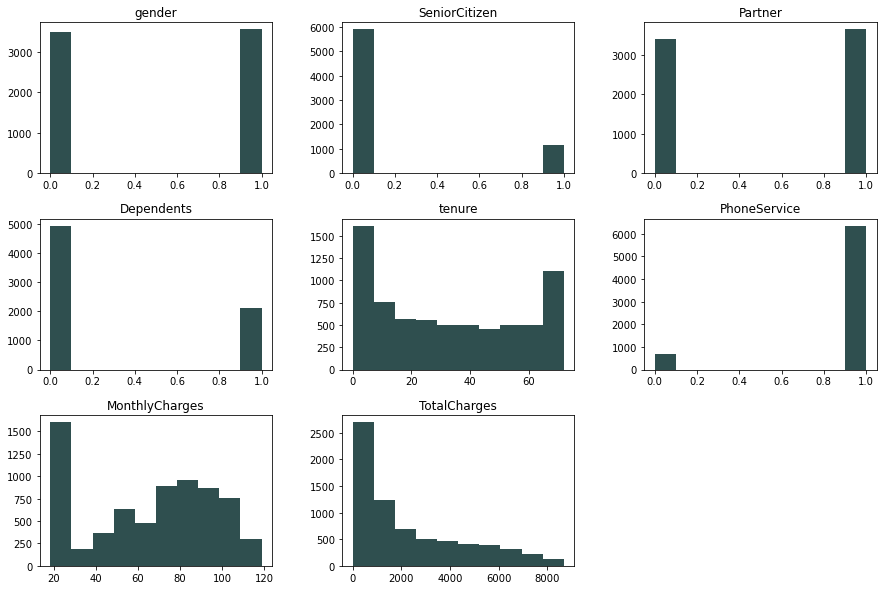

In [31]:
df0.hist(figsize=(15, 10),grid=False,color = "darkslategrey")

[Text(0.5, 0, 'Tenure in Months'), Text(0, 0.5, 'Count')]

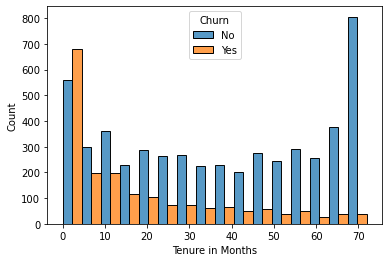

In [32]:
ax = sns.histplot(x = 'tenure', hue = 'Churn', data = df0, multiple='dodge')
ax.set(xlabel="Tenure in Months", ylabel = "Count")

In [33]:
#bionominal distribution

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

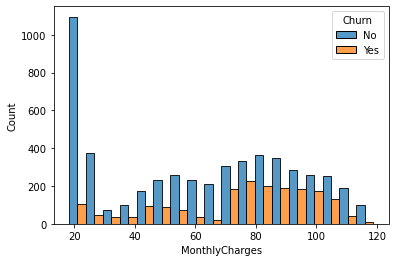

In [34]:
sns.histplot(x='MonthlyCharges',hue='Churn',data=df0,multiple='dodge')

#### c. Distribution Plot – All Numeric Variables 

D:\monika anakonda setup\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\monika anakonda setup\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\monika anakonda setup\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

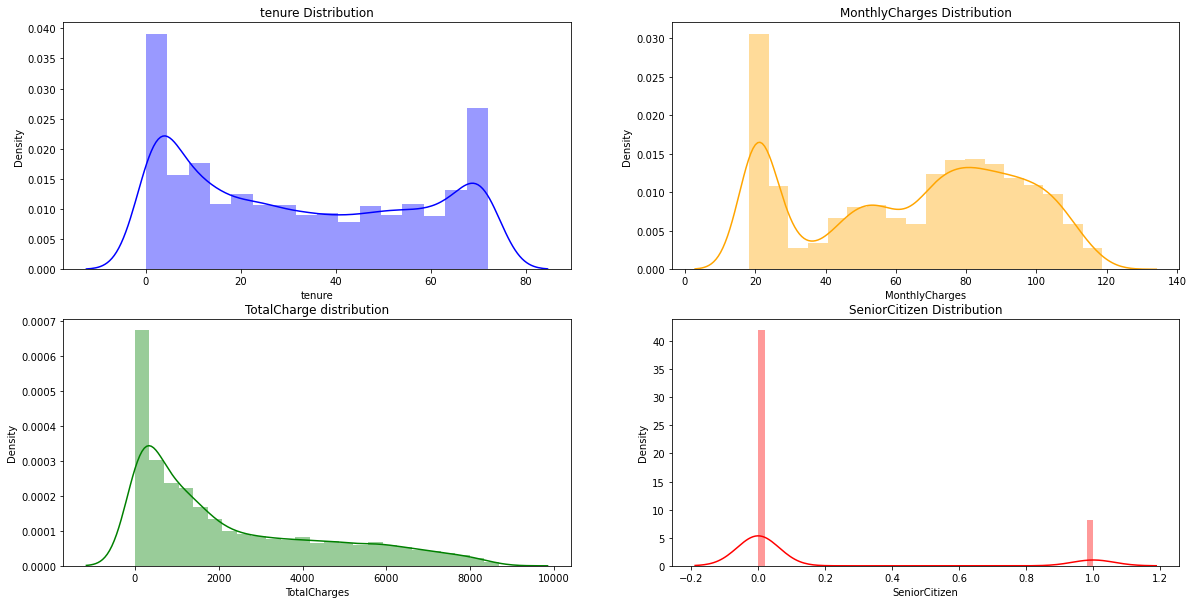

In [35]:
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (20,10))
sns.distplot(df0['tenure'], color = 'blue',  ax = axs[0][0])
sns.distplot(df0['MonthlyCharges'], color = 'orange',  ax = axs[0][1])
sns.distplot(df0['TotalCharges'], color = 'green',  ax = axs[1][0])
sns.distplot(df0['SeniorCitizen'], color = 'red',  ax = axs[1][1])
axs[0][0].set_title('tenure Distribution', fontsize = 12)
axs[0][1].set_title('MonthlyCharges Distribution', fontsize = 12)
axs[1][0].set_title('TotalCharge distribution', fontsize = 12)
axs[1][1].set_title('SeniorCitizen Distribution', fontsize = 12)
plt.show()

#### d. Aggregation for all numerical Columns 

In [36]:
df.describe()

gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7043.000000    7043.000000  7043.000000  7043.000000  7043.000000   
mean      0.504756       0.162147     0.516967     0.299588    32.371149   
std       0.500013       0.368612     0.499748     0.458110    24.559481   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     1.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  \
count   7043.000000       7043.000000     7043.000000   7043.000000   
mean       0.903166          0.407781       64.761692   2279.734304   
std        0.295752          0.491457       30.090047   2266.794470   
min        0.000000          0.000000       18.250000      0.000000   
25%        1.000000          0.000000       35.500000    398.550000   
50%        1.000000          0.000000       70.350000   1394.550000   
75%        1.000000          1.000000       89.850000   3786.600000   
max        1.000000          1.000000      118.750000   8684.800000   

             Churn  ...  StreamingTV_Yes  StreamingMovies_No  \
count  7043.000000  ...      7043.000000         7043.000000   
mean      0.265370  ...         0.384353            0.395428   
std       0.441561  ...         0.486477            0.488977   
min       0.000000  ...         0.000000            0.000000   
25%       0.000000  ...         0.000000            0.000000   
50%       0.000000  ...         0.000000            0.000000   
75%       1.000000  ...         1.000000            1.000000   
max       1.000000  ...         1.000000            1.000000   

       StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
count          7043.000000              7043.000000        7043.000000   
mean              0.387903                 0.550192           0.209144   
std               0.487307                 0.497510           0.406726   
min               0.000000                 0.000000           0.000000   
25%               0.000000                 0.000000           0.000000   
50%               0.000000                 1.000000           0.000000   
75%               1.000000                 1.000000           0.000000   
max               1.000000                 1.000000           1.000000   

       Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
count        7043.000000                              7043.000000   
mean            0.240664                                 0.219225   
std             0.427517                                 0.413751   
min             0.000000                                 0.000000   
25%             0.000000                                 0.000000   
50%             0.000000                                 0.000000   
75%             0.000000                                 0.000000   
max             1.000000                                 1.000000   

       PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
count                            7043.000000                     7043.000000   
mean                                0.216101                        0.335794   
std                                 0.411613                        0.472301   
min                                 0.000000                        0.000000   
25%                                 0.000000                        0.000000   
50%                                 0.000000                        0.000000   
75%                                 0.000000                        1.000000   
max                                 1.000000                        1.000000   

       PaymentMethod_Mailed check  
count                 7043.000000  
mean                     0.2

#### e. Unique Values across all columns 

In [37]:
df0.describe()

gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7043.000000    7043.000000  7043.000000  7043.000000  7043.000000   
mean      0.504756       0.162147     0.516967     0.299588    32.371149   
std       0.500013       0.368612     0.499748     0.458110    24.559481   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     1.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  MonthlyCharges  TotalCharges  
count   7043.000000     7043.000000   7043.000000  
mean       0.903166       64.761692   2279.734304  
std        0.295752       30.090047   2266.794470  
min        0.000000       18.250000      0.000000  
25%        1.000000       35.500000    398.550000  
50%        1.000000       70.350000   1394.550000  
75%        1.000000       89.850000   3786.600000  
max        1.000000      118.750000   8684.800000

#### g. Correlation – Heatmap - All Numeric Variables 

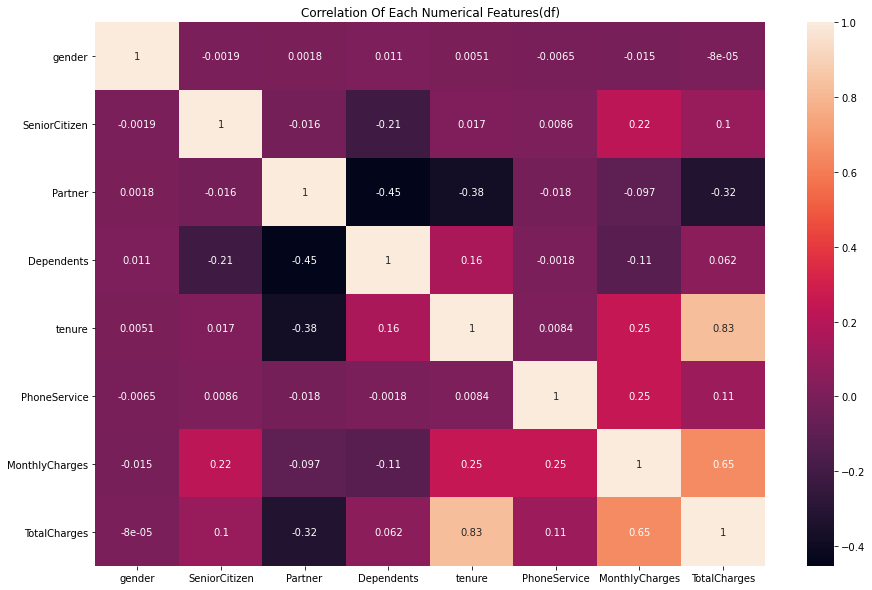

In [38]:
plt.figure(figsize = (15,10))
sns.heatmap(df0.corr(), annot = True)
plt.title("Correlation Of Each Numerical Features(df)")
plt.show()

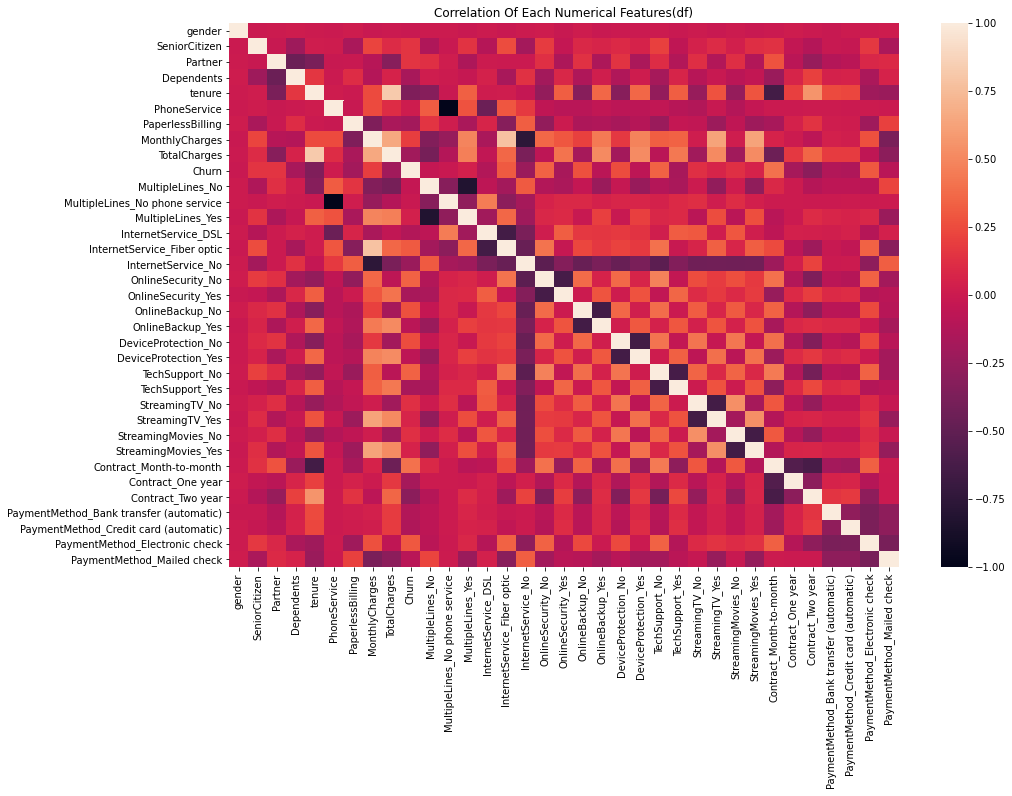

In [39]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr())
plt.title("Correlation Of Each Numerical Features(df)")
plt.show()

In [40]:
# we can't read. this heatmap

In [41]:
df.corr()['Churn'].sort_values(ascending = False)#Get Correlation of "Churn"

Churn                                      1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
MonthlyCharges                             0.193356
SeniorCitizen                              0.150889
Partner                                    0.150448
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService                               0.011942
gender                                    -0.008612
MultipleLines_No phone service            -0.011942
MultipleLine

#### Contract monthly, absence of online security and tech support seem to be positively correlated with churn.
#### Tenure, two year contracts and services such as Online security, Tech support, Online backup, Device protection seem to be negatively related to churn.
#### gender','StreamingMovies_No','StreamingTV_No','StreamingTV_Yes','StreamingMovies_Yes' seem to no difference

#### h. Regression Plot - All Numeric Variables 

In [42]:
cols = df0.columns.to_list()
num_cols= df0._get_numeric_data().columns.to_list()
cat_cols = list(set(cols) - set(num_cols))

print('Numerical Columns')
print(num_cols)
print('\nCategorical Columns')
print(cat_cols)

Numerical Columns
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MonthlyCharges', 'TotalCharges']

Categorical Columns
['Churn', 'Contract', 'PaymentMethod', 'OnlineSecurity', 'MultipleLines', 'InternetService', 'StreamingMovies', 'OnlineBackup', 'DeviceProtection', 'PaperlessBilling', 'TechSupport', 'StreamingTV']


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


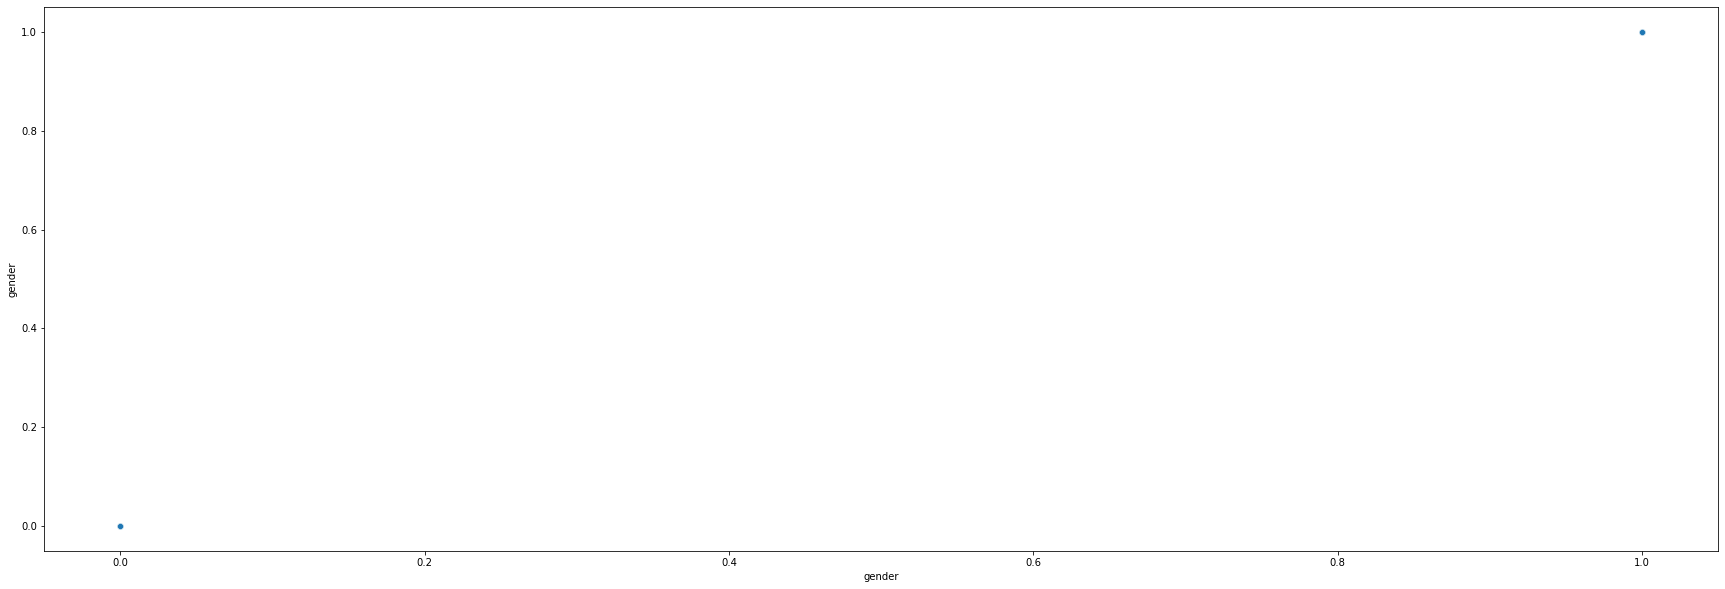

Visualizing Numerical Features with gender


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


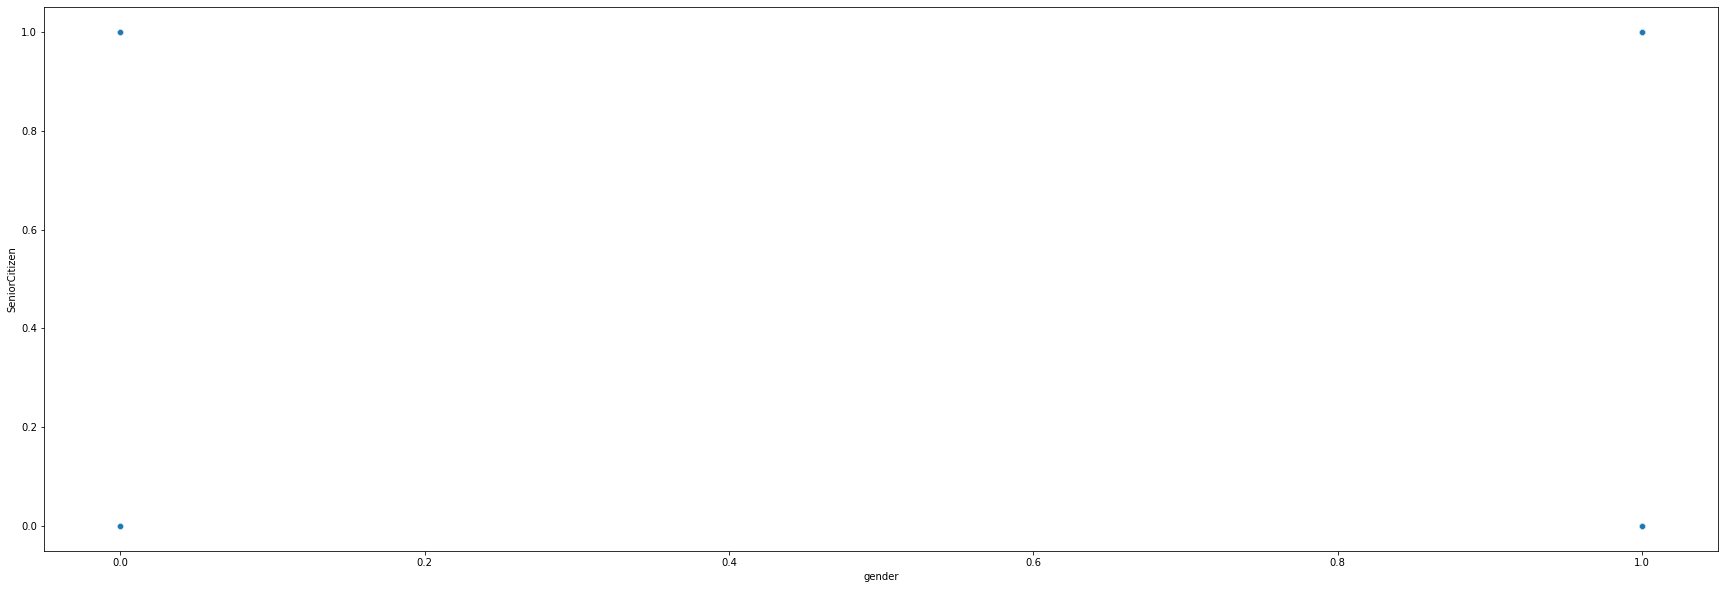

Visualizing Numerical Features with gender


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


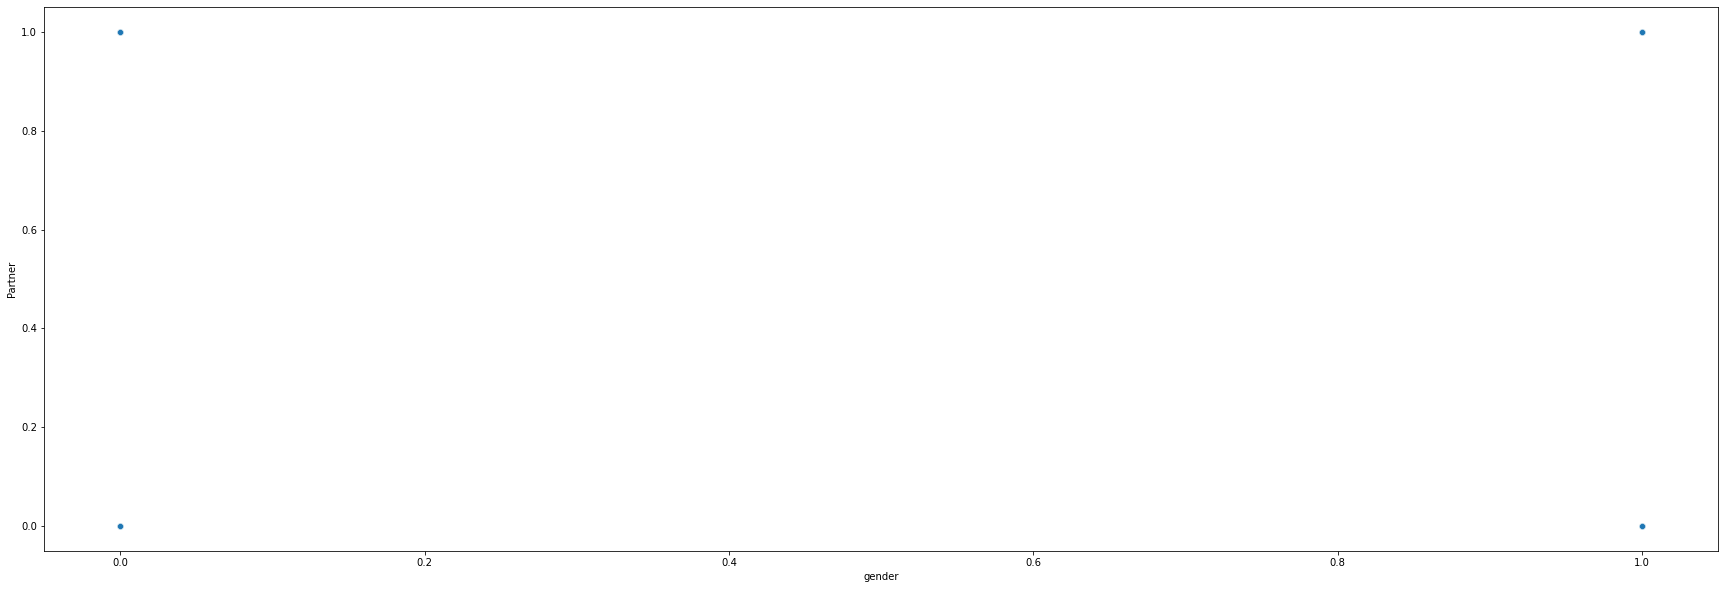

Visualizing Numerical Features with gender


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


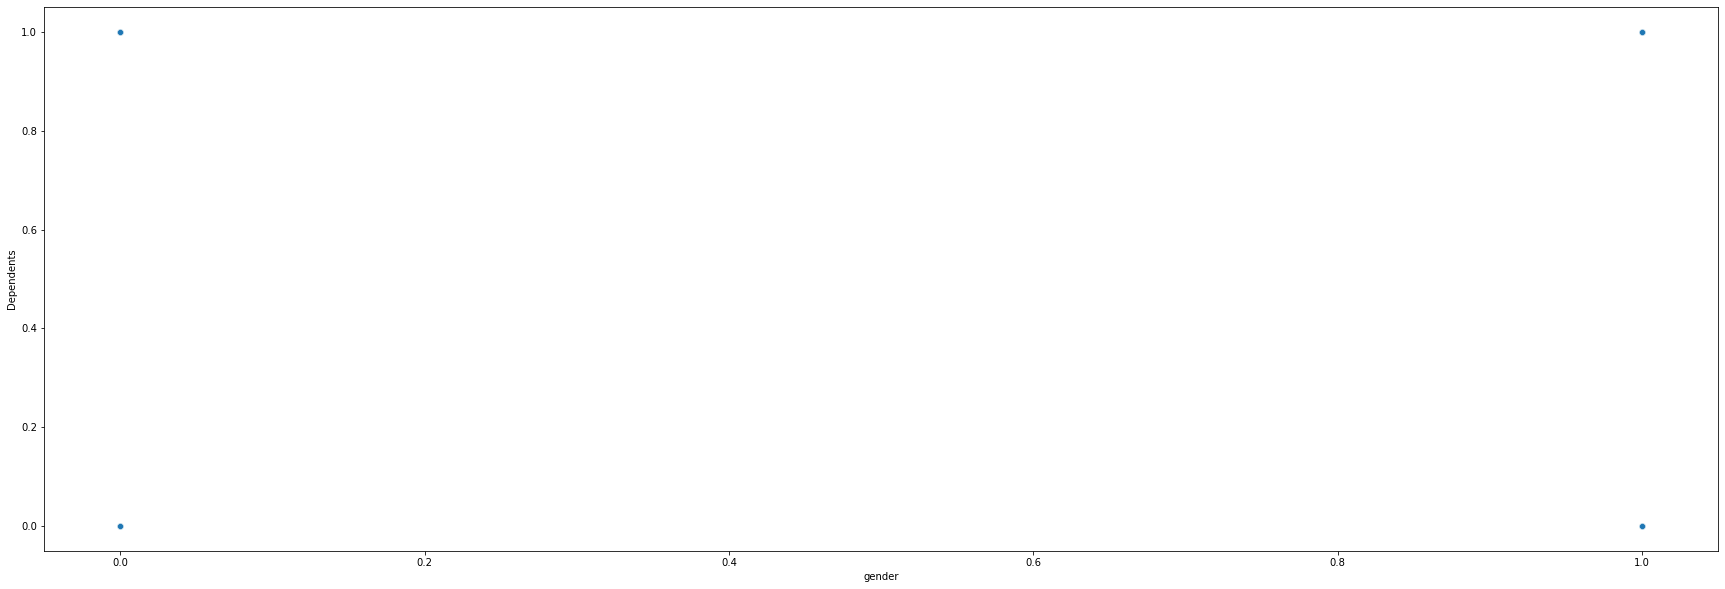

Visualizing Numerical Features with gender


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


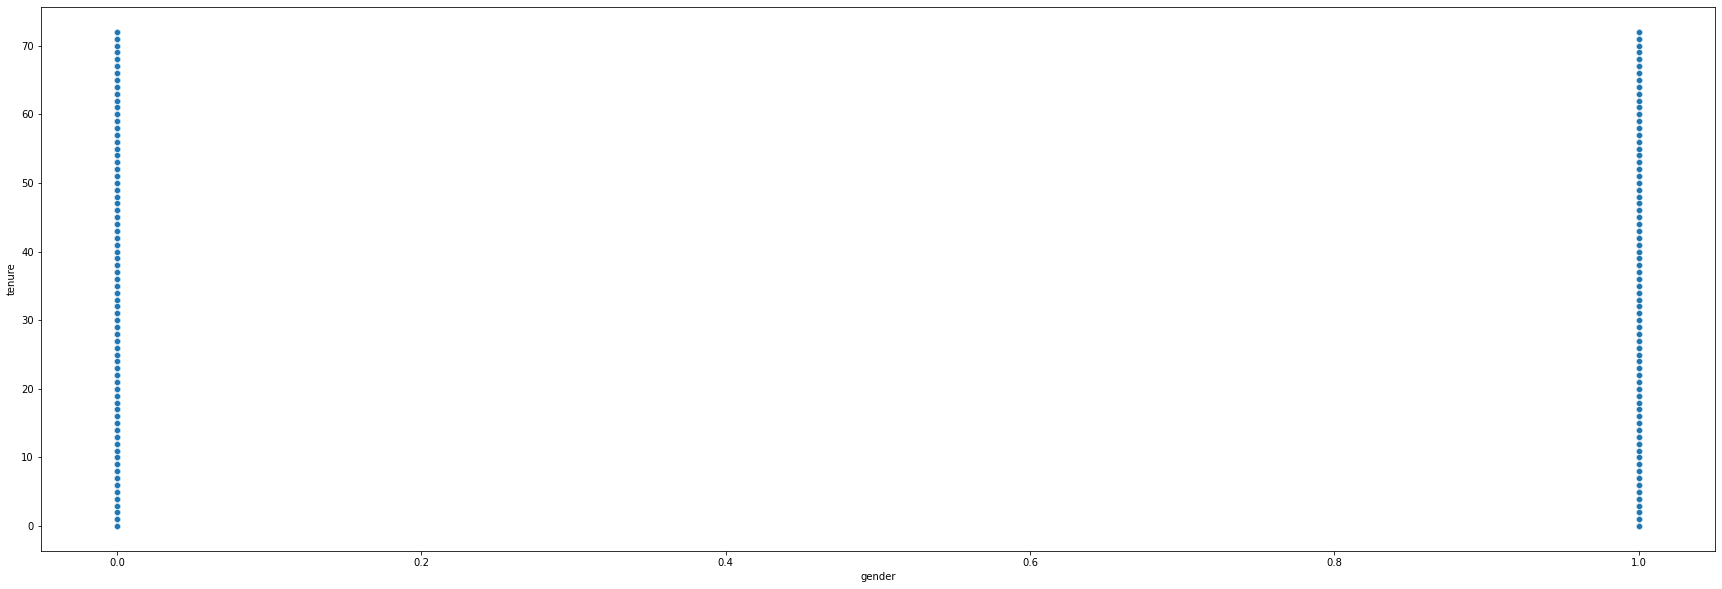

Visualizing Numerical Features with gender


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


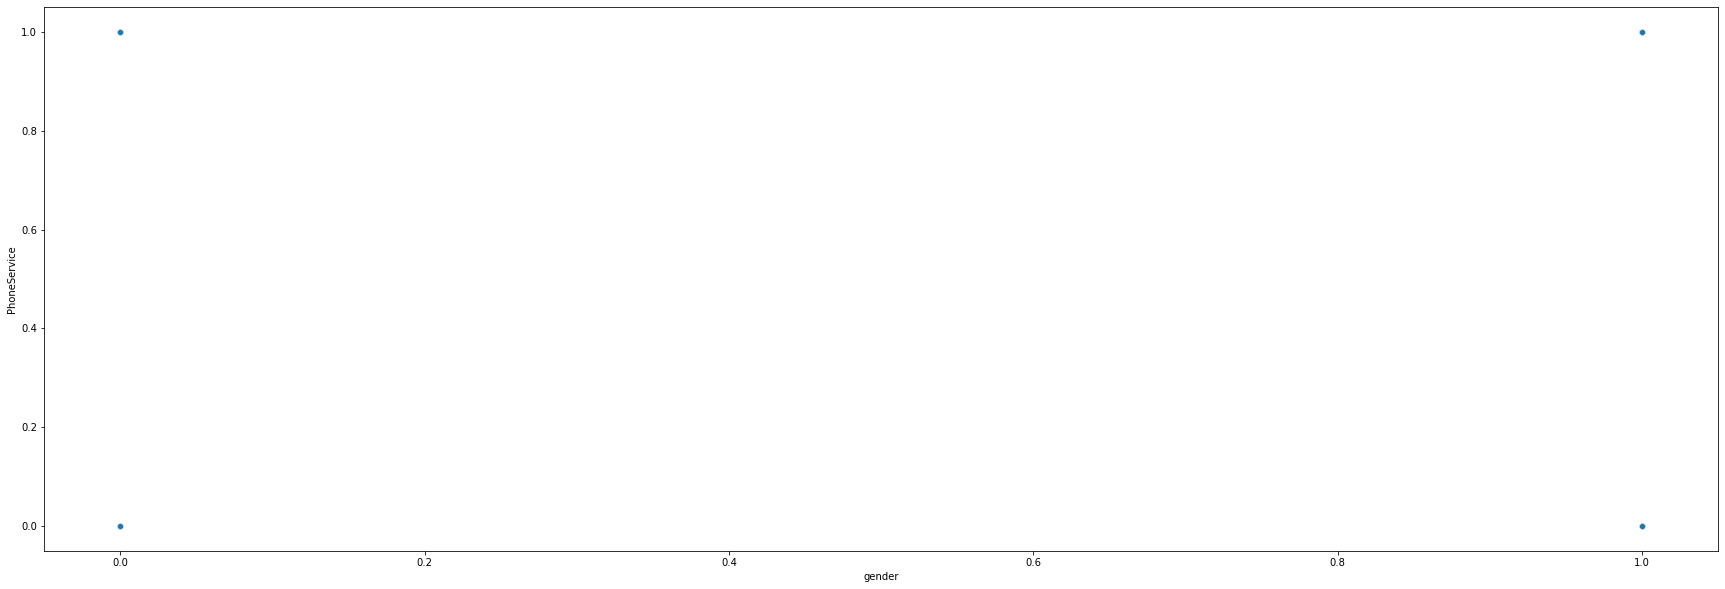

Visualizing Numerical Features with gender


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


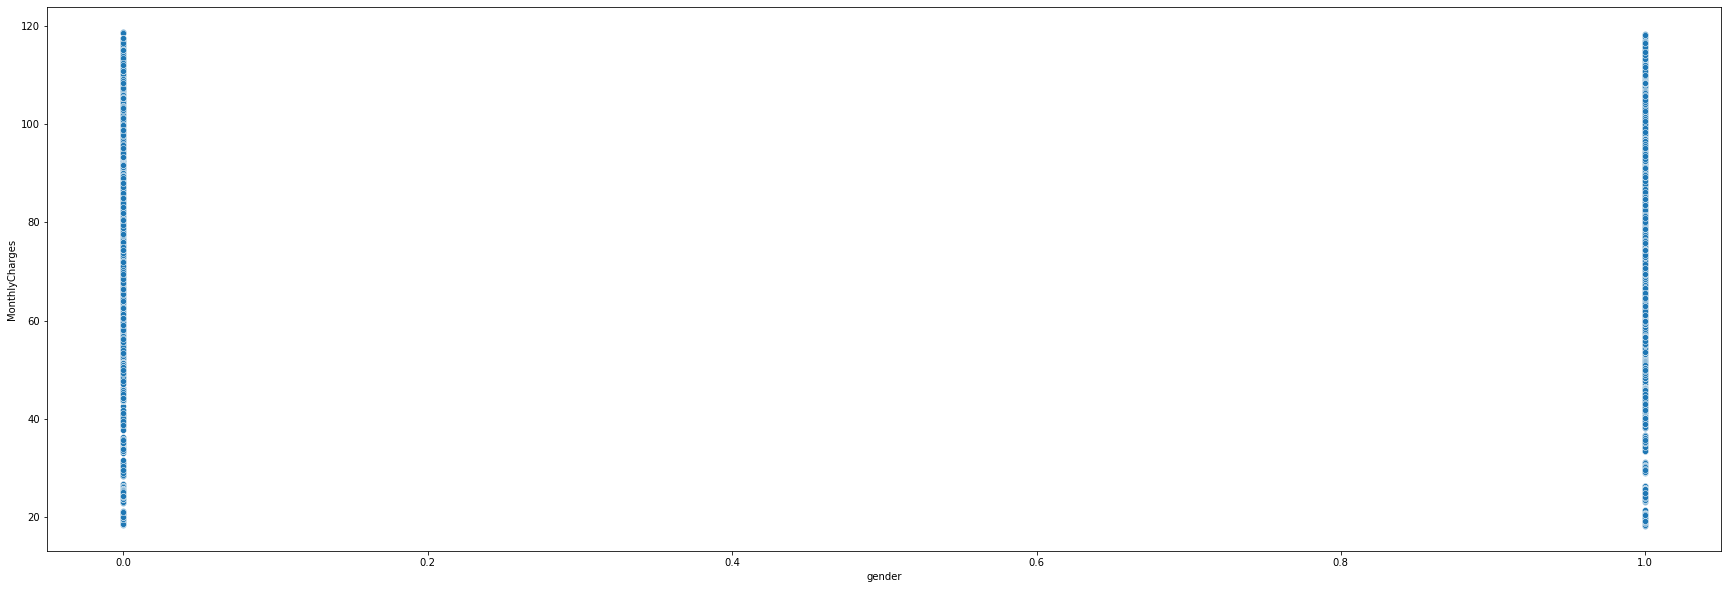

Visualizing Numerical Features with gender


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


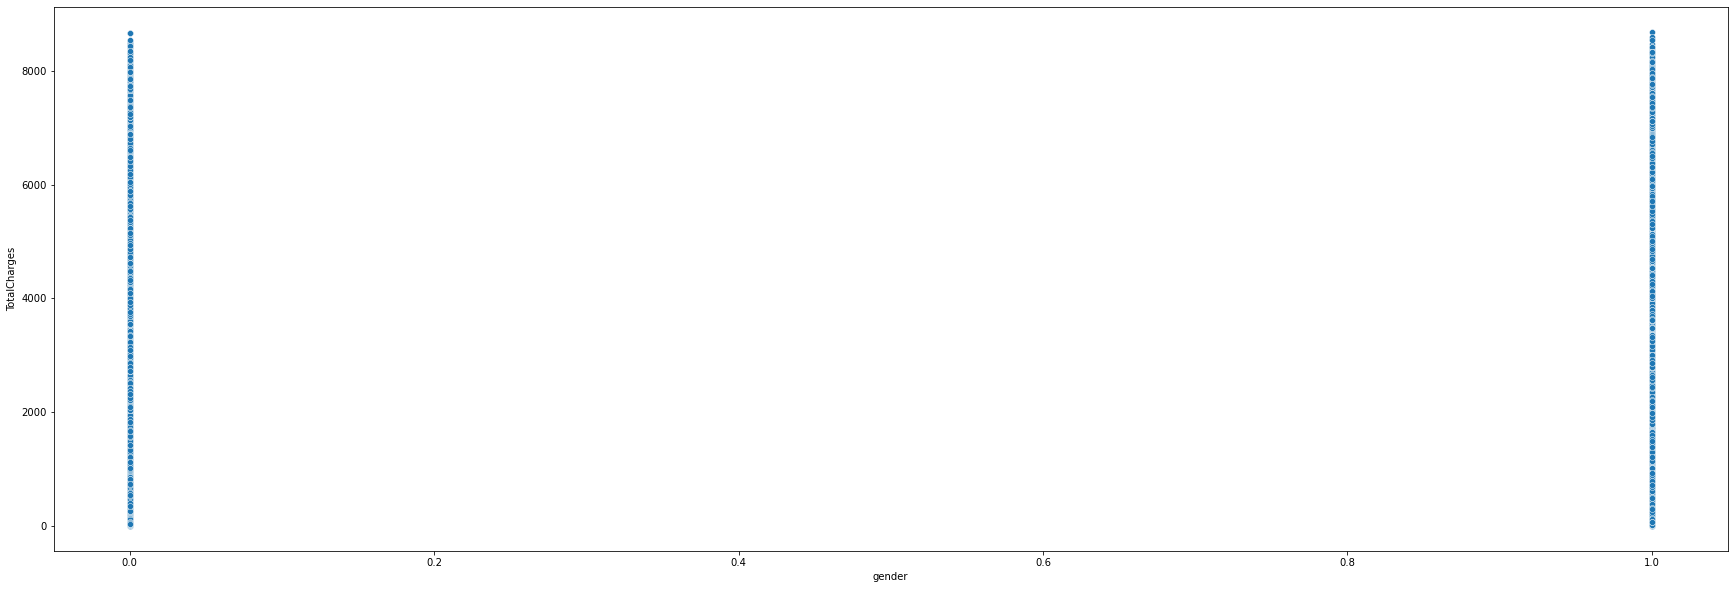

Visualizing Numerical Features with gender


In [43]:
for i in df0[num_cols]:
    plt.figure(figsize=(30,10))
    sns.scatterplot(df0['gender'],df0[i])
    plt.show()
    print("Visualizing Numerical Features with gender")

D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


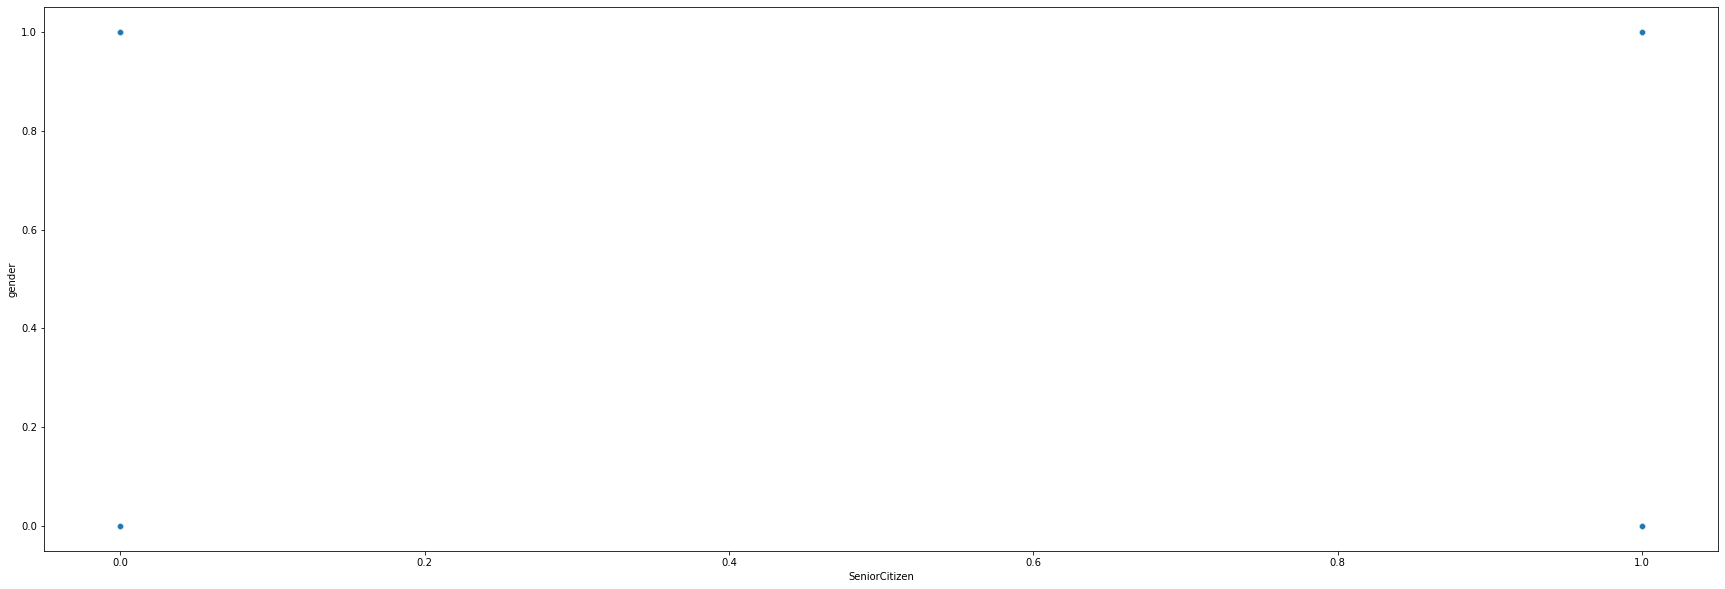

Visualizing Numerical Features with SeniorCitizen


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


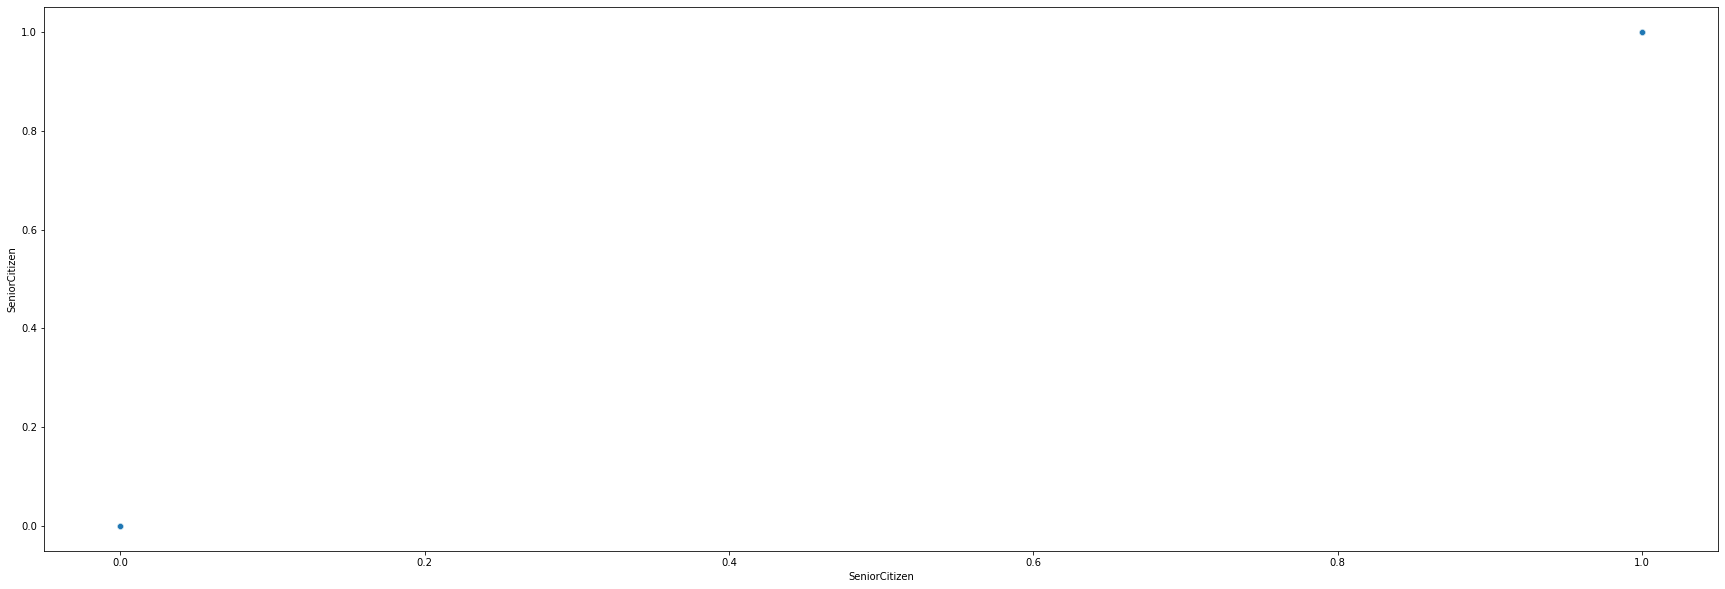

Visualizing Numerical Features with SeniorCitizen


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


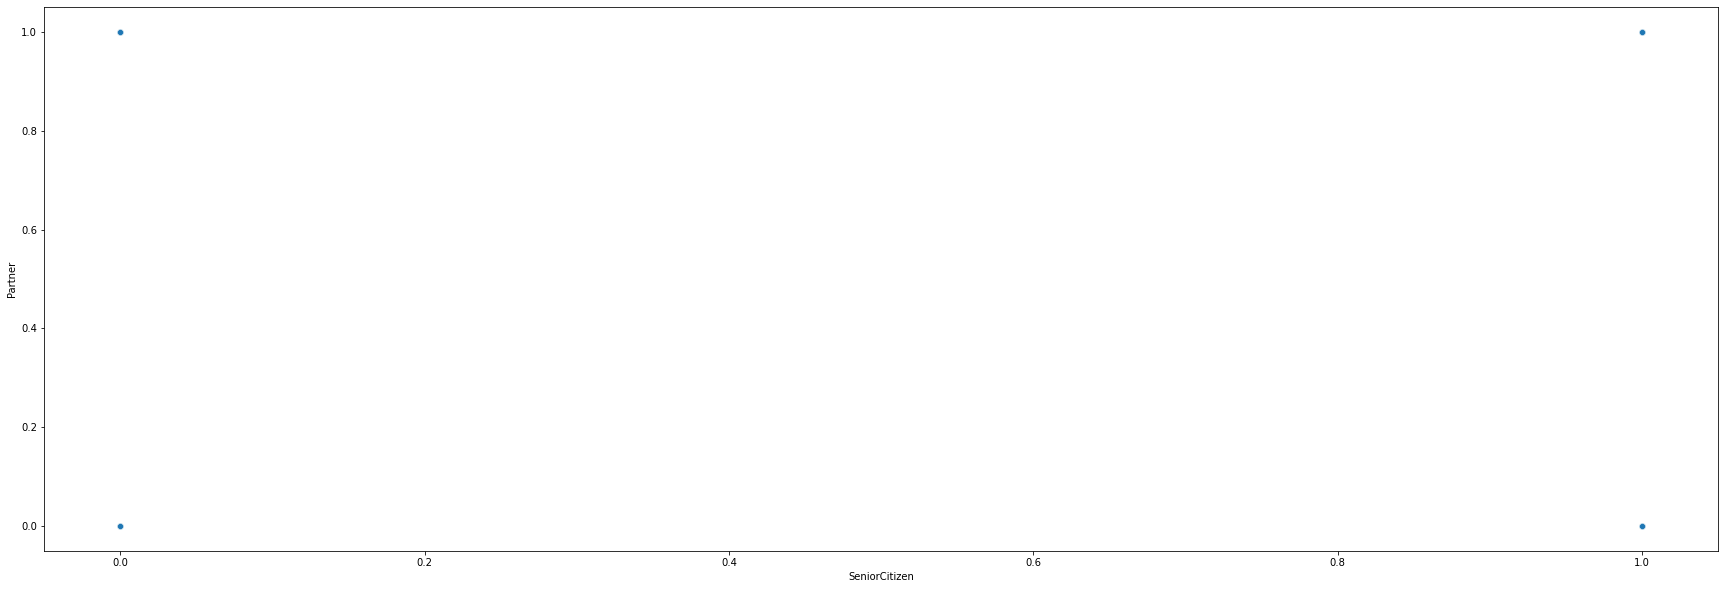

Visualizing Numerical Features with SeniorCitizen


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


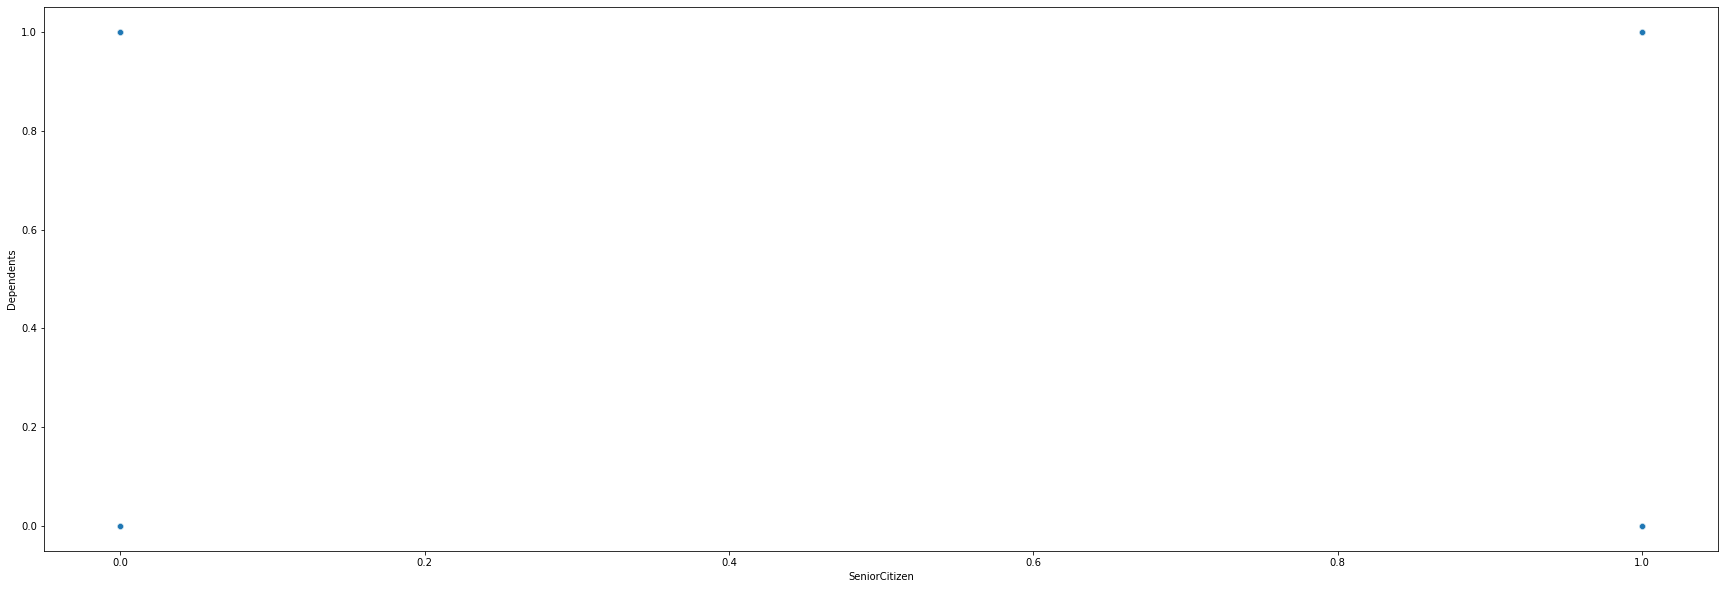

Visualizing Numerical Features with SeniorCitizen


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


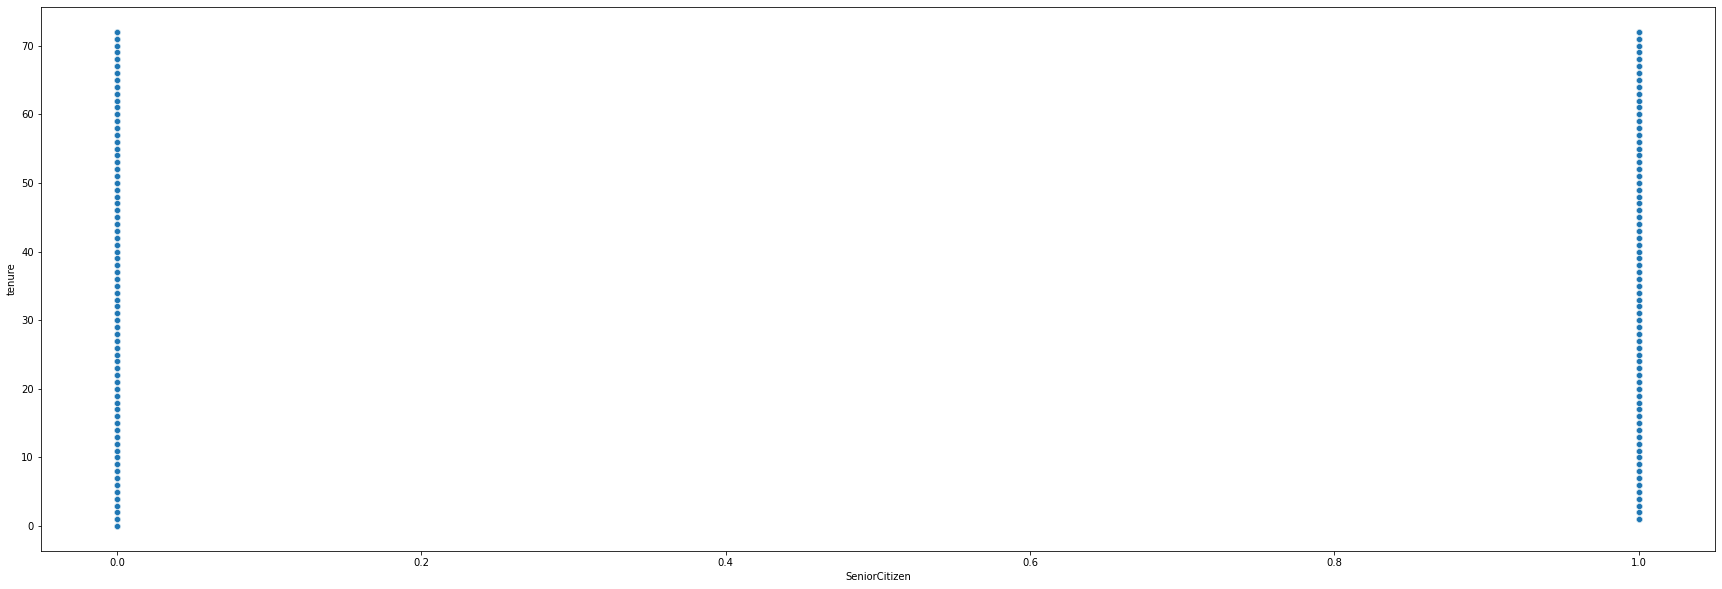

Visualizing Numerical Features with SeniorCitizen


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


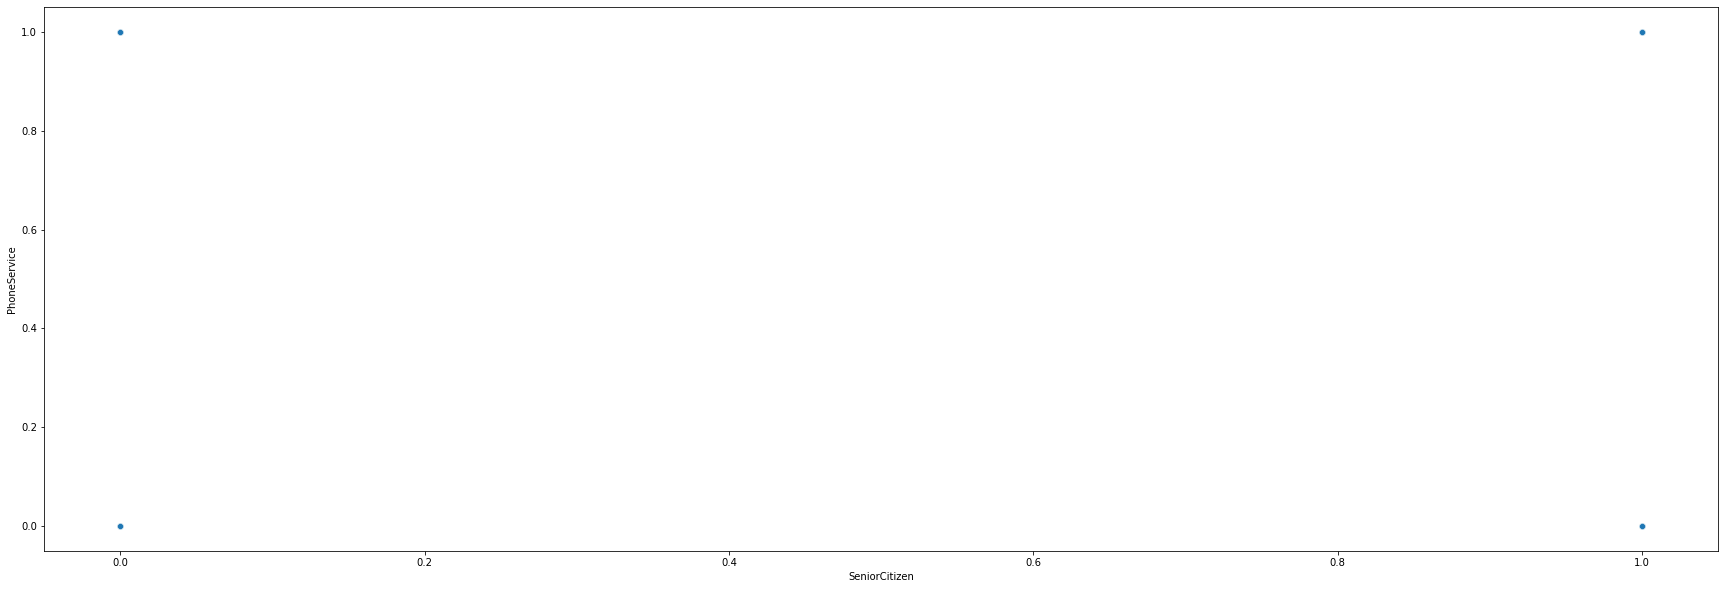

Visualizing Numerical Features with SeniorCitizen


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


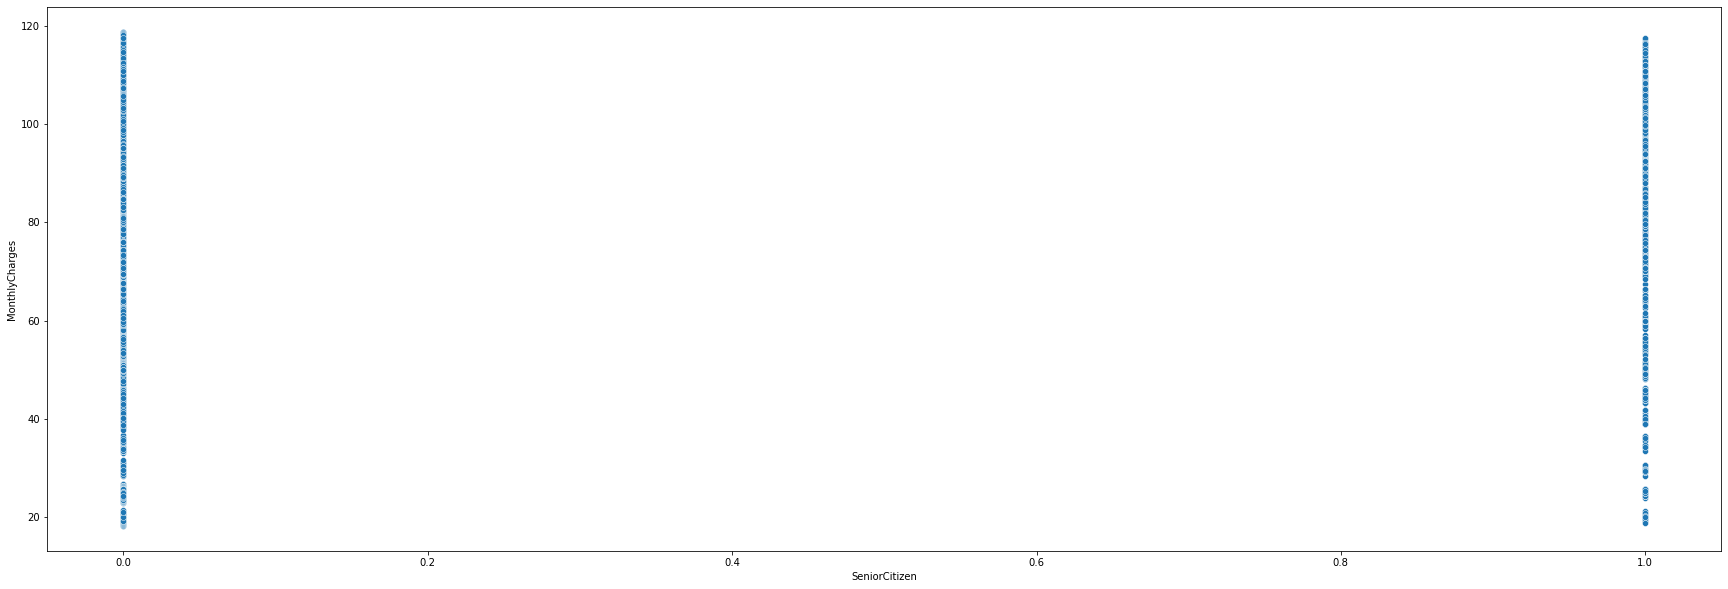

Visualizing Numerical Features with SeniorCitizen


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


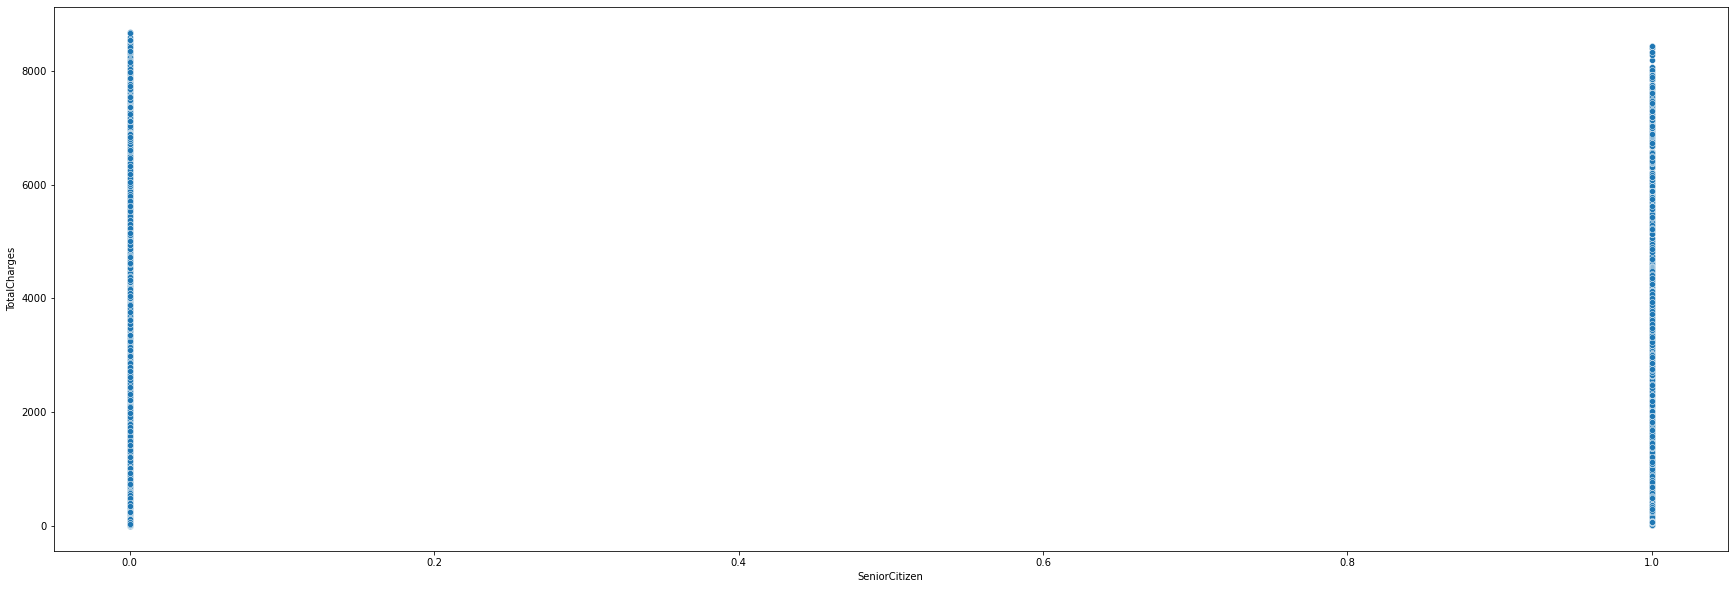

Visualizing Numerical Features with SeniorCitizen


In [44]:
for i in df0[num_cols]:
    plt.figure(figsize=(30,10))
    sns.scatterplot(df0['SeniorCitizen'],df0[i])
    plt.show()
    print("Visualizing Numerical Features with SeniorCitizen")

D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


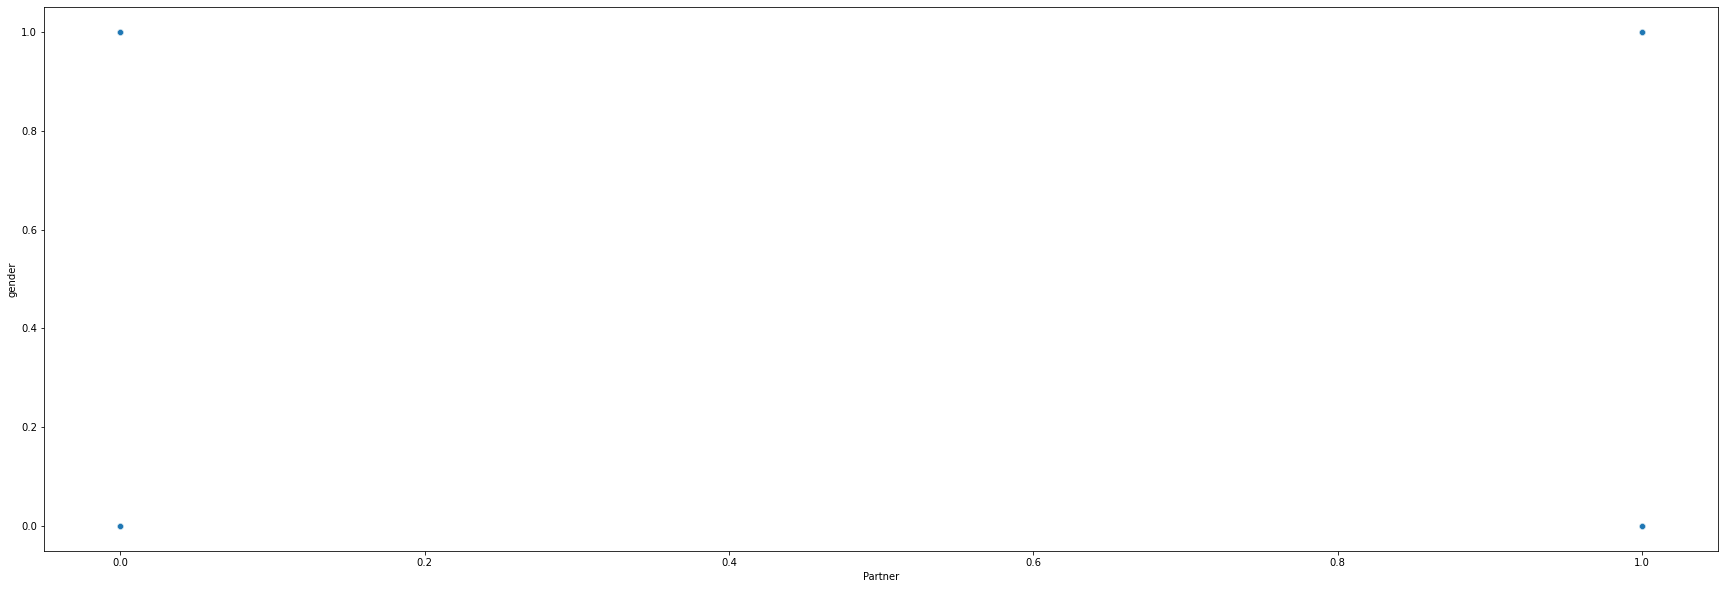

Visualizing Numerical Features with Partner


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


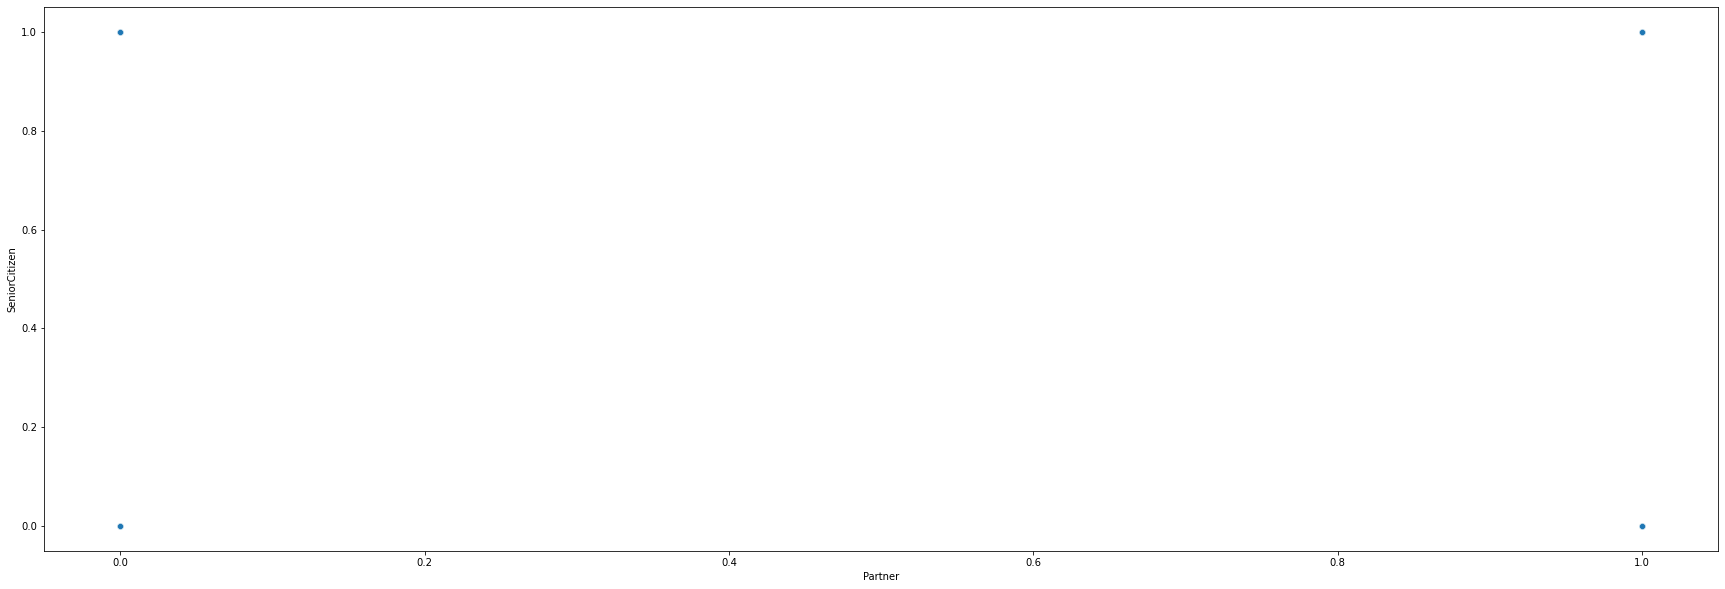

Visualizing Numerical Features with Partner


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


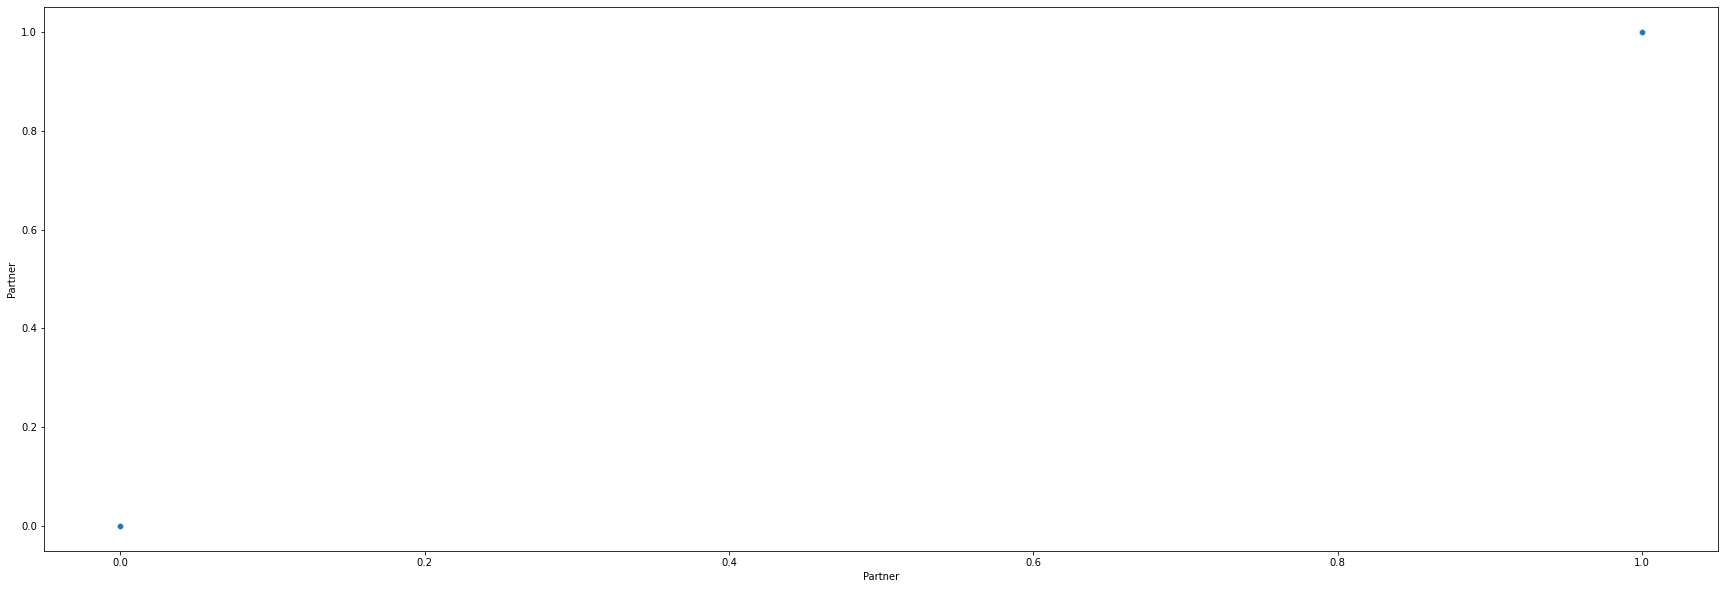

Visualizing Numerical Features with Partner


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


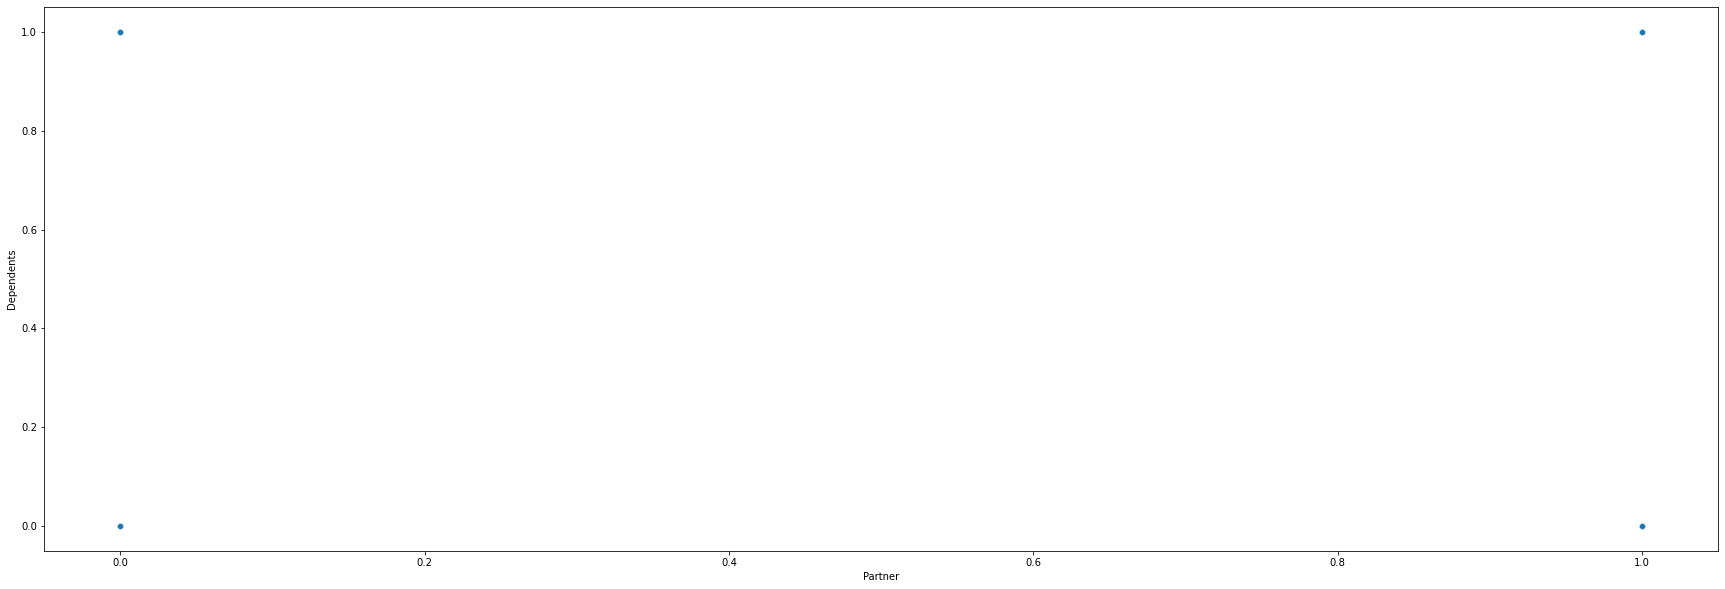

Visualizing Numerical Features with Partner


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


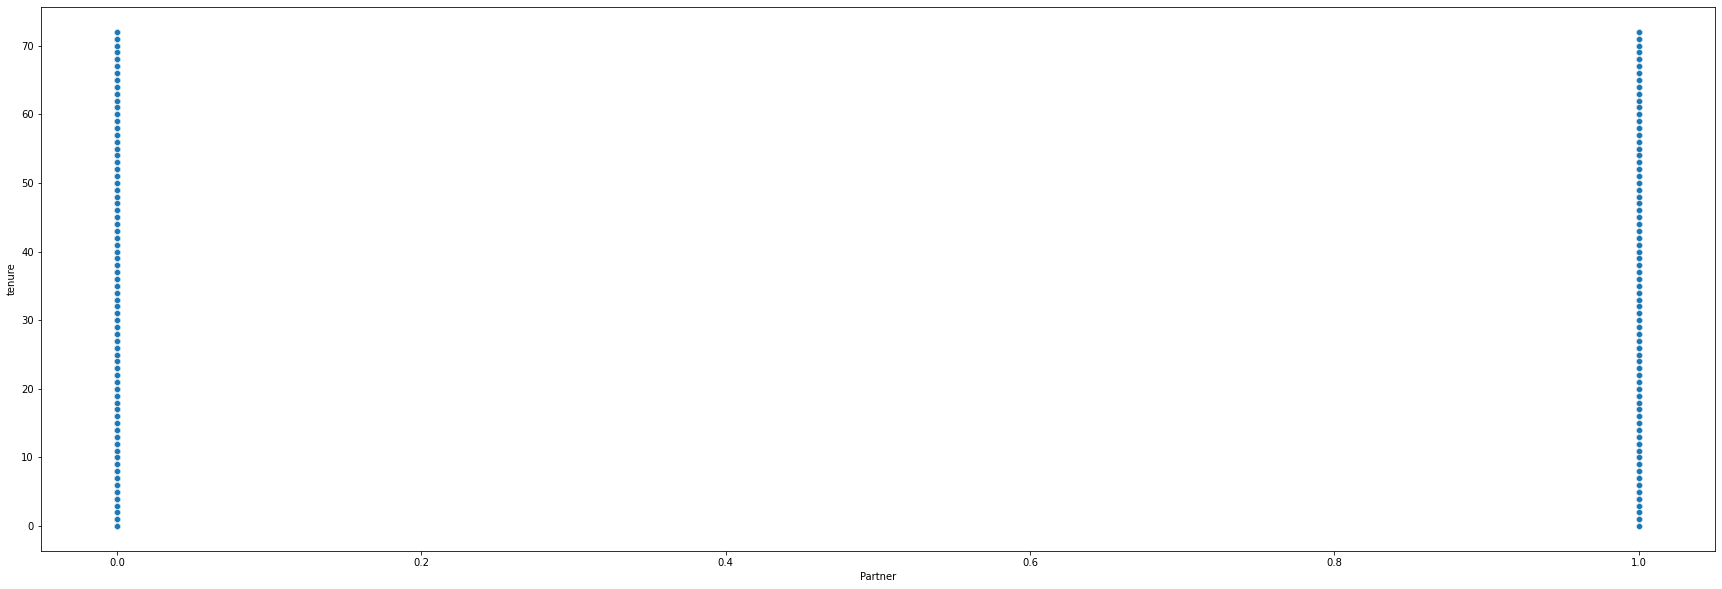

Visualizing Numerical Features with Partner


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


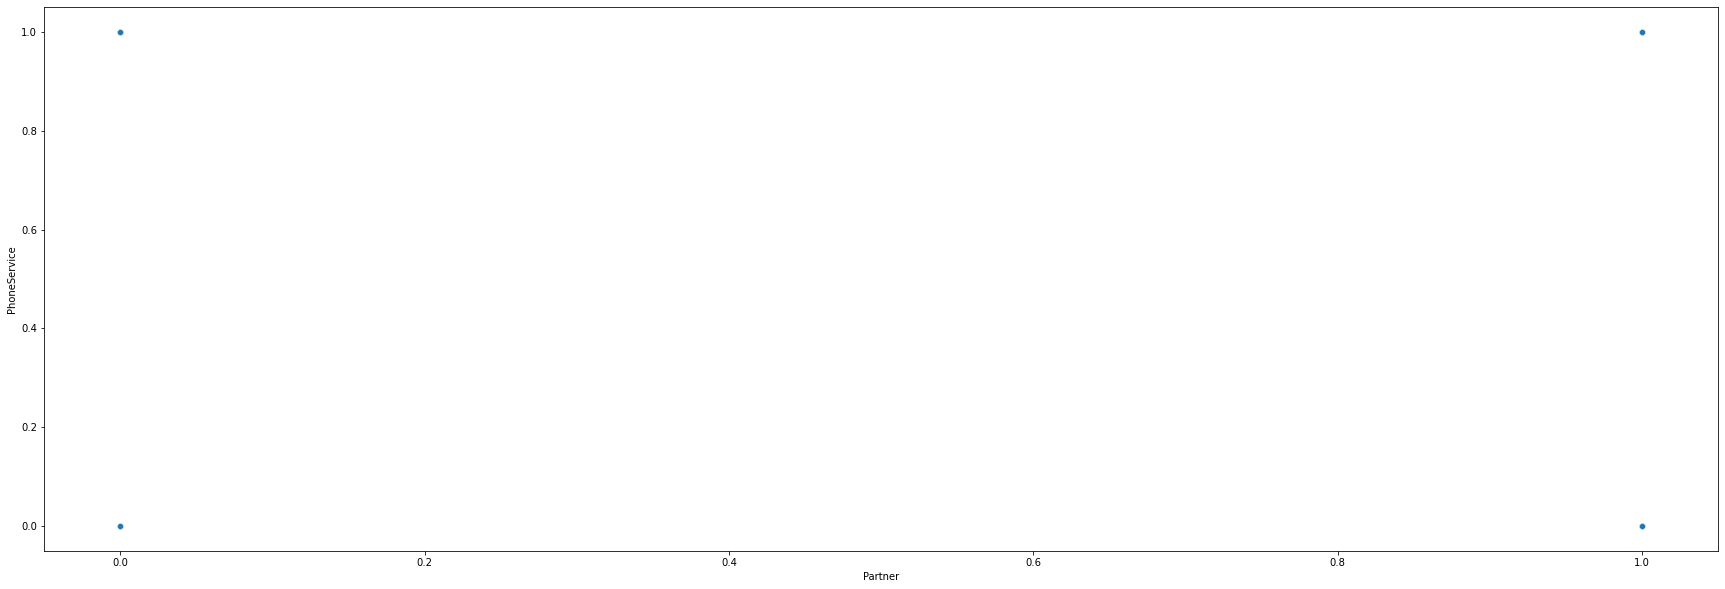

Visualizing Numerical Features with Partner


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


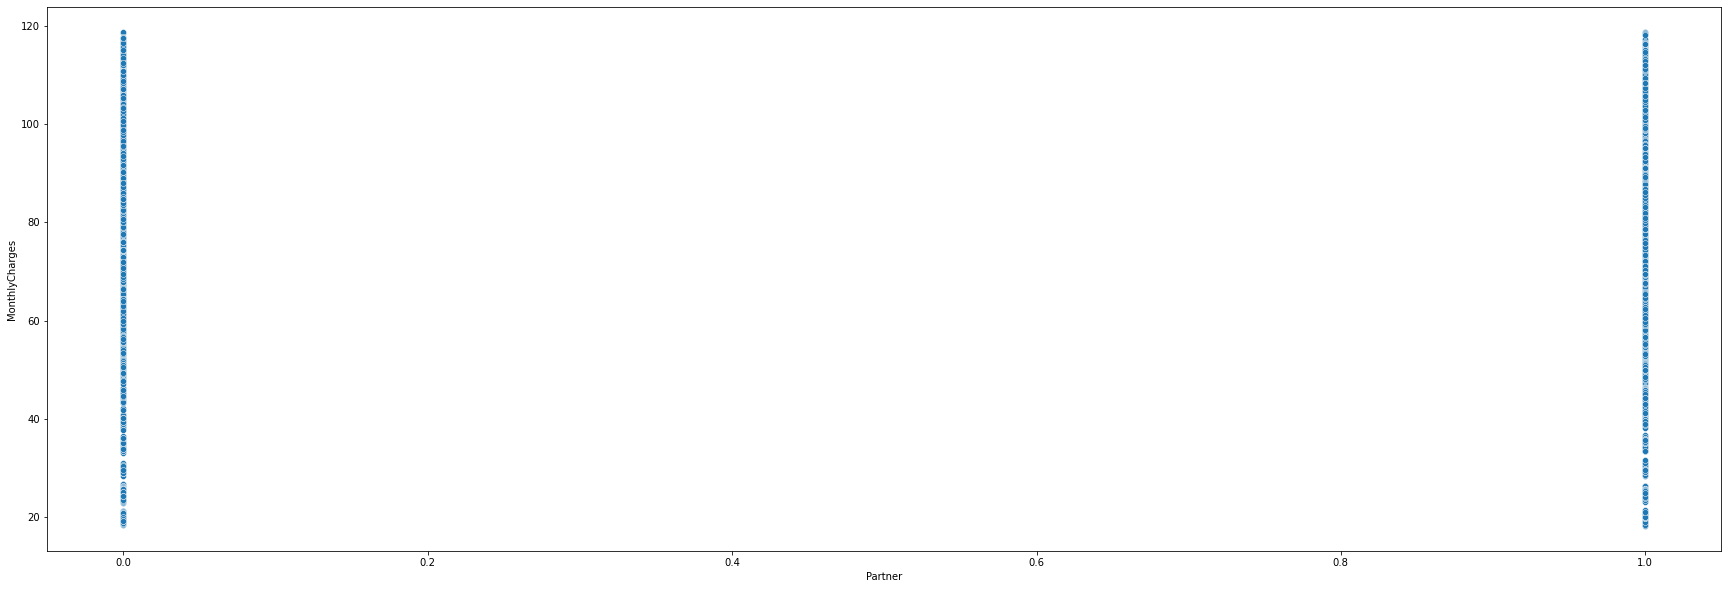

Visualizing Numerical Features with Partner


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


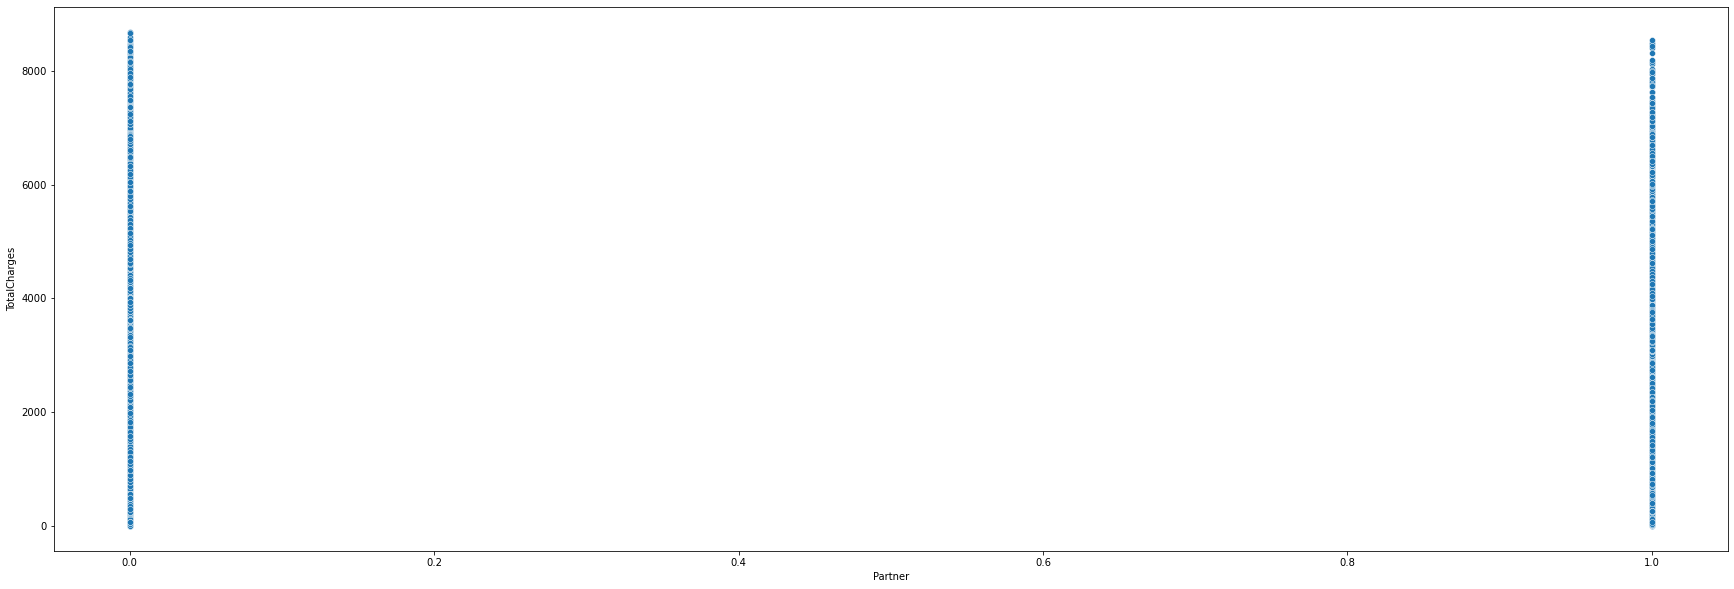

Visualizing Numerical Features with Partner


In [45]:
for i in df0[num_cols]:
    plt.figure(figsize=(30,10))
    sns.scatterplot(df0['Partner'],df0[i])
    plt.show()
    print("Visualizing Numerical Features with Partner")

D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


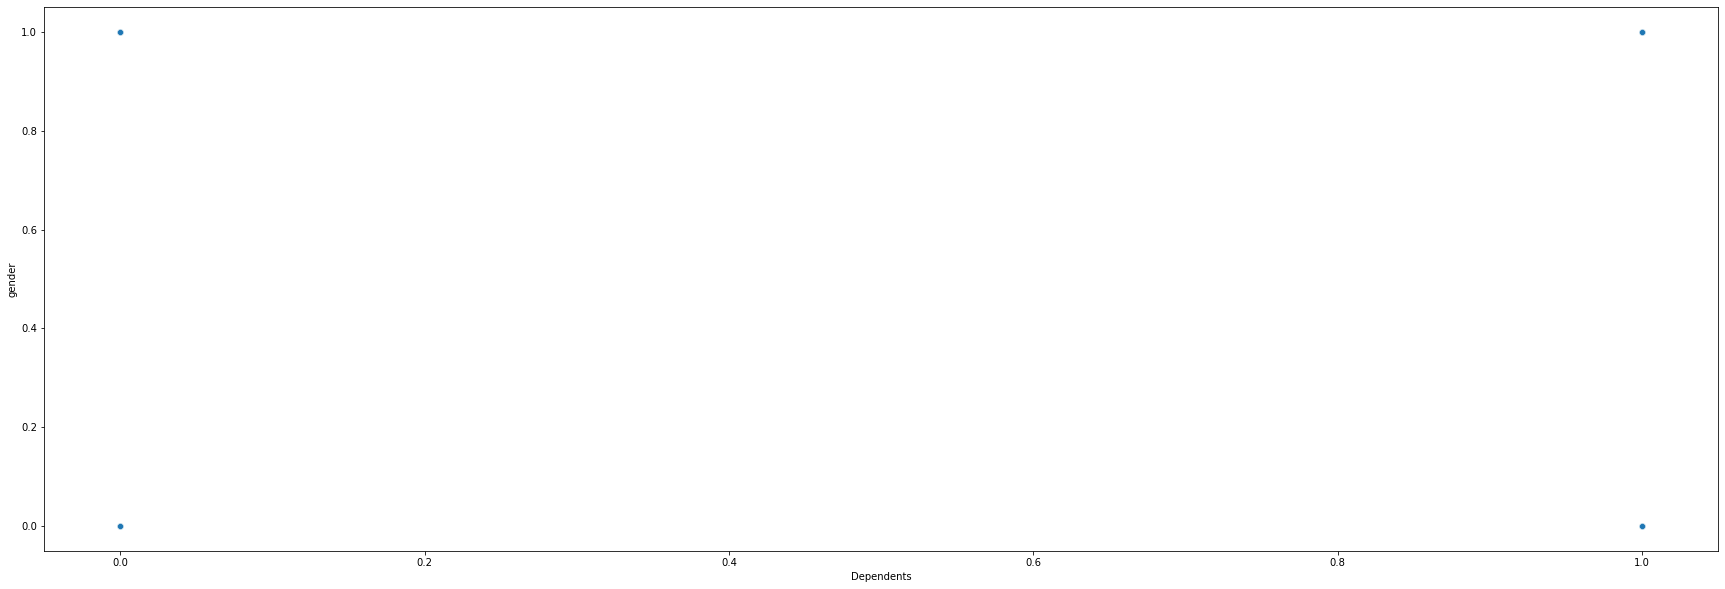

Visualizing Numerical Features with Dependents


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


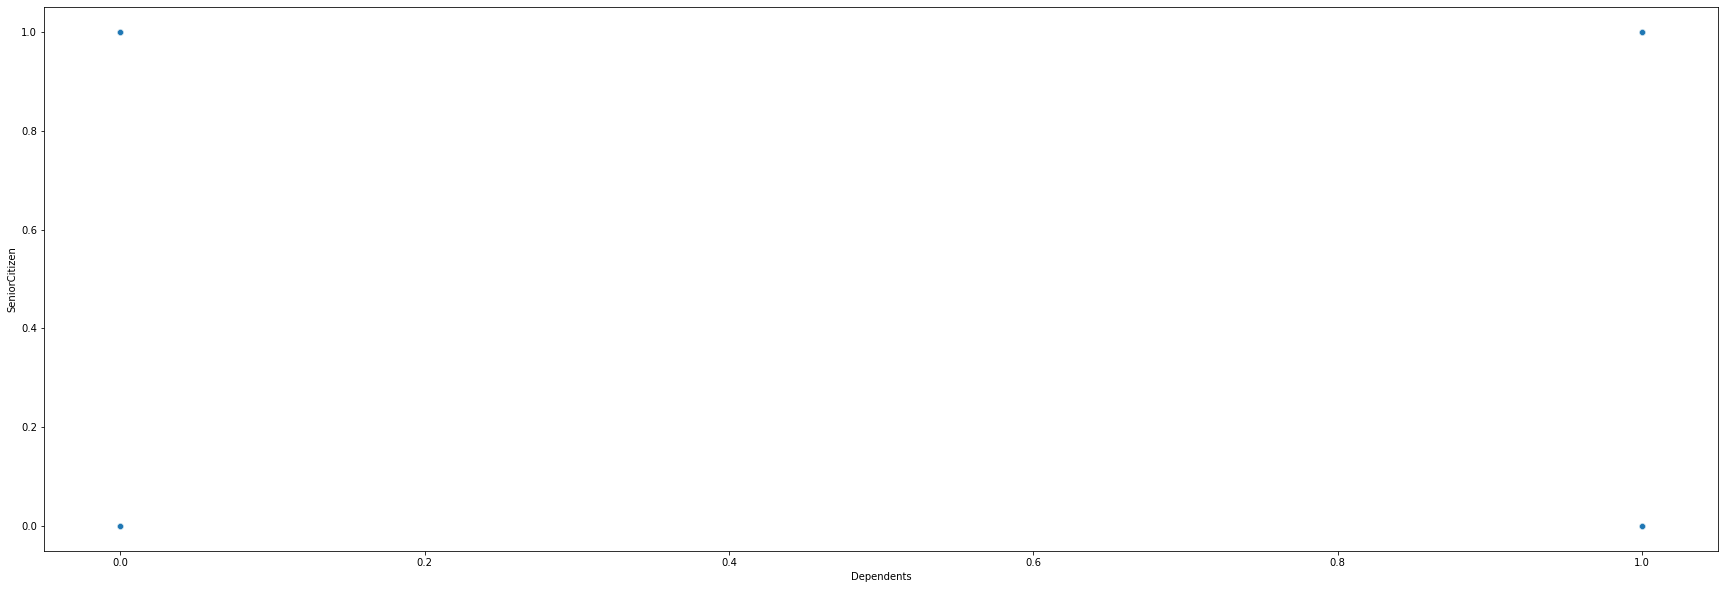

Visualizing Numerical Features with Dependents


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


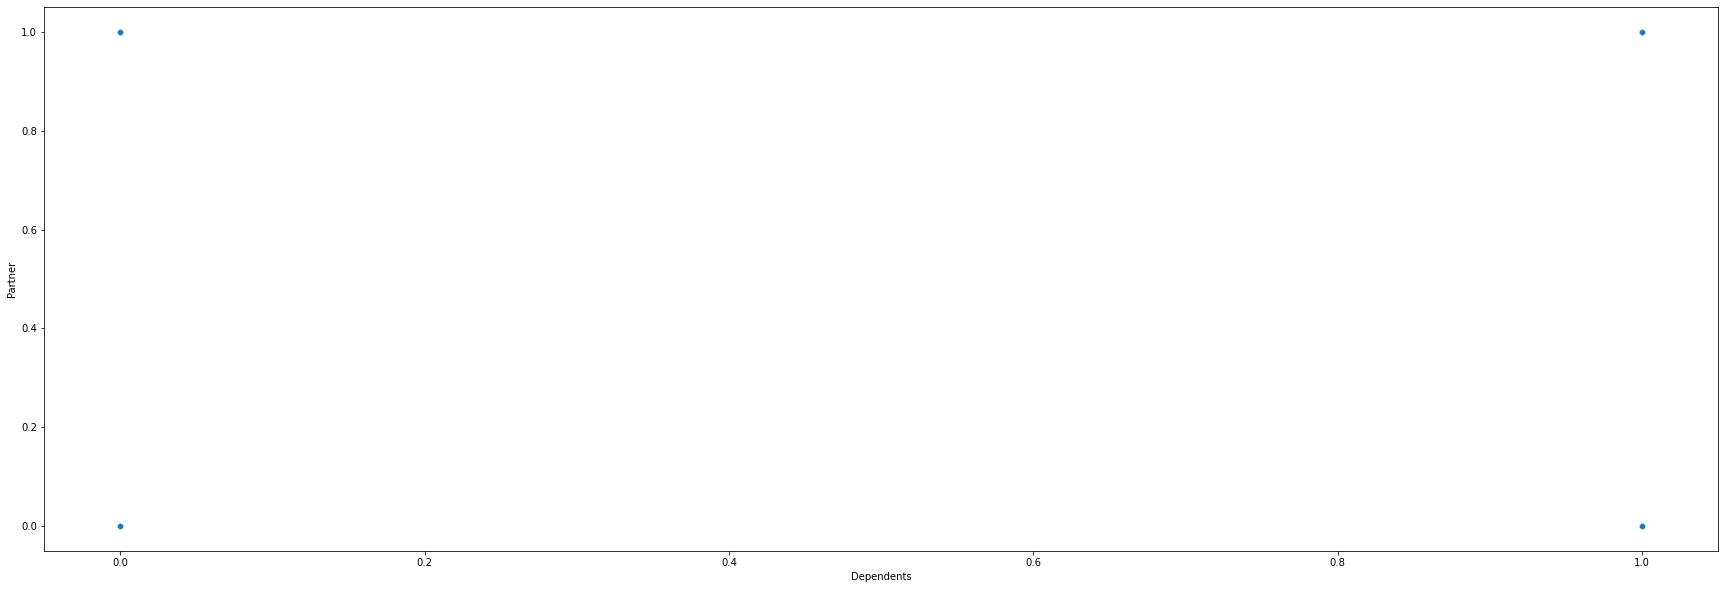

Visualizing Numerical Features with Dependents


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


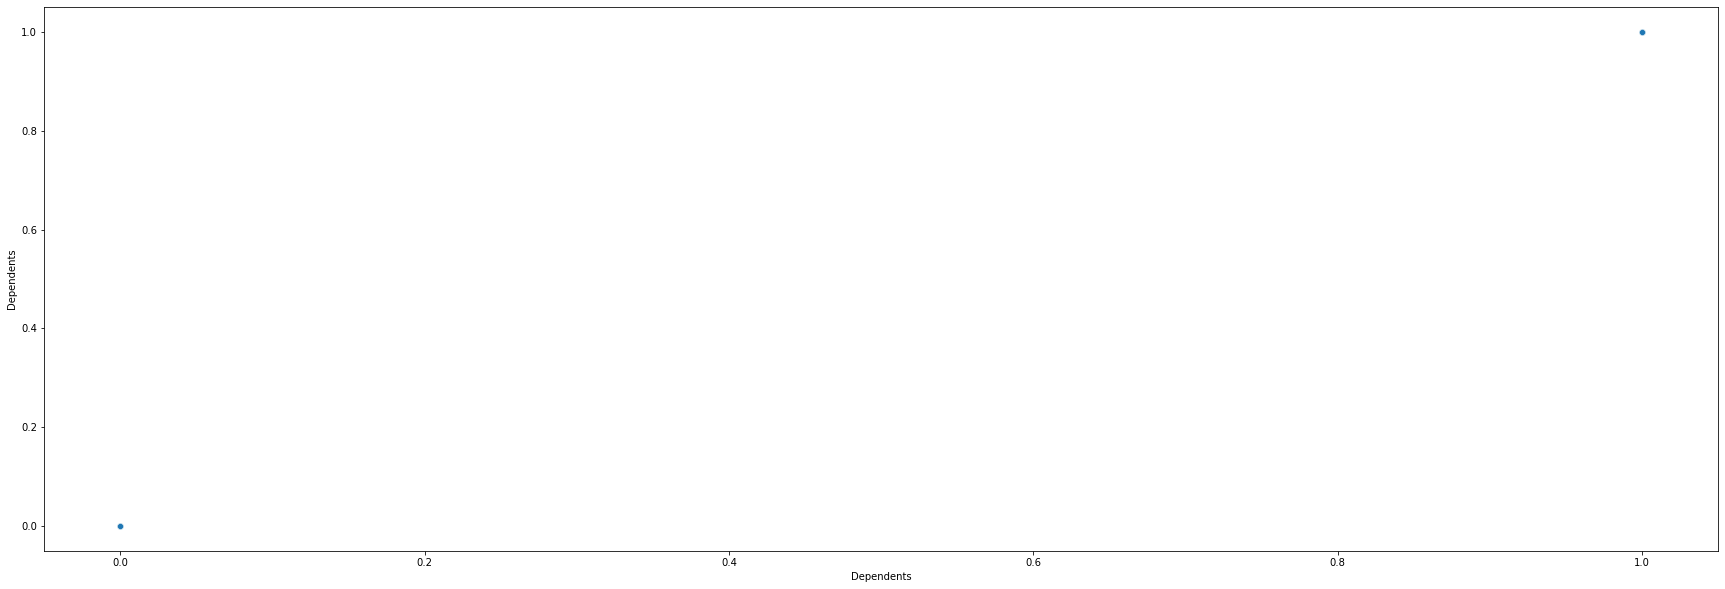

Visualizing Numerical Features with Dependents


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


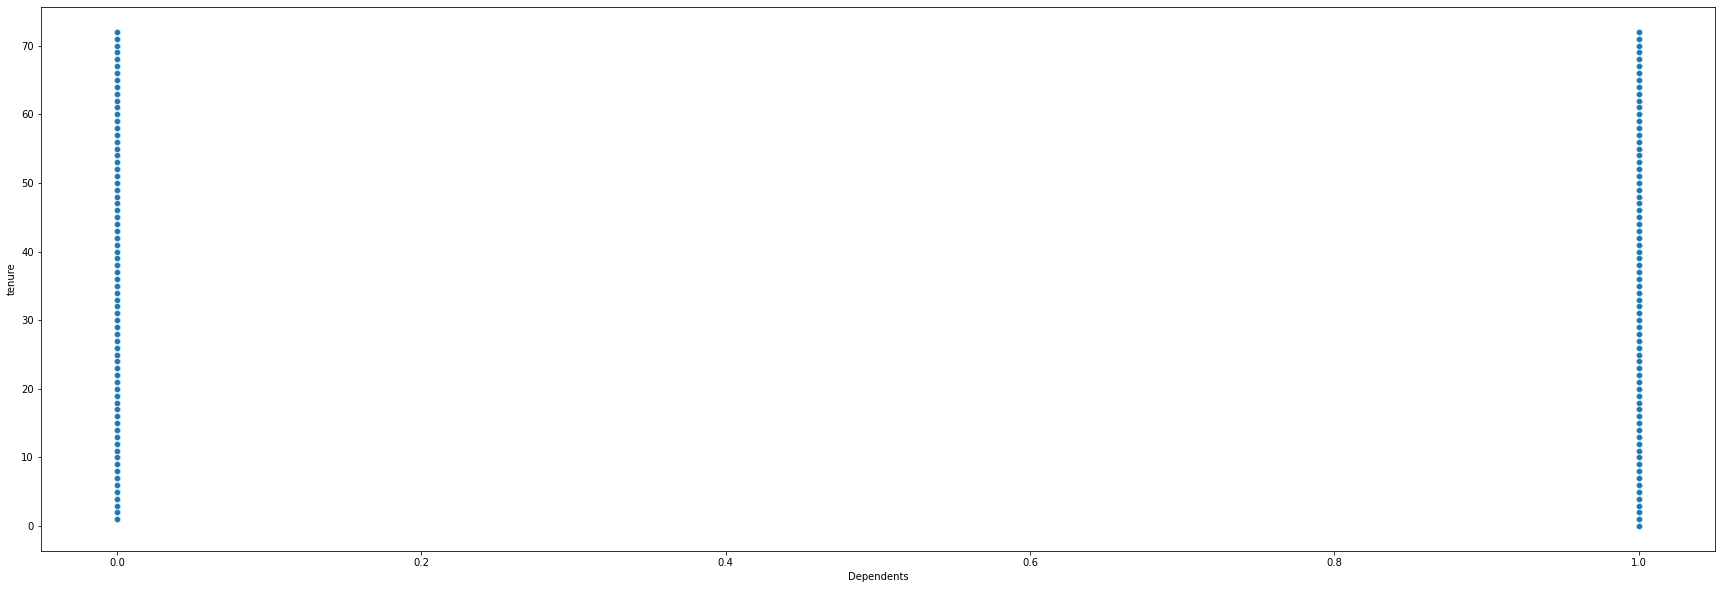

Visualizing Numerical Features with Dependents


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


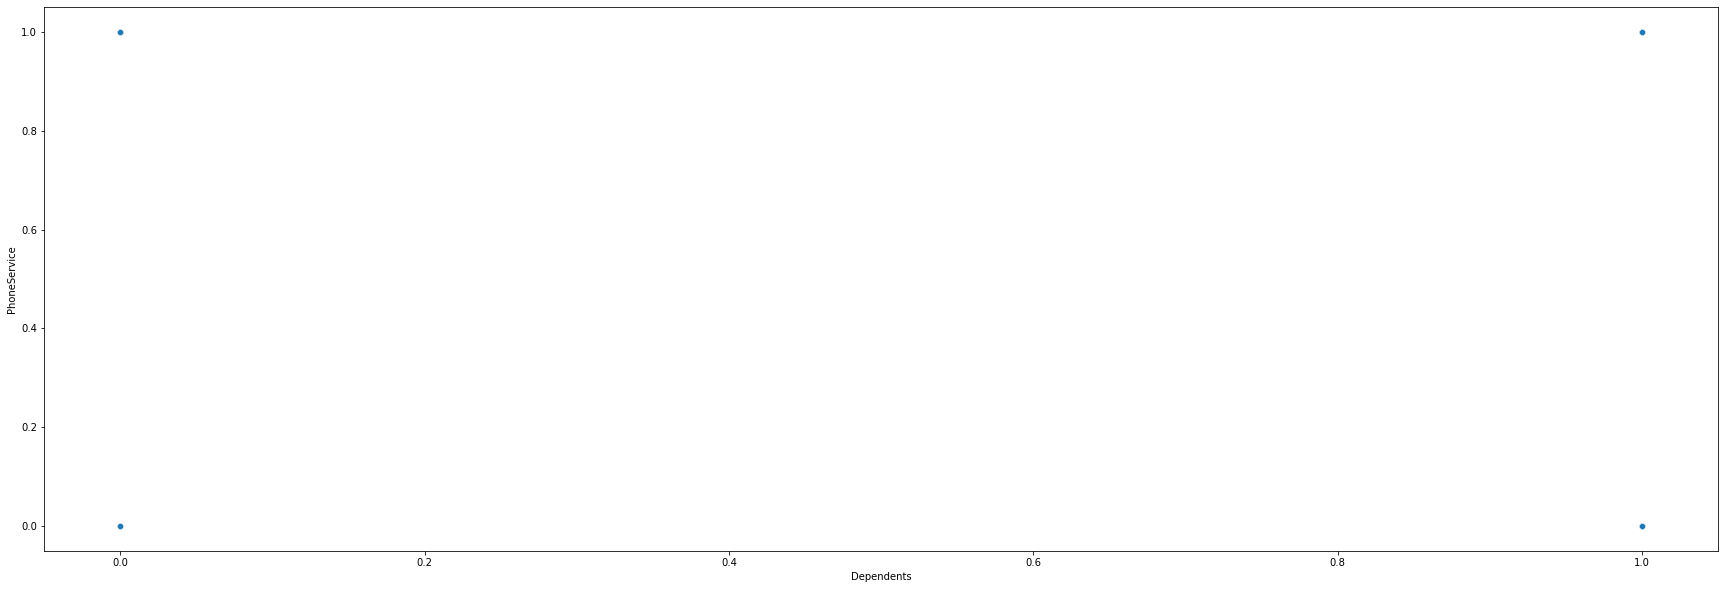

Visualizing Numerical Features with Dependents


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


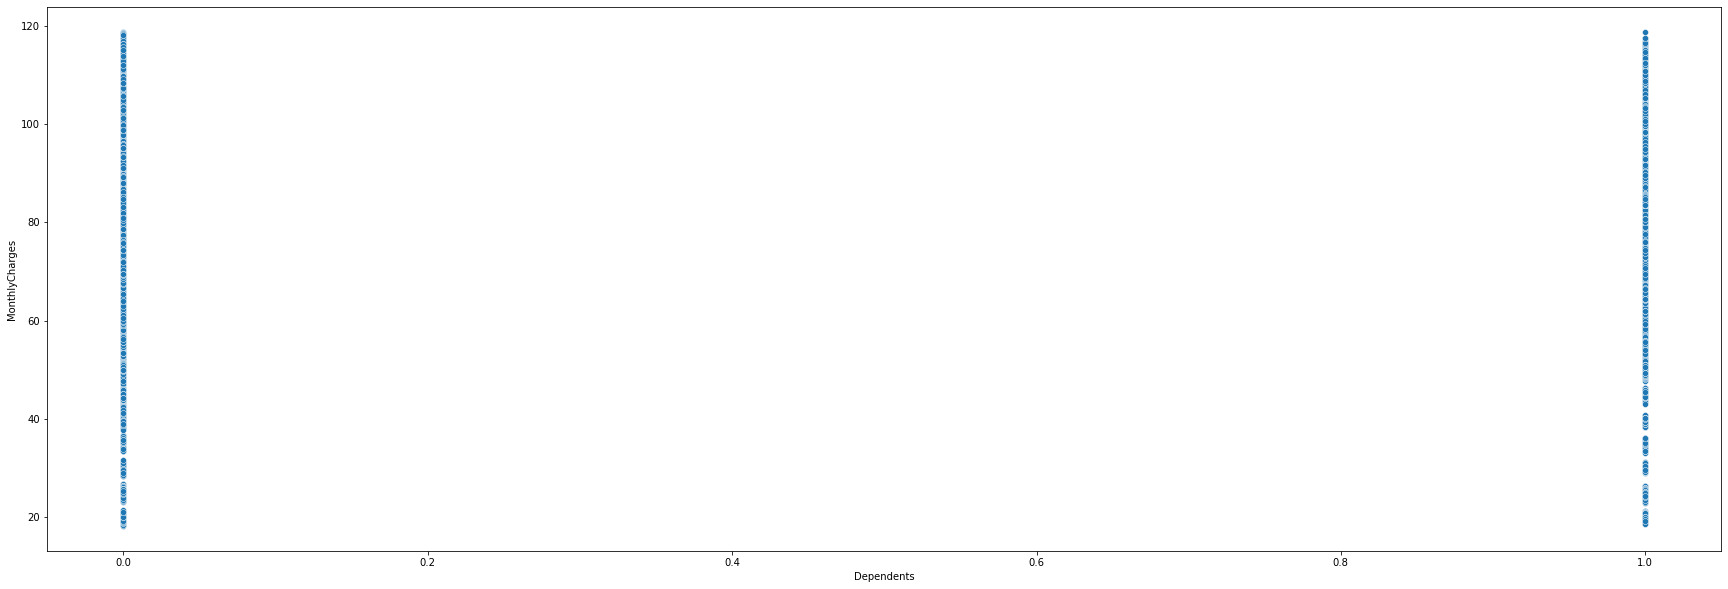

Visualizing Numerical Features with Dependents


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


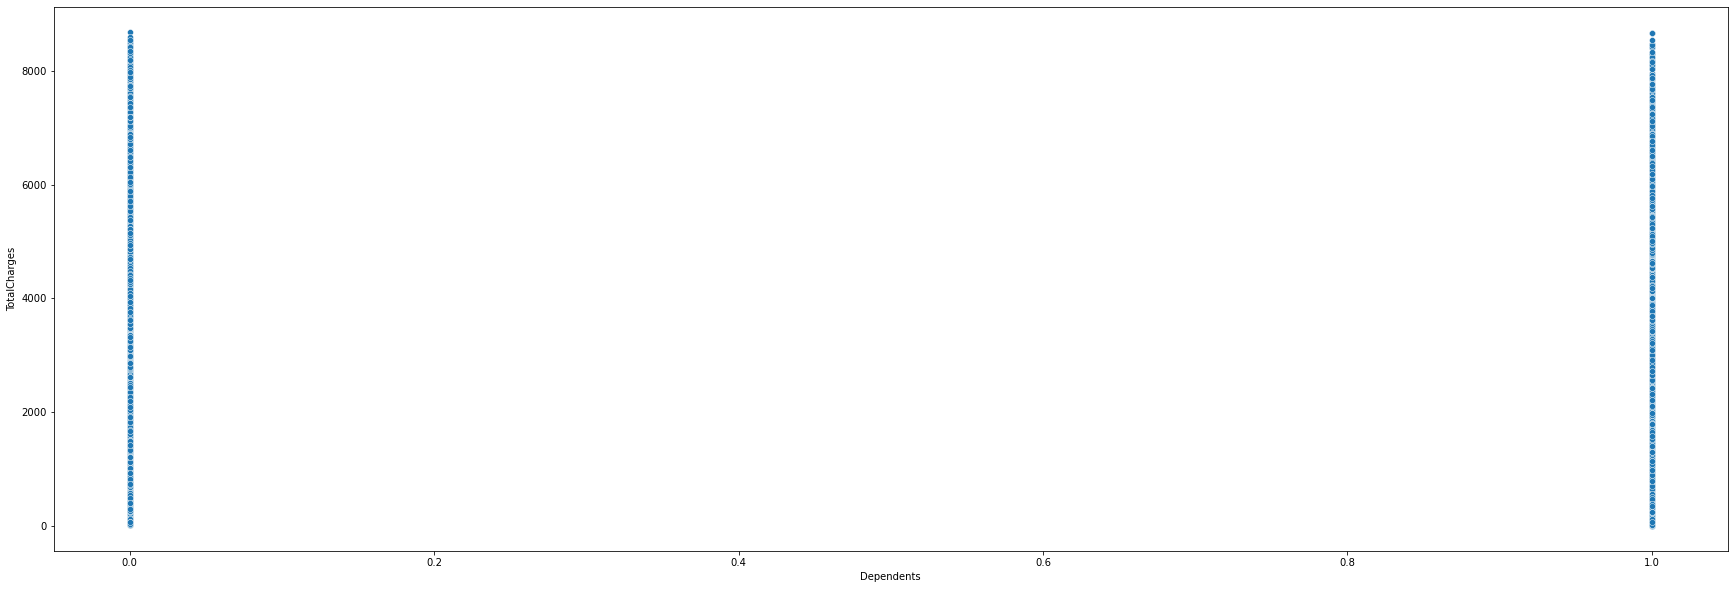

Visualizing Numerical Features with Dependents


In [46]:
for i in df0[num_cols]:
    plt.figure(figsize=(30,10))
    sns.scatterplot(df0['Dependents'],df0[i])
    plt.show()
    print("Visualizing Numerical Features with Dependents")

D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


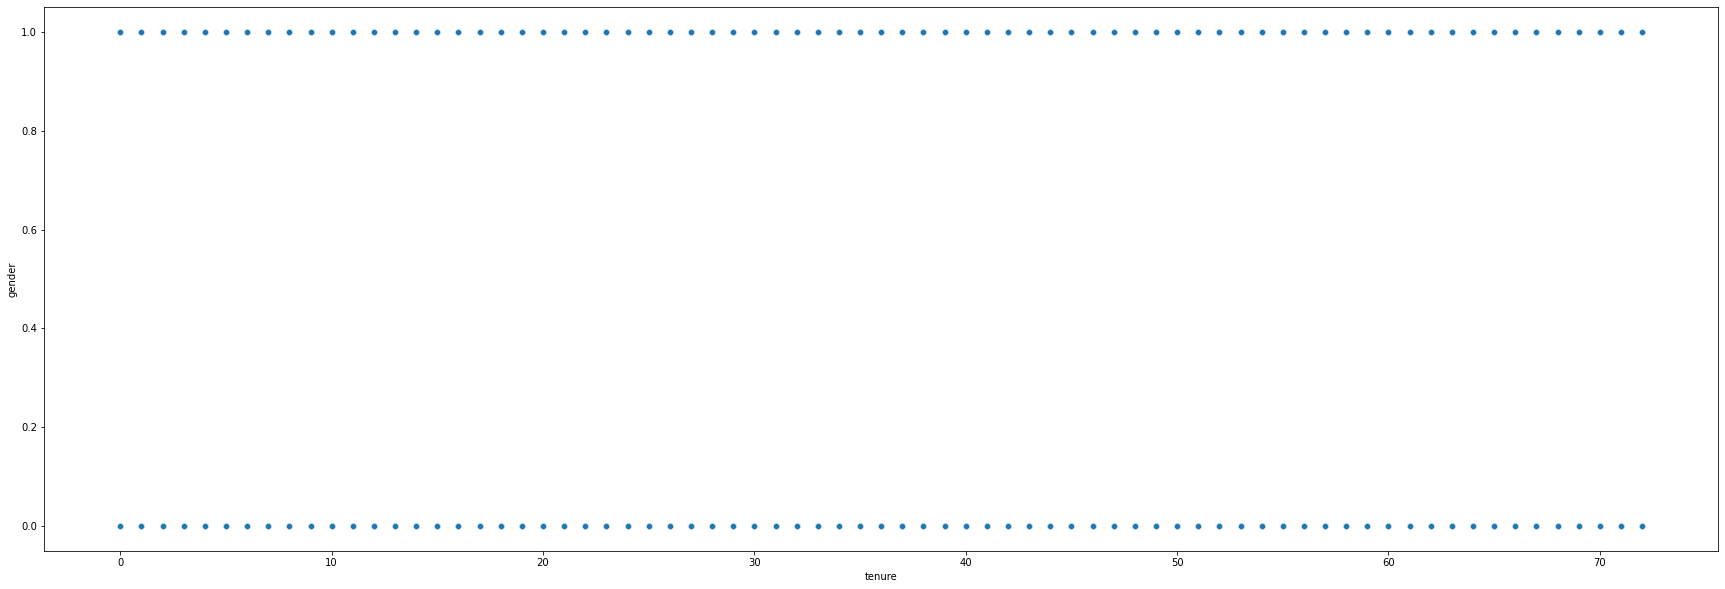

Visualizing Numerical Features with tenure


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


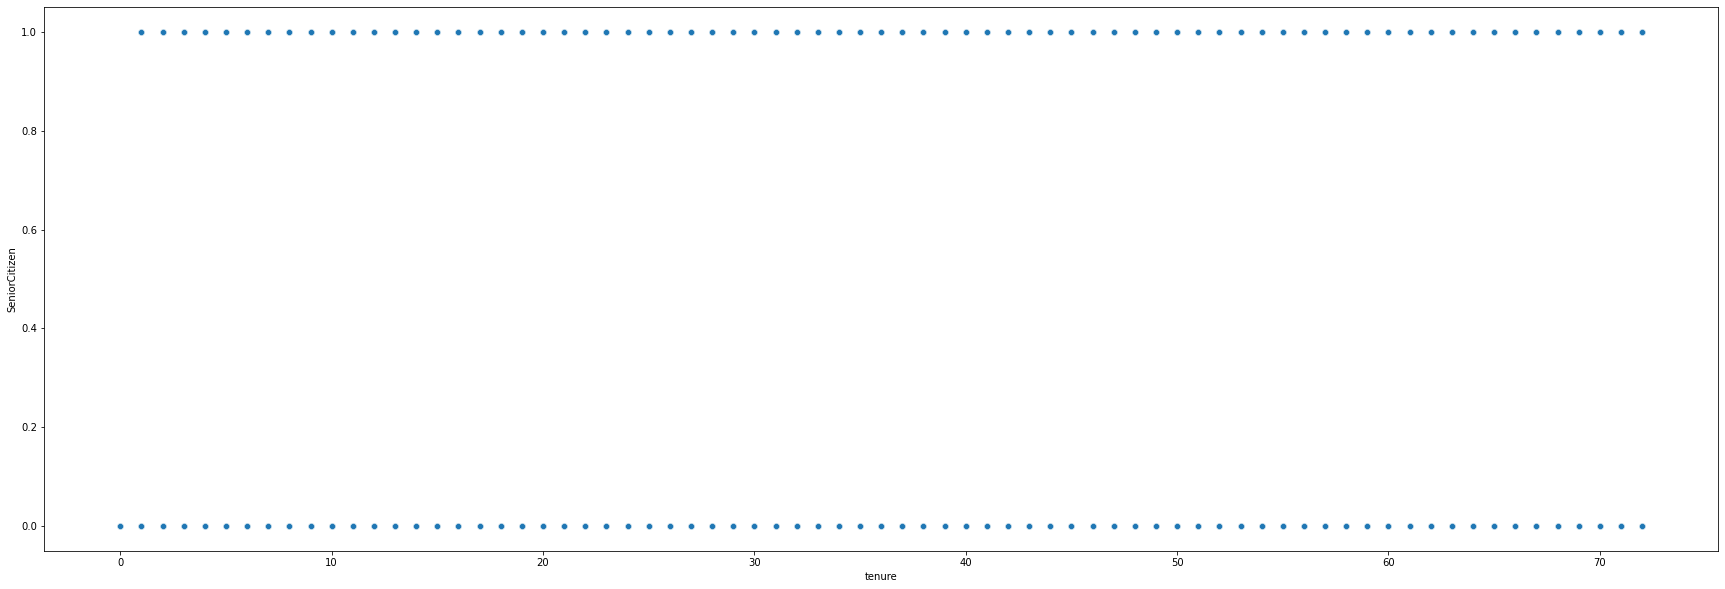

Visualizing Numerical Features with tenure


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


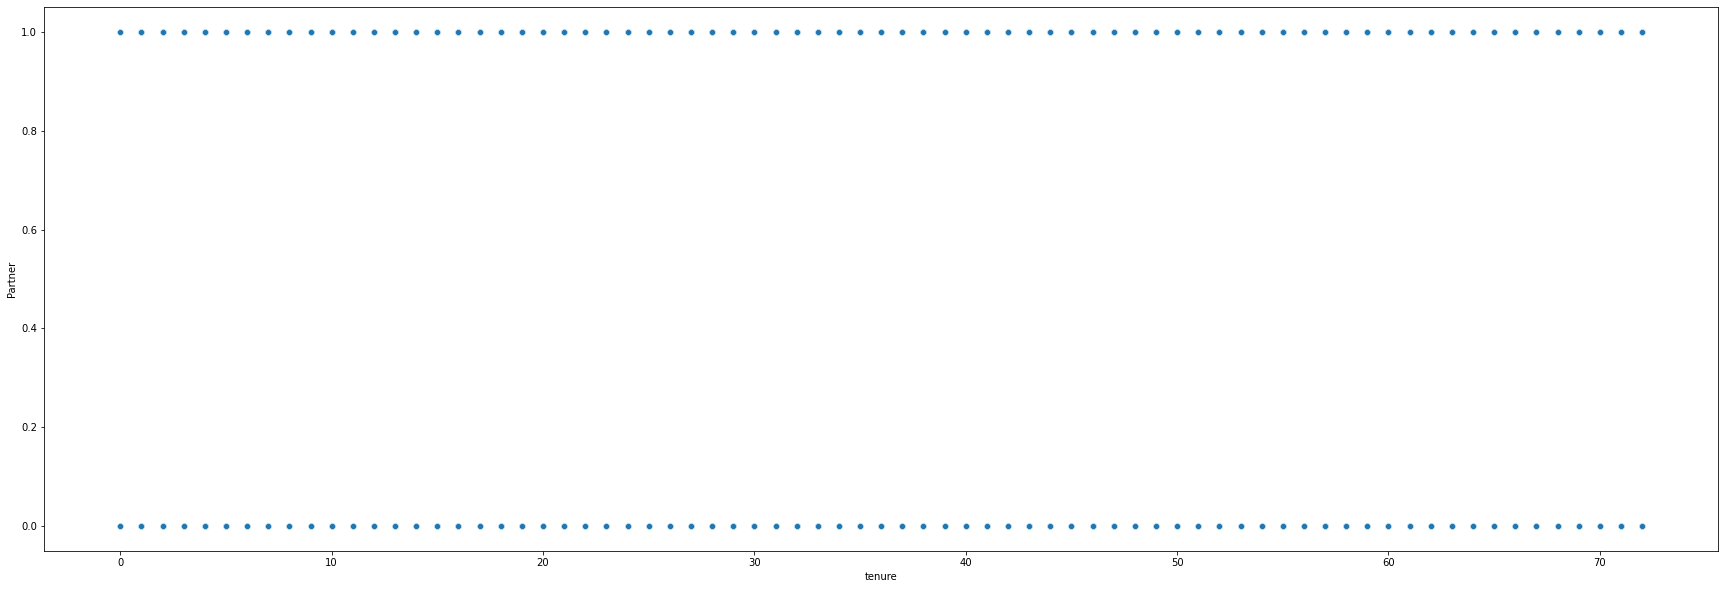

Visualizing Numerical Features with tenure


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


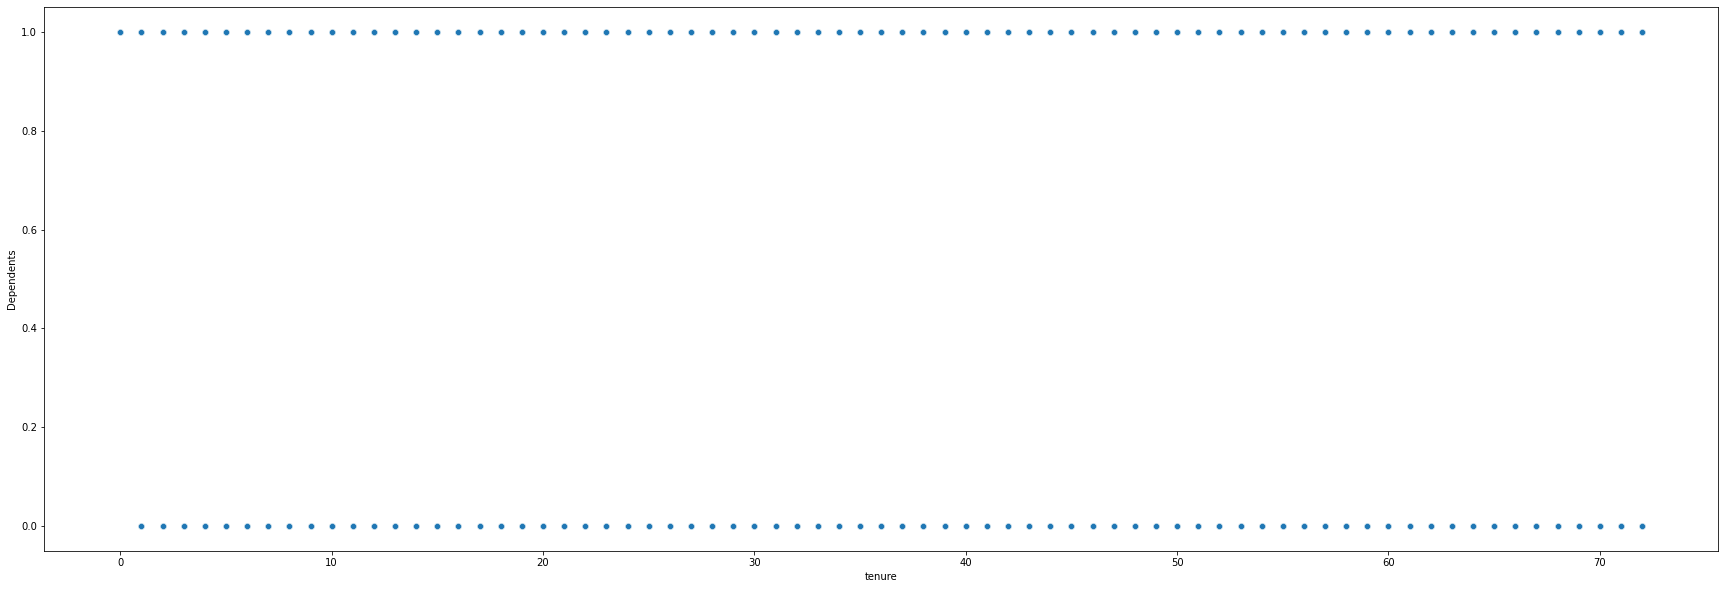

Visualizing Numerical Features with tenure


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


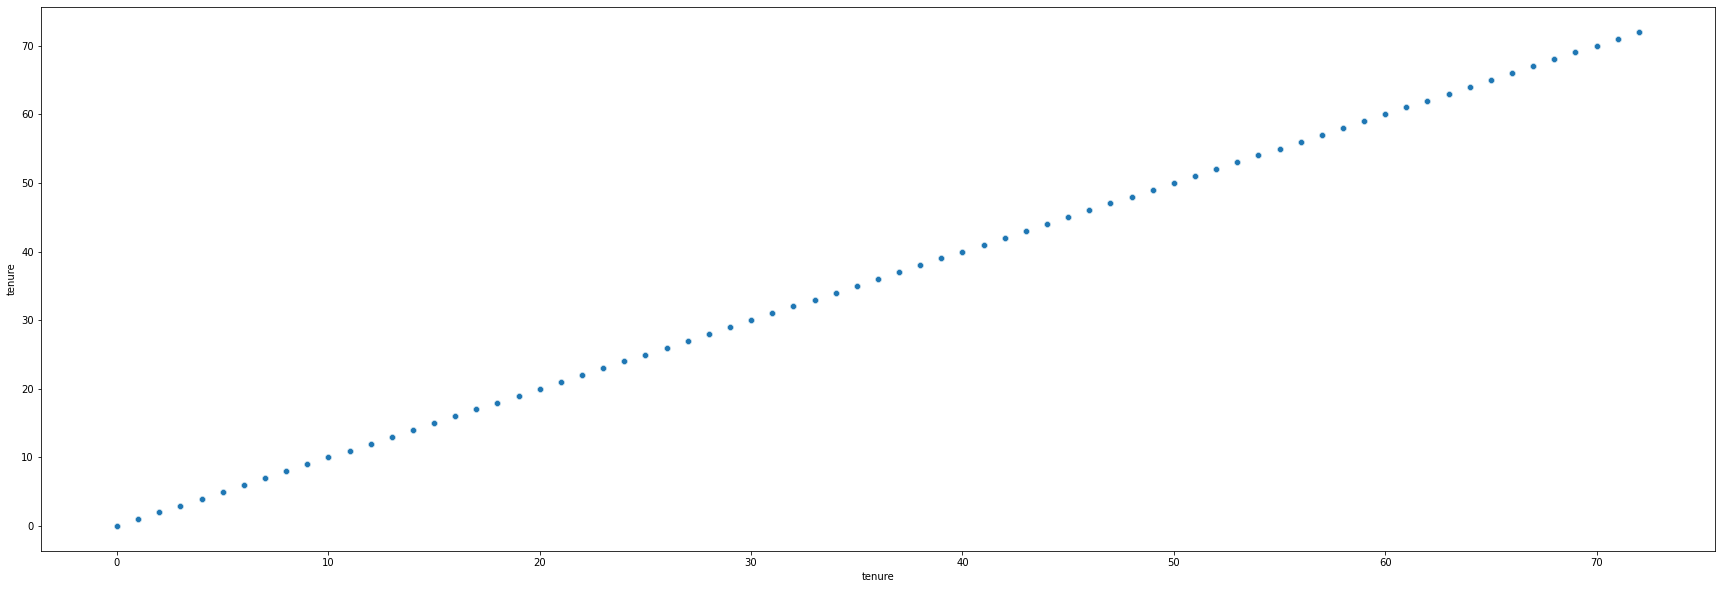

Visualizing Numerical Features with tenure


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


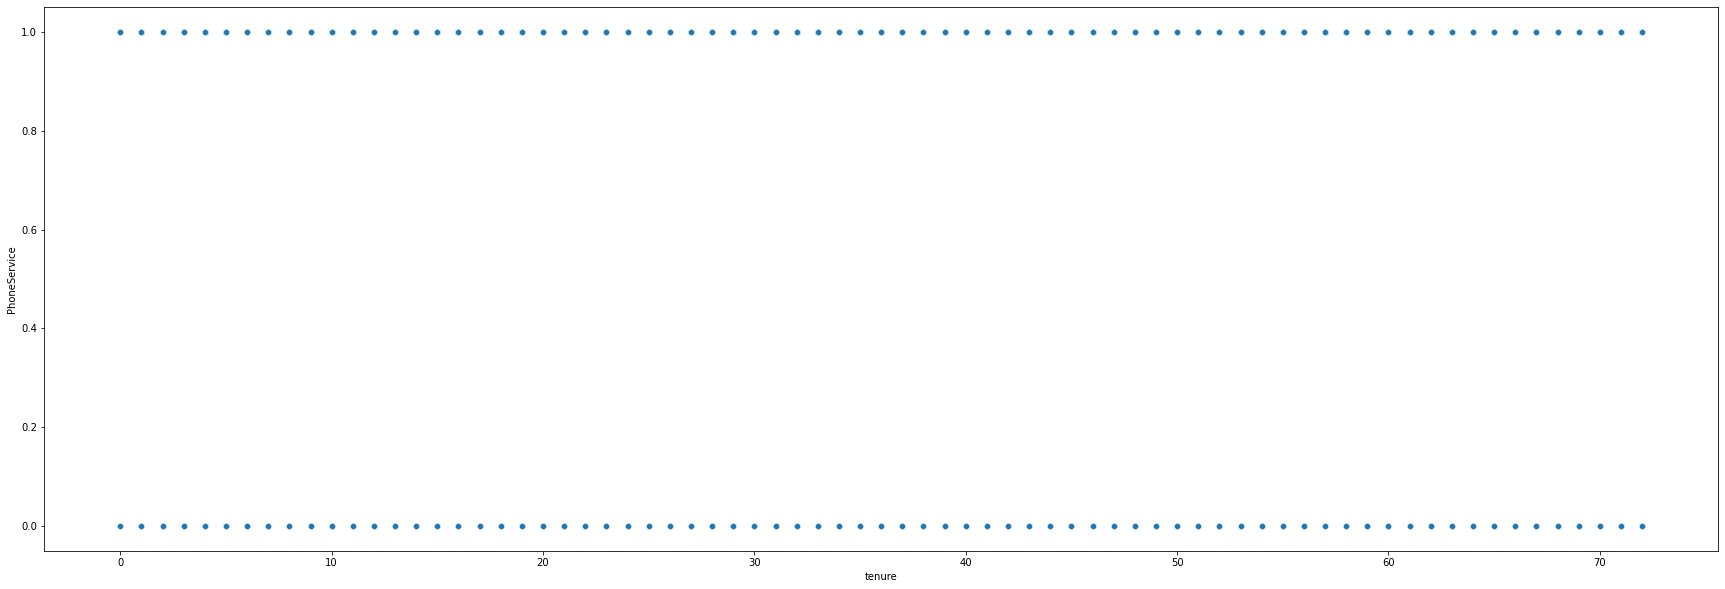

Visualizing Numerical Features with tenure


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


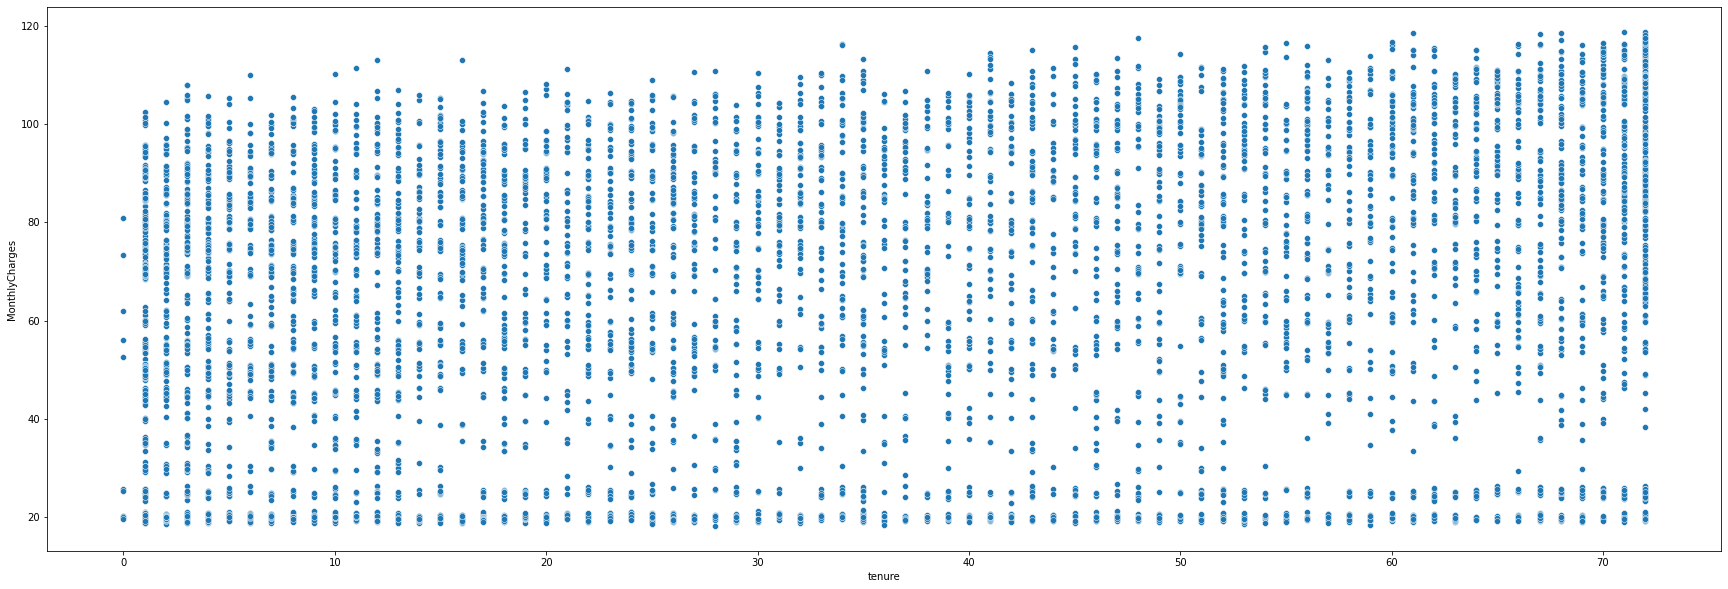

Visualizing Numerical Features with tenure


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


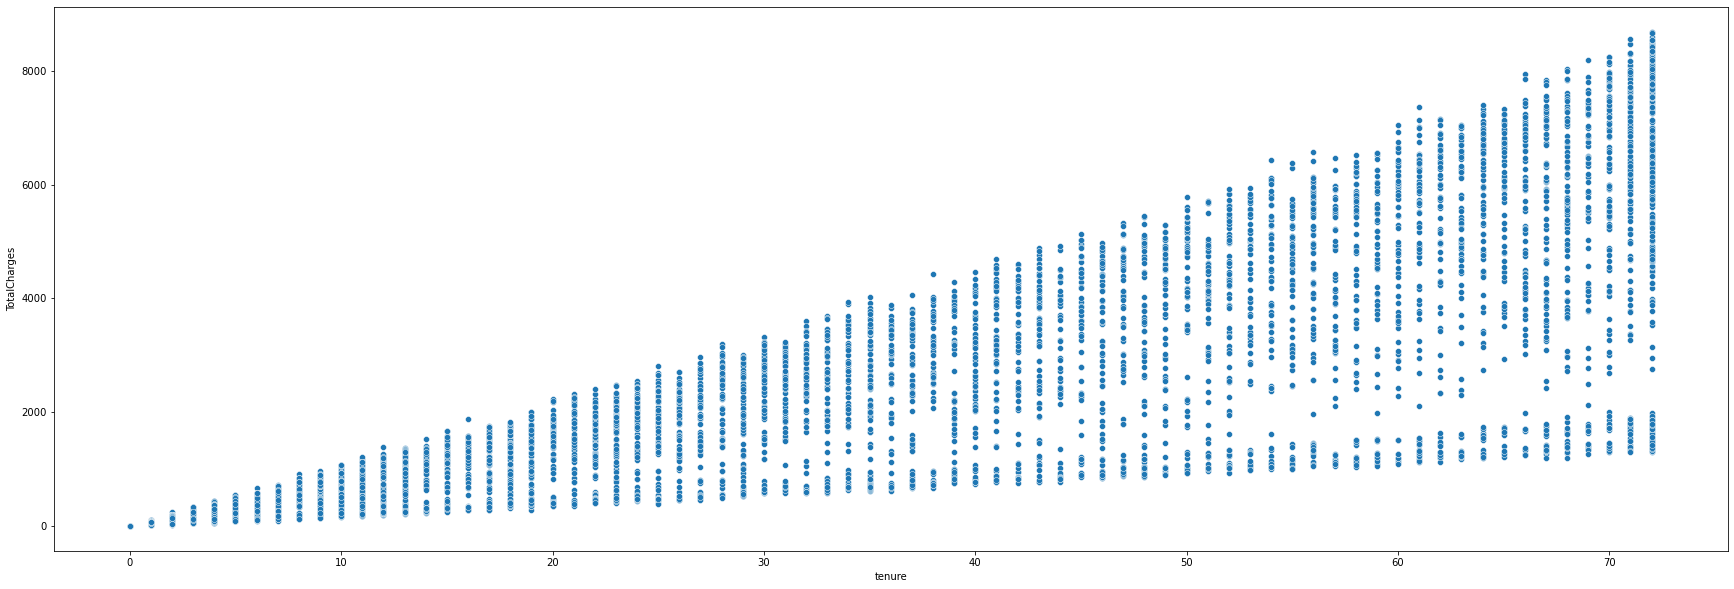

Visualizing Numerical Features with tenure


In [47]:
for i in df0[num_cols]:
    plt.figure(figsize=(30,10))
    sns.scatterplot(df0['tenure'],df0[i])
    plt.show()
    print("Visualizing Numerical Features with tenure")

D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


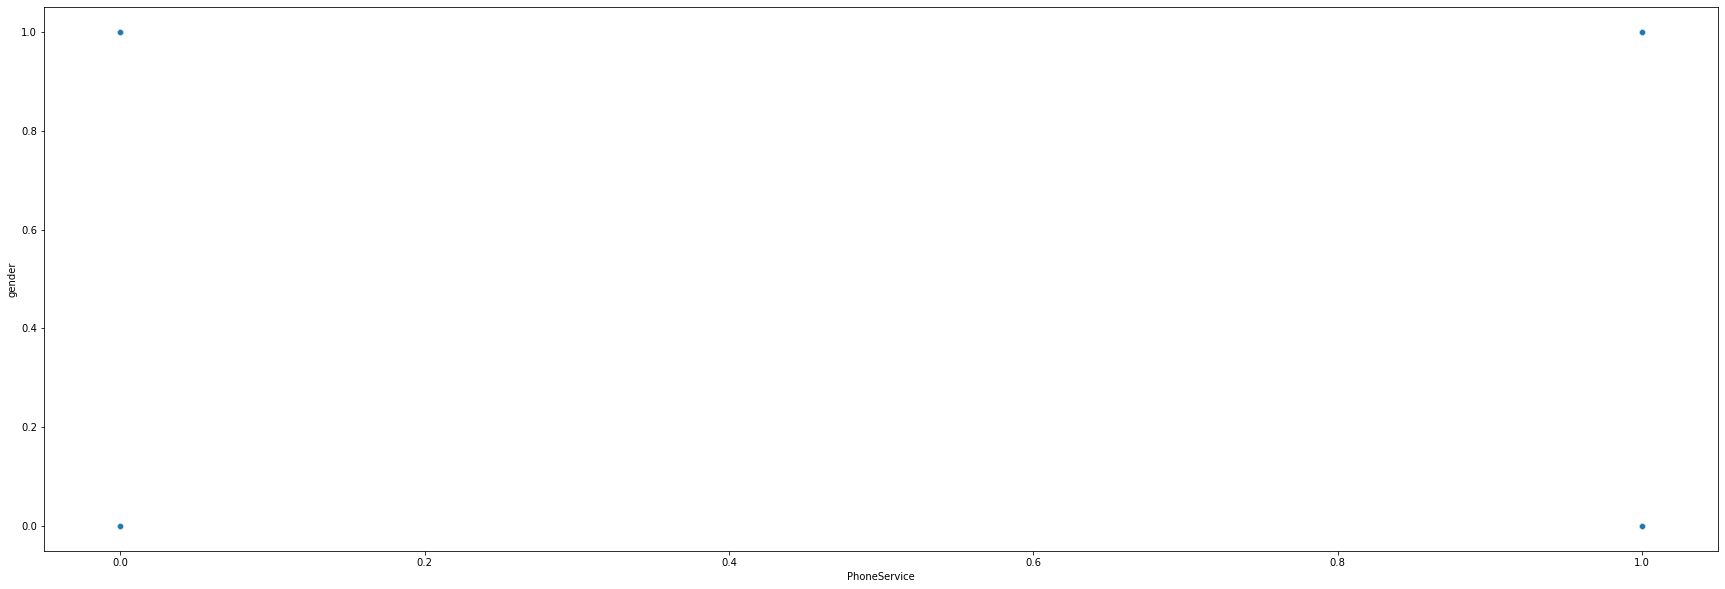

Visualizing Numerical Features with PhoneService


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


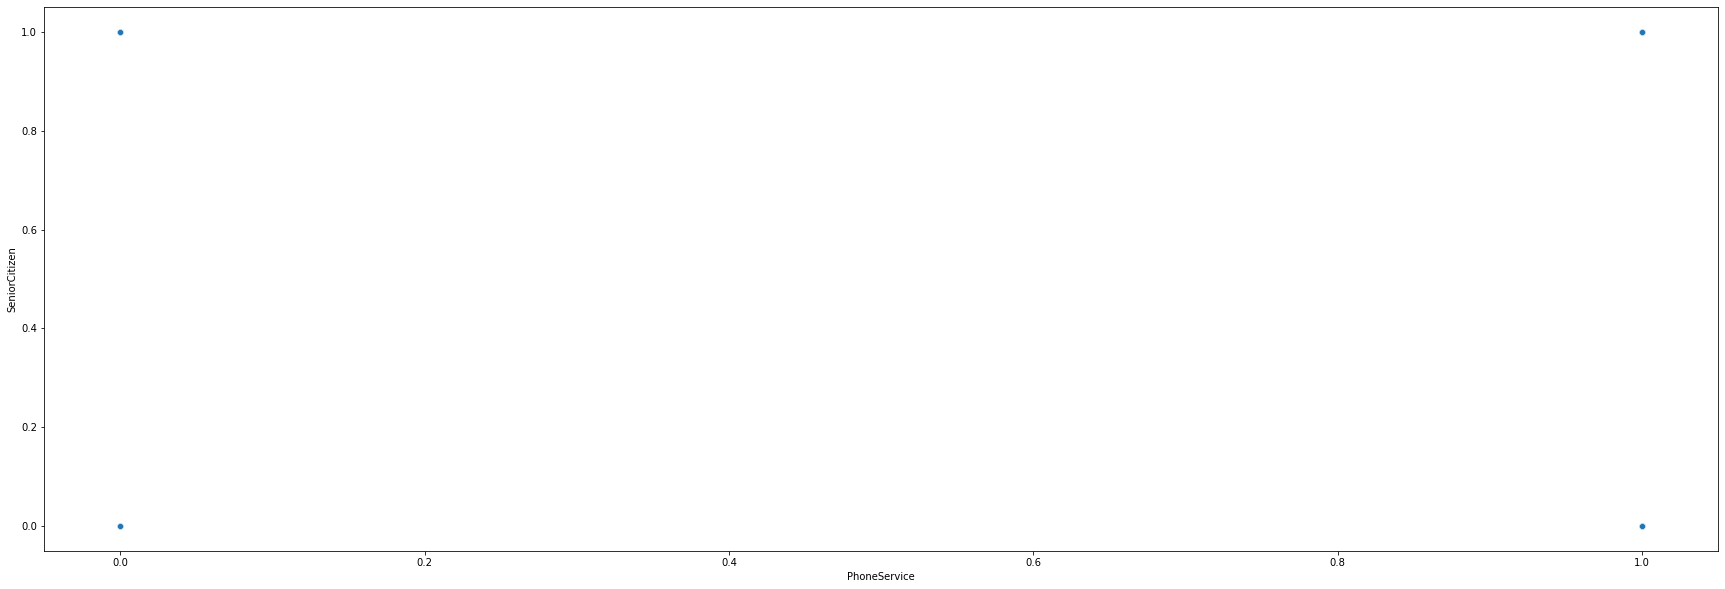

Visualizing Numerical Features with PhoneService


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


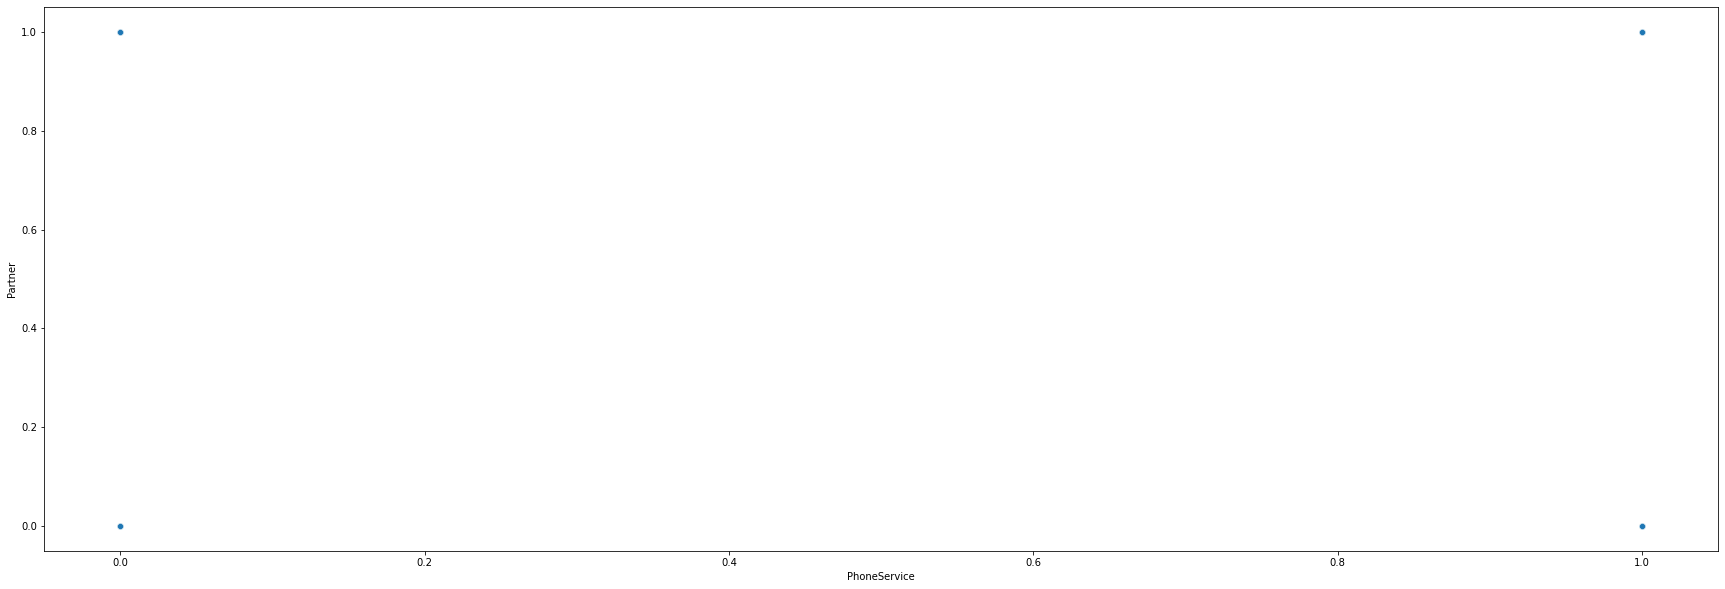

Visualizing Numerical Features with PhoneService


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


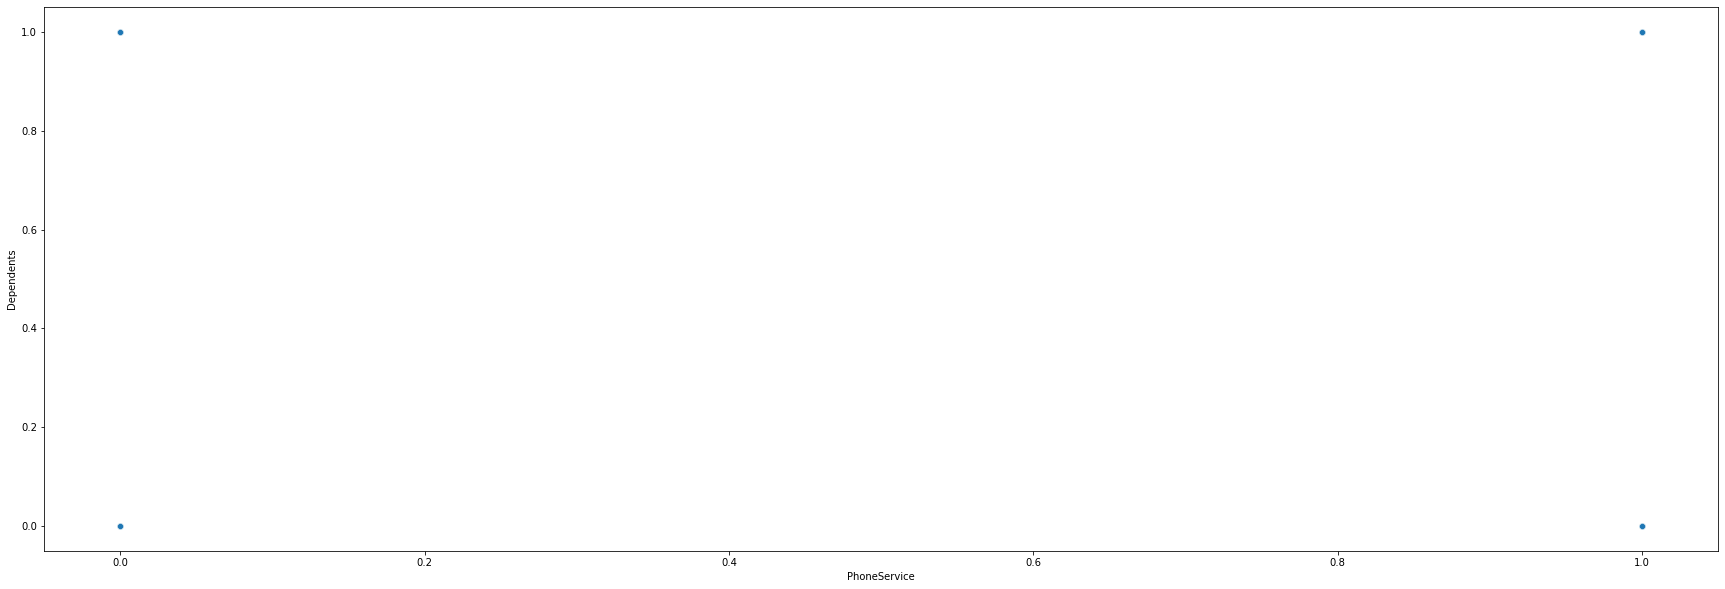

Visualizing Numerical Features with PhoneService


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


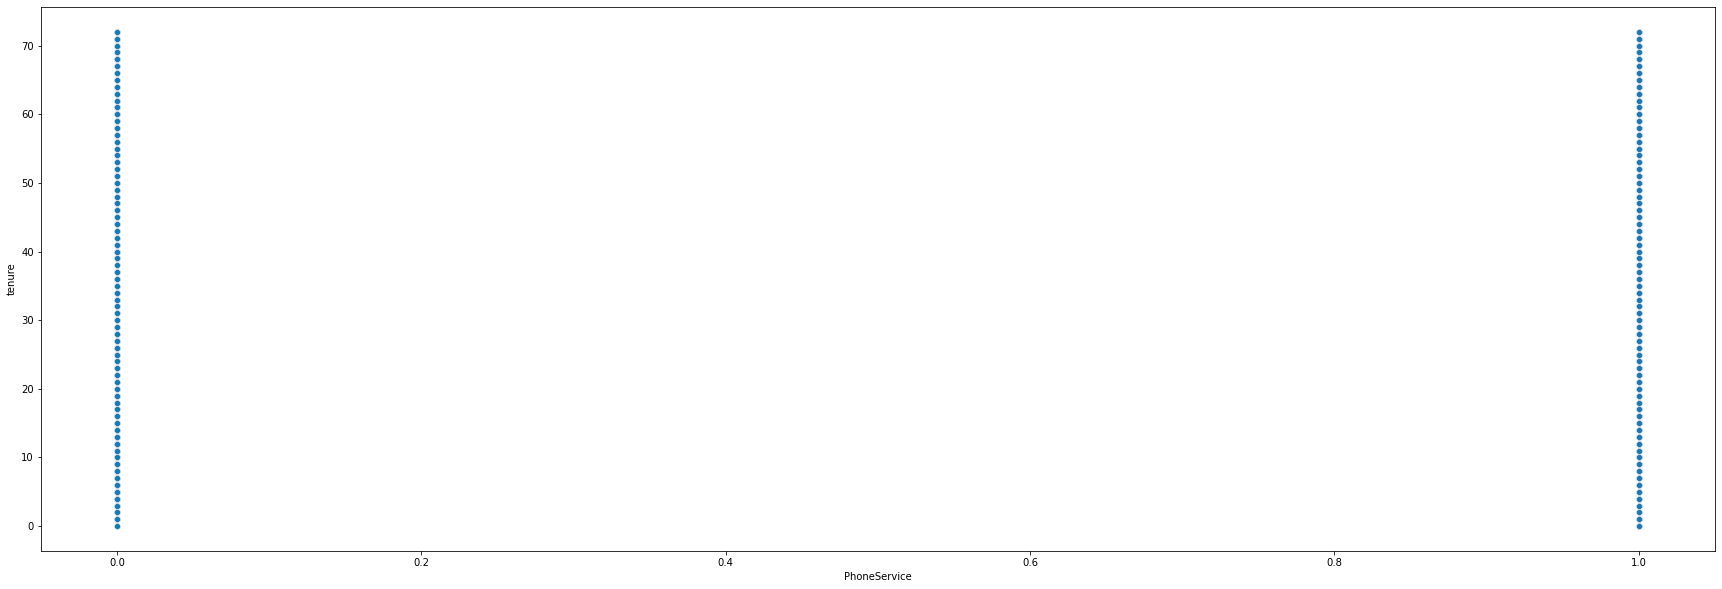

Visualizing Numerical Features with PhoneService


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


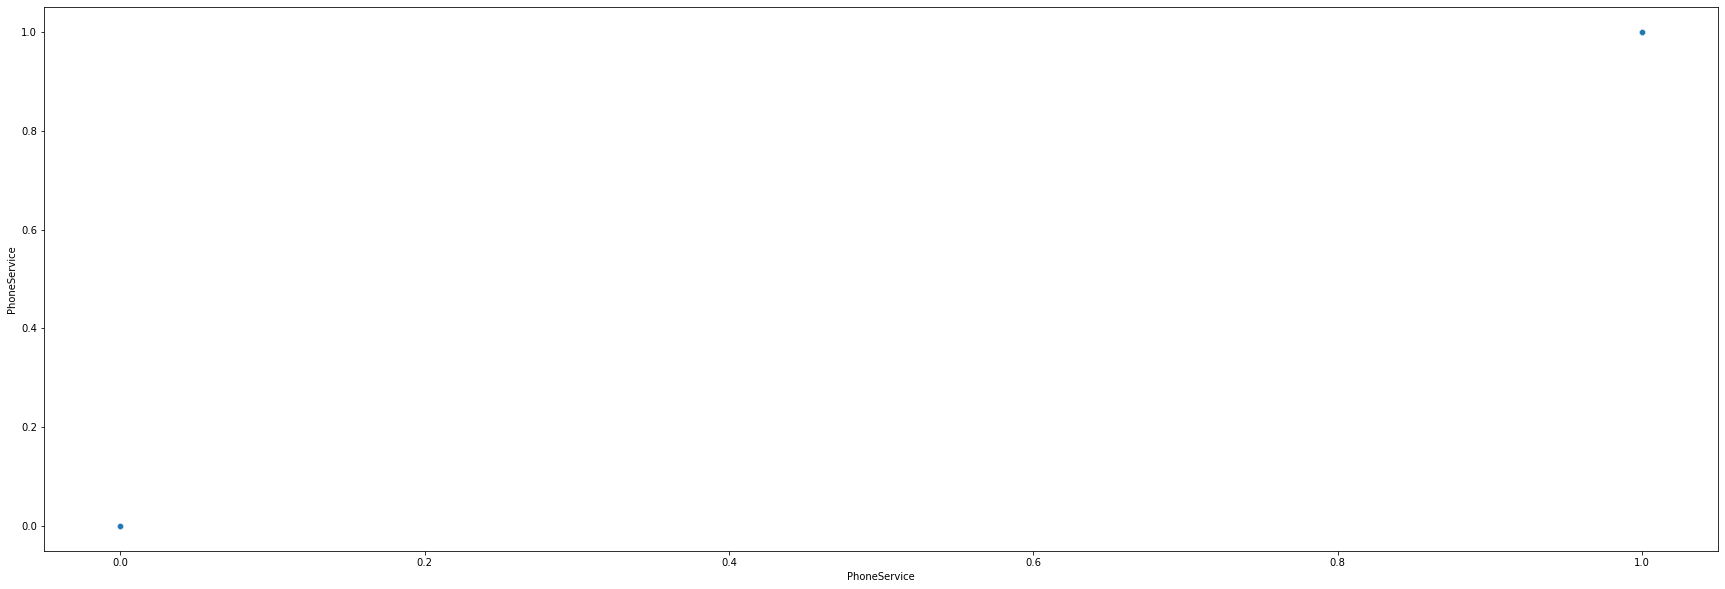

Visualizing Numerical Features with PhoneService


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


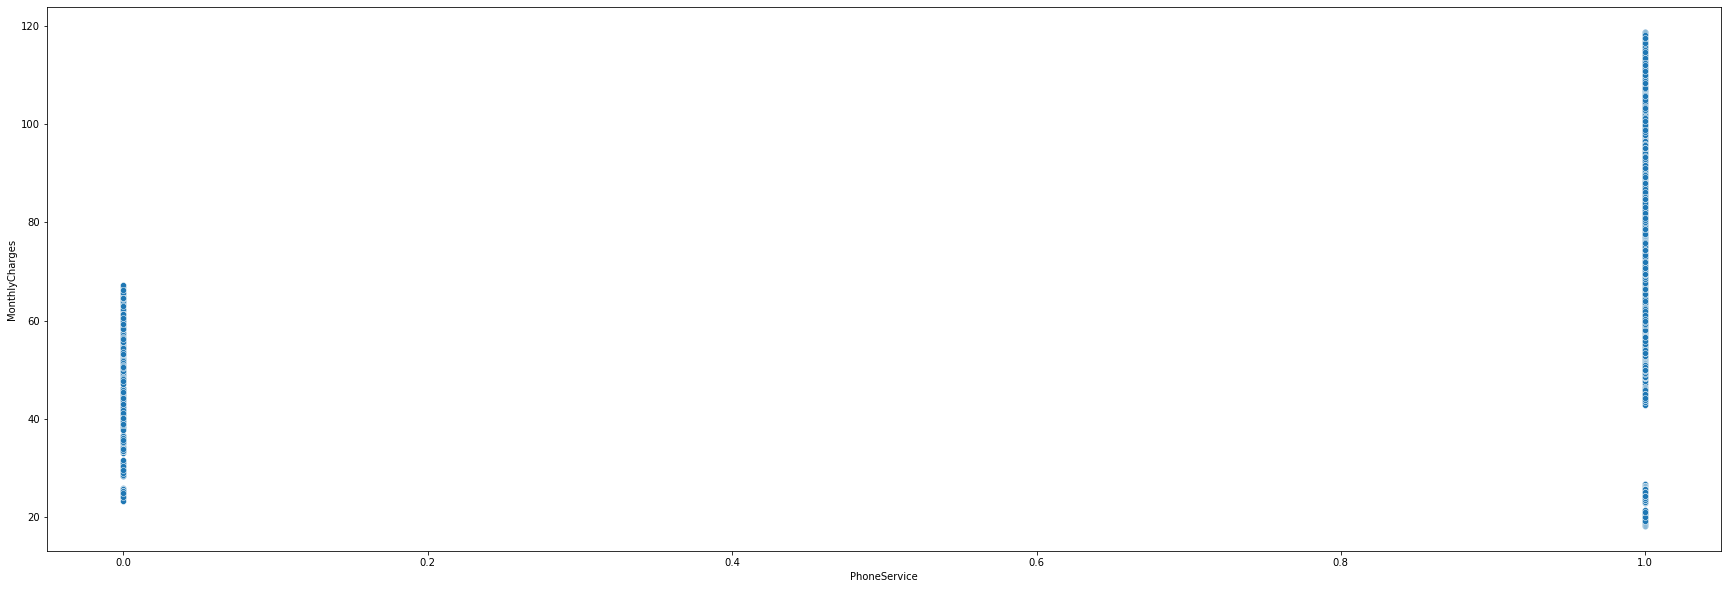

Visualizing Numerical Features with PhoneService


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


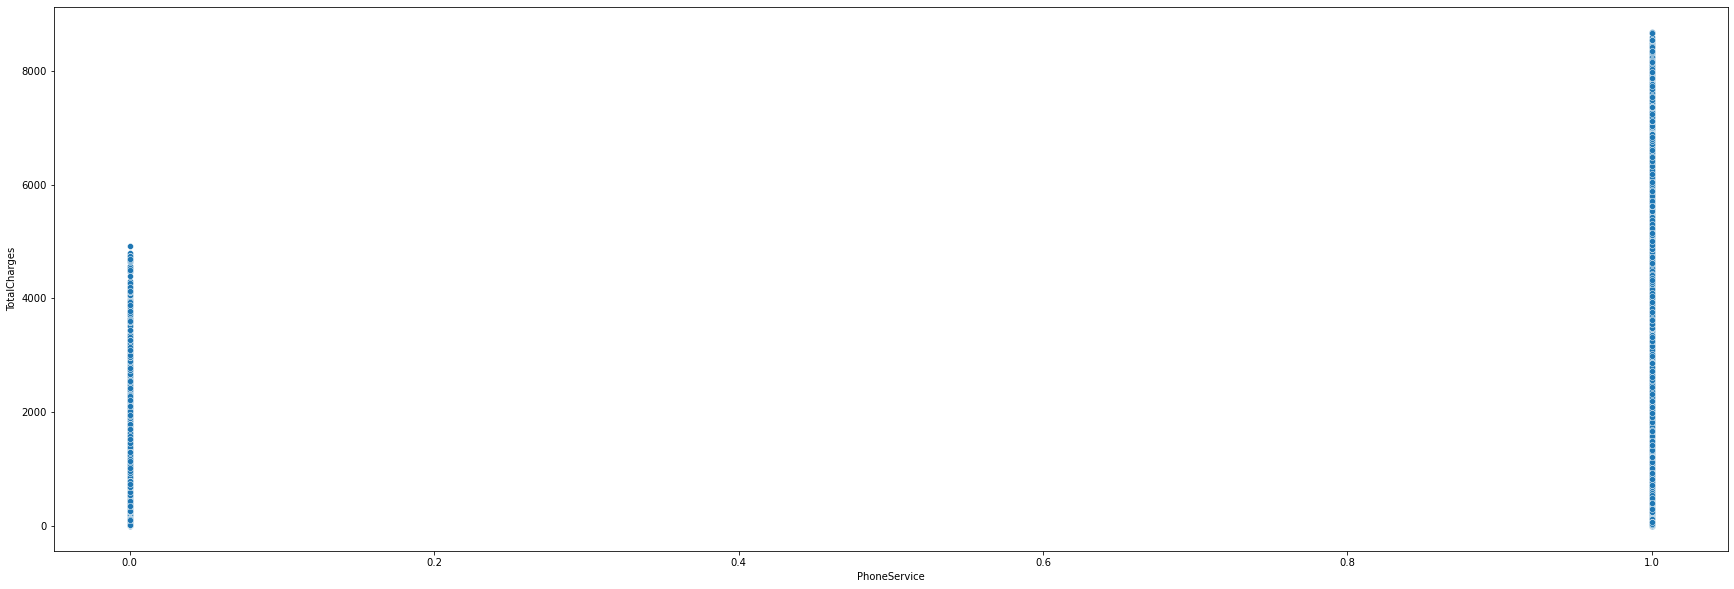

Visualizing Numerical Features with PhoneService


In [48]:
for i in df0[num_cols]:
    plt.figure(figsize=(30,10))
    sns.scatterplot(df0['PhoneService'],df0[i])
    plt.show()
    print("Visualizing Numerical Features with PhoneService")

D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


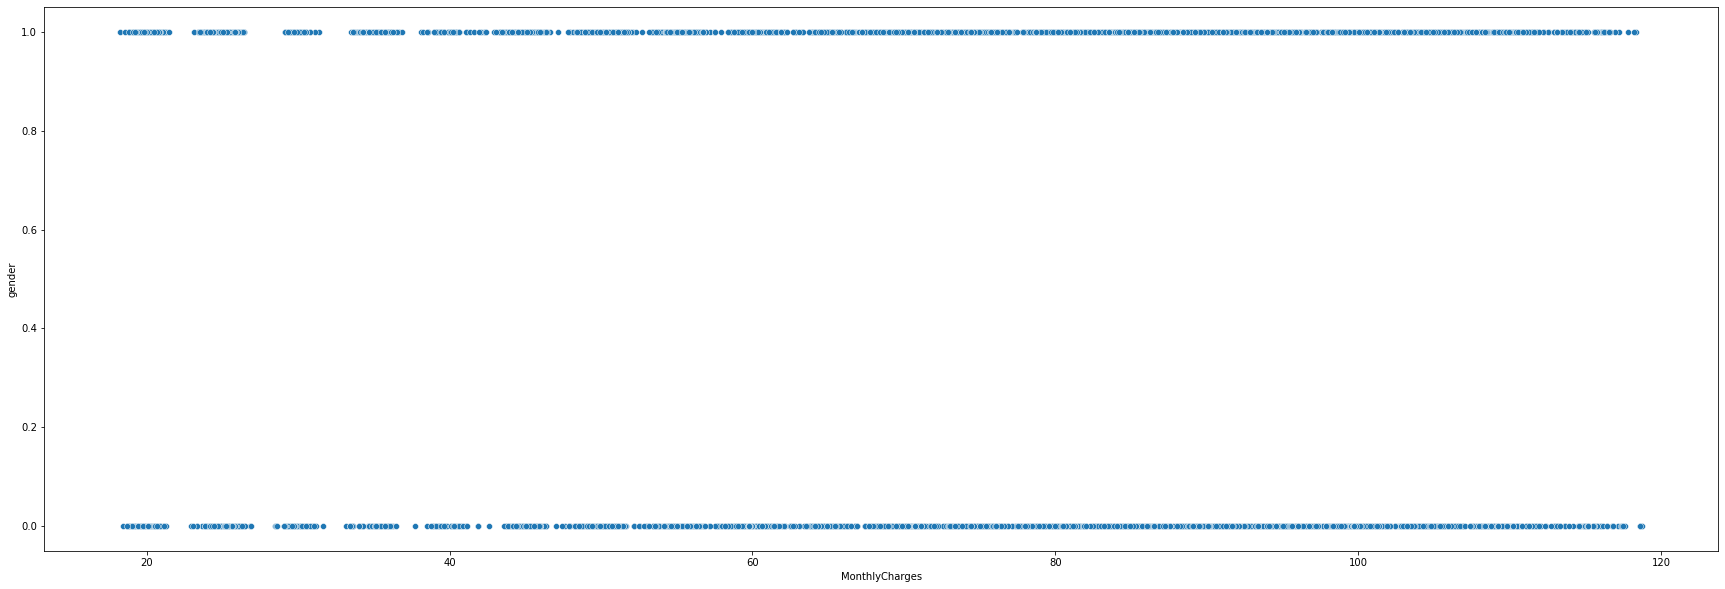

Visualizing Numerical Features with MonthlyCharges


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


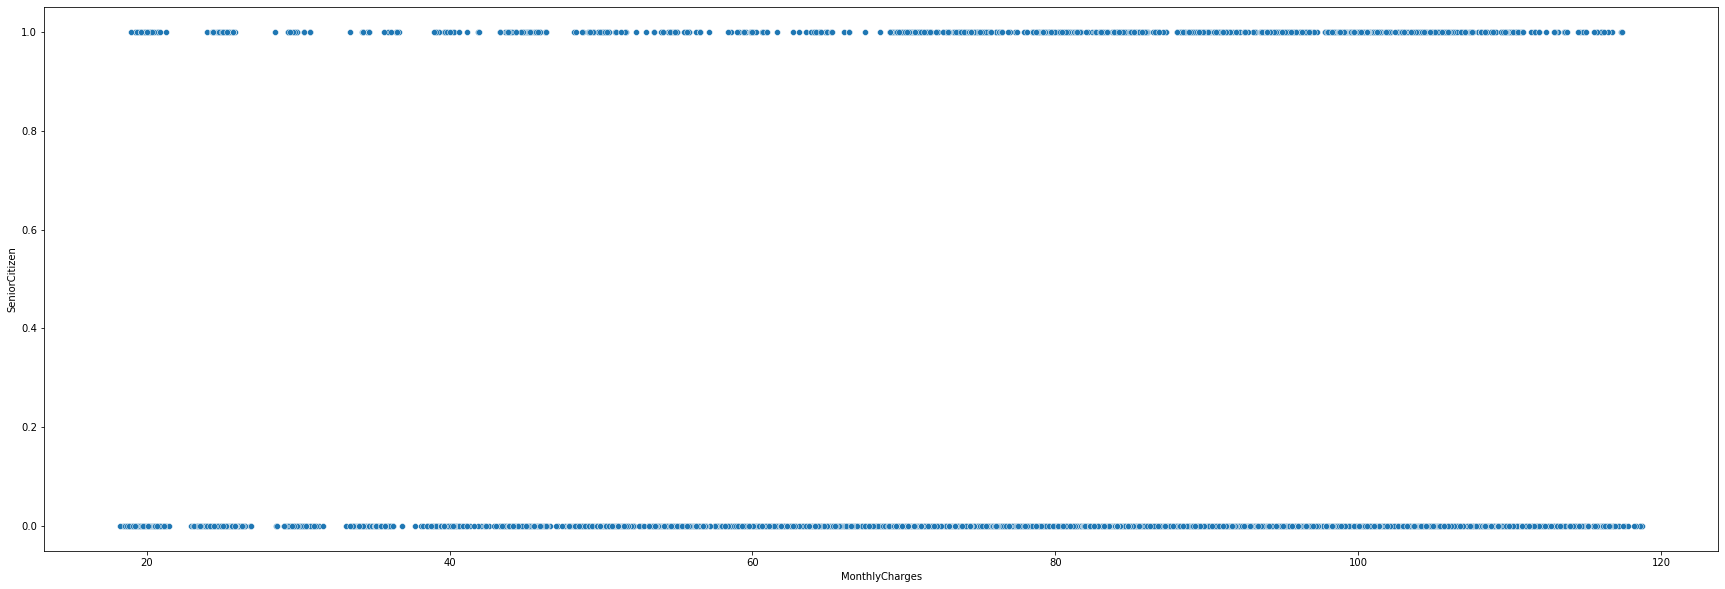

Visualizing Numerical Features with MonthlyCharges


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


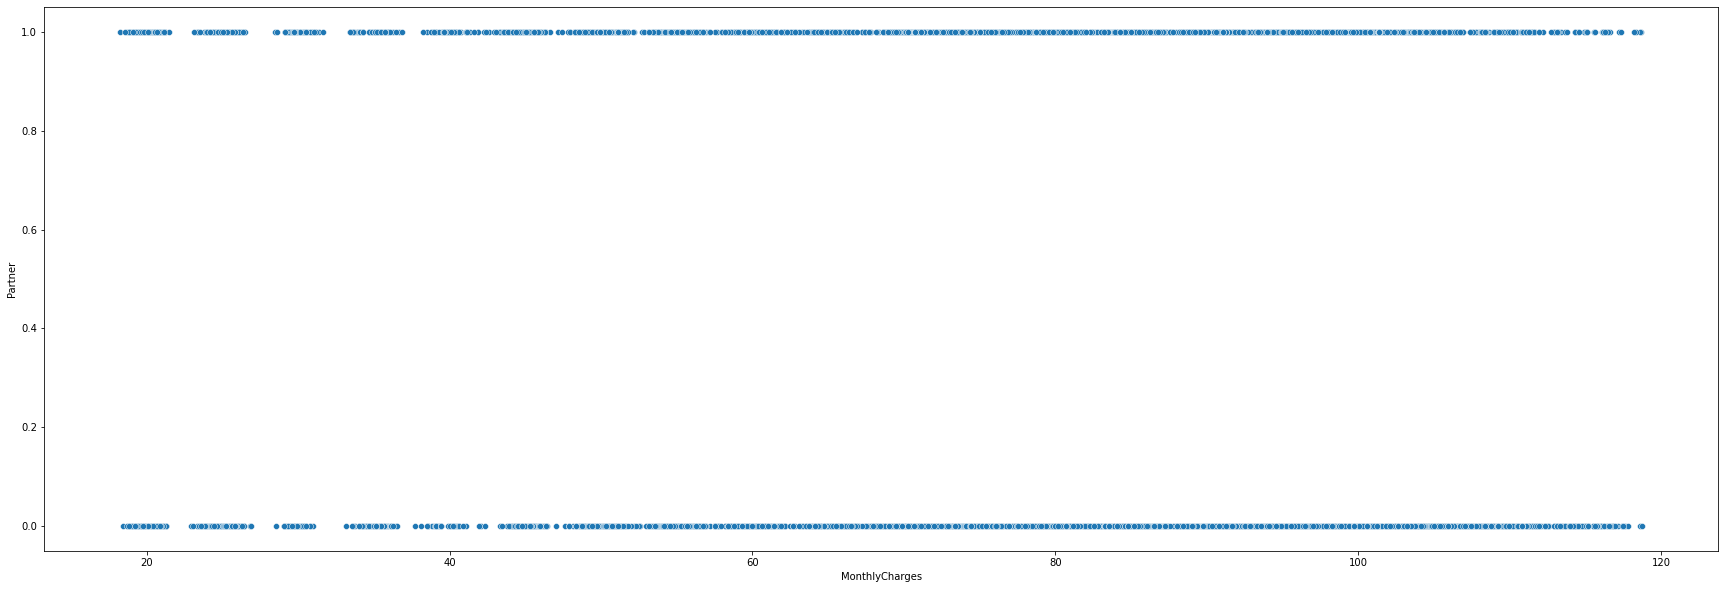

Visualizing Numerical Features with MonthlyCharges


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


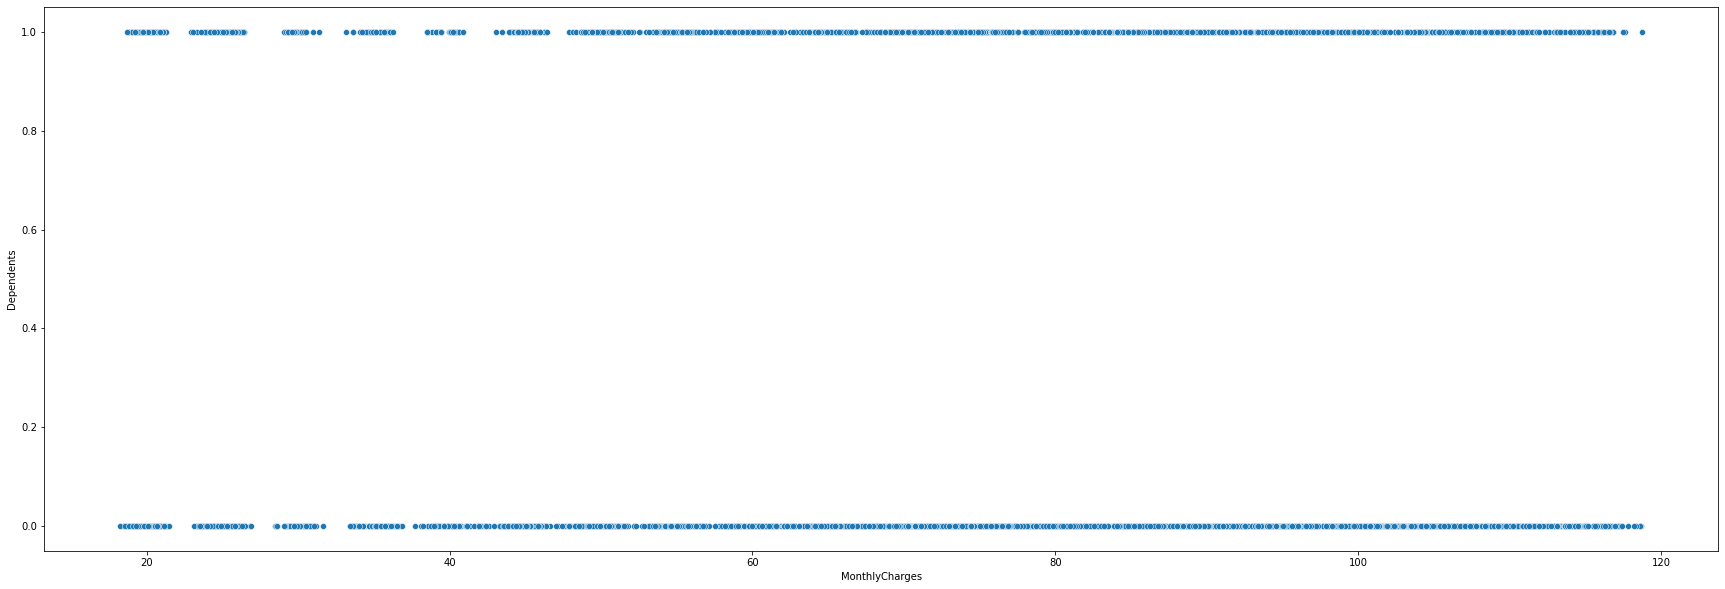

Visualizing Numerical Features with MonthlyCharges


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


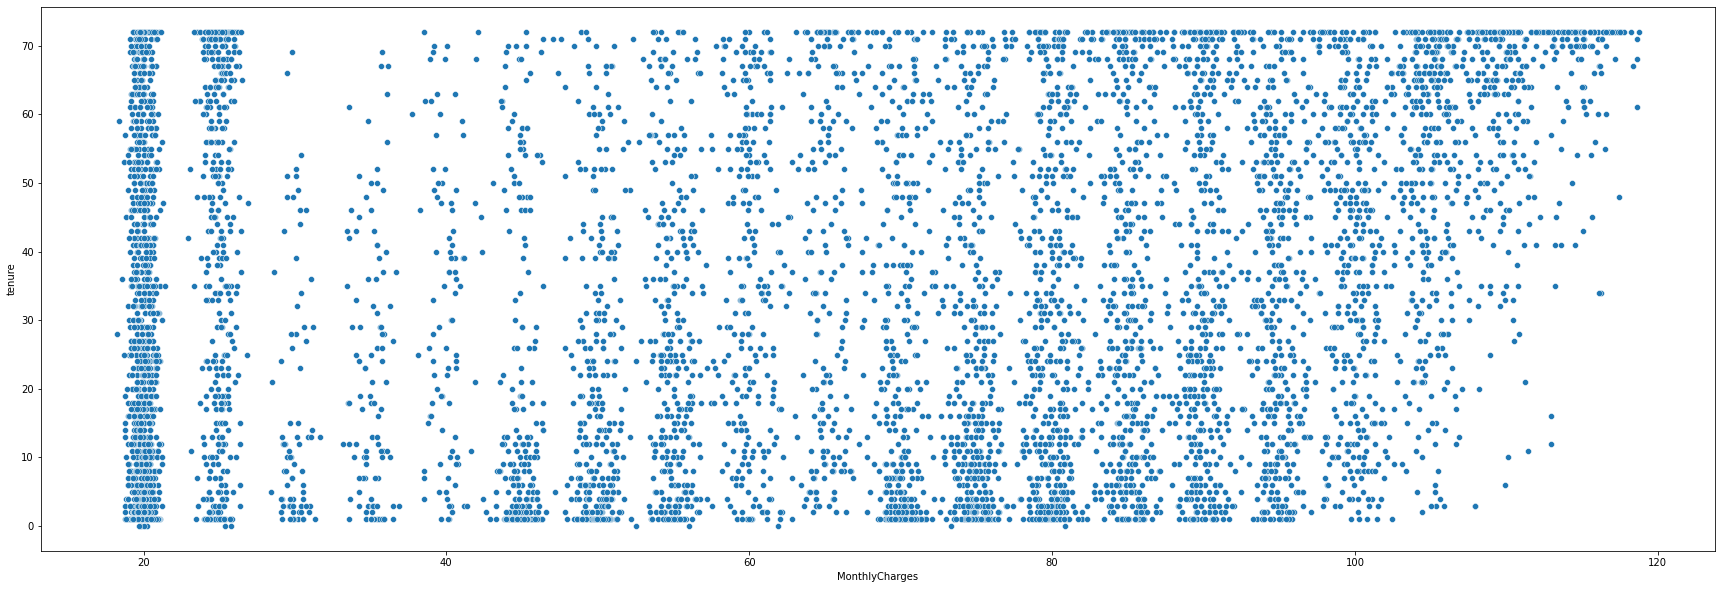

Visualizing Numerical Features with MonthlyCharges


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


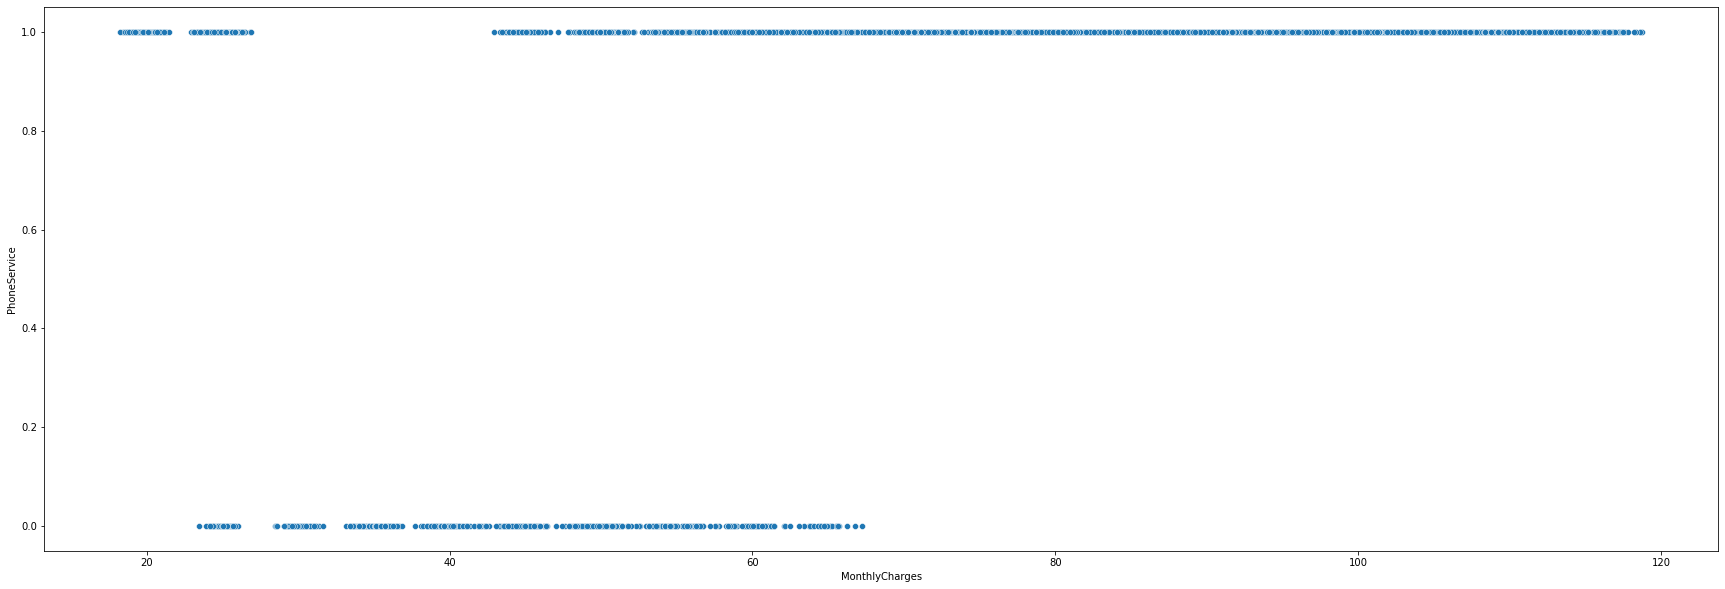

Visualizing Numerical Features with MonthlyCharges


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


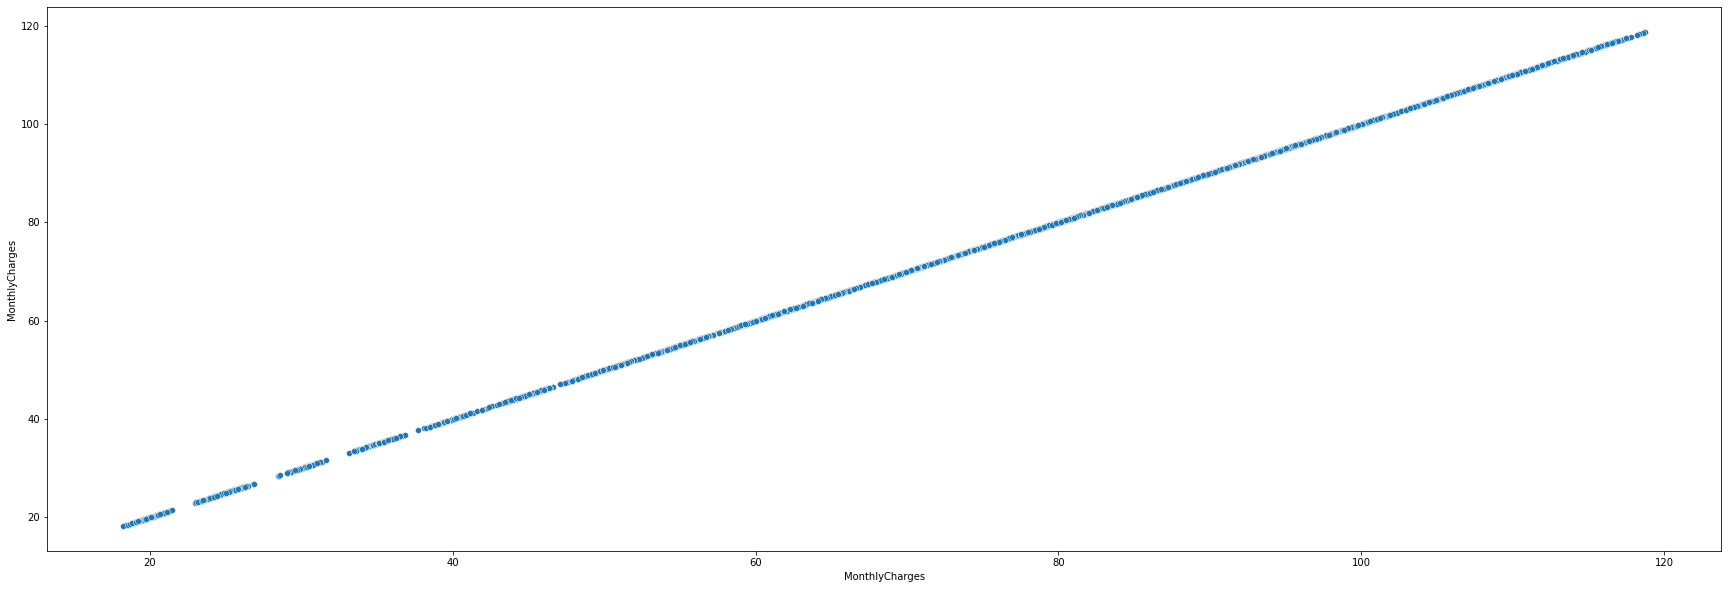

Visualizing Numerical Features with MonthlyCharges


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


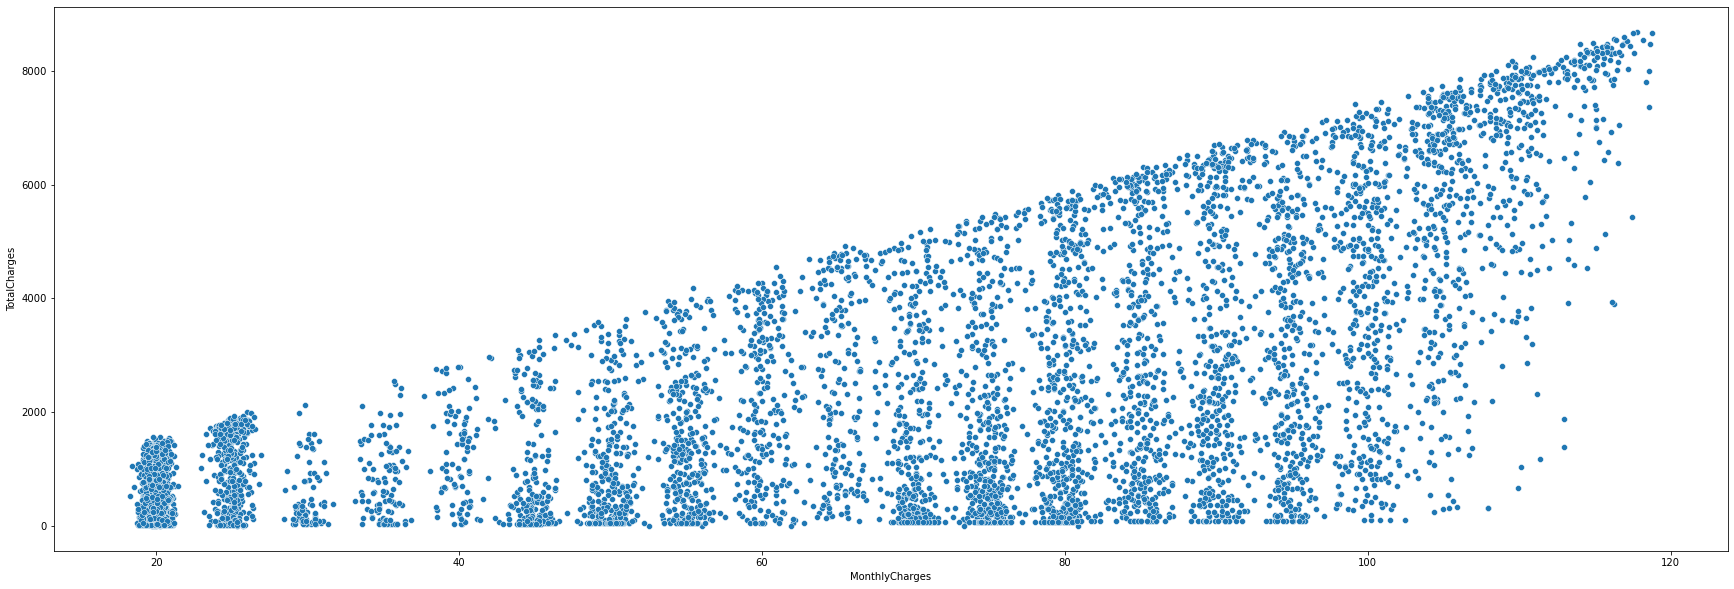

Visualizing Numerical Features with MonthlyCharges


In [49]:
for i in df0[num_cols]:
    plt.figure(figsize=(30,10))
    sns.scatterplot(df0['MonthlyCharges'],df0[i])
    plt.show()
    print("Visualizing Numerical Features with MonthlyCharges")

D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


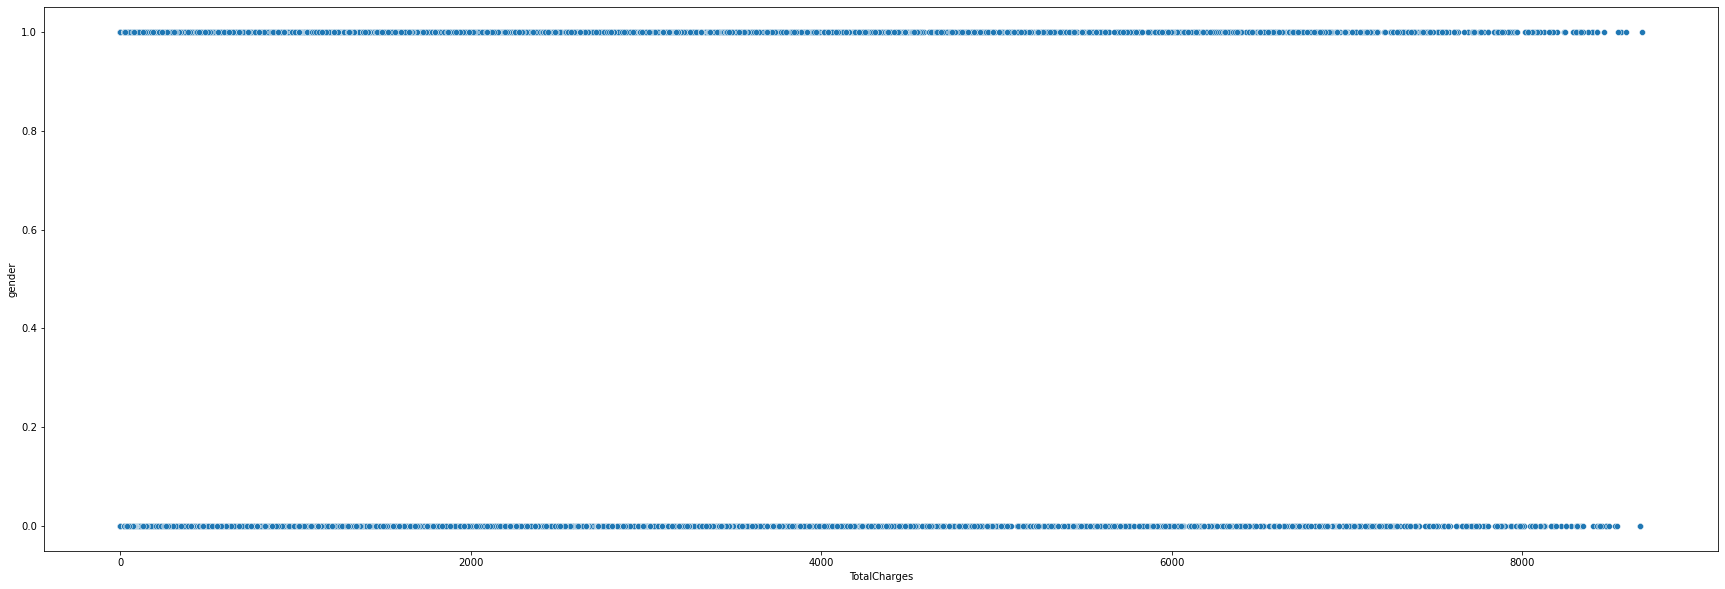

Visualizing Numerical Features with TotalCharges


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


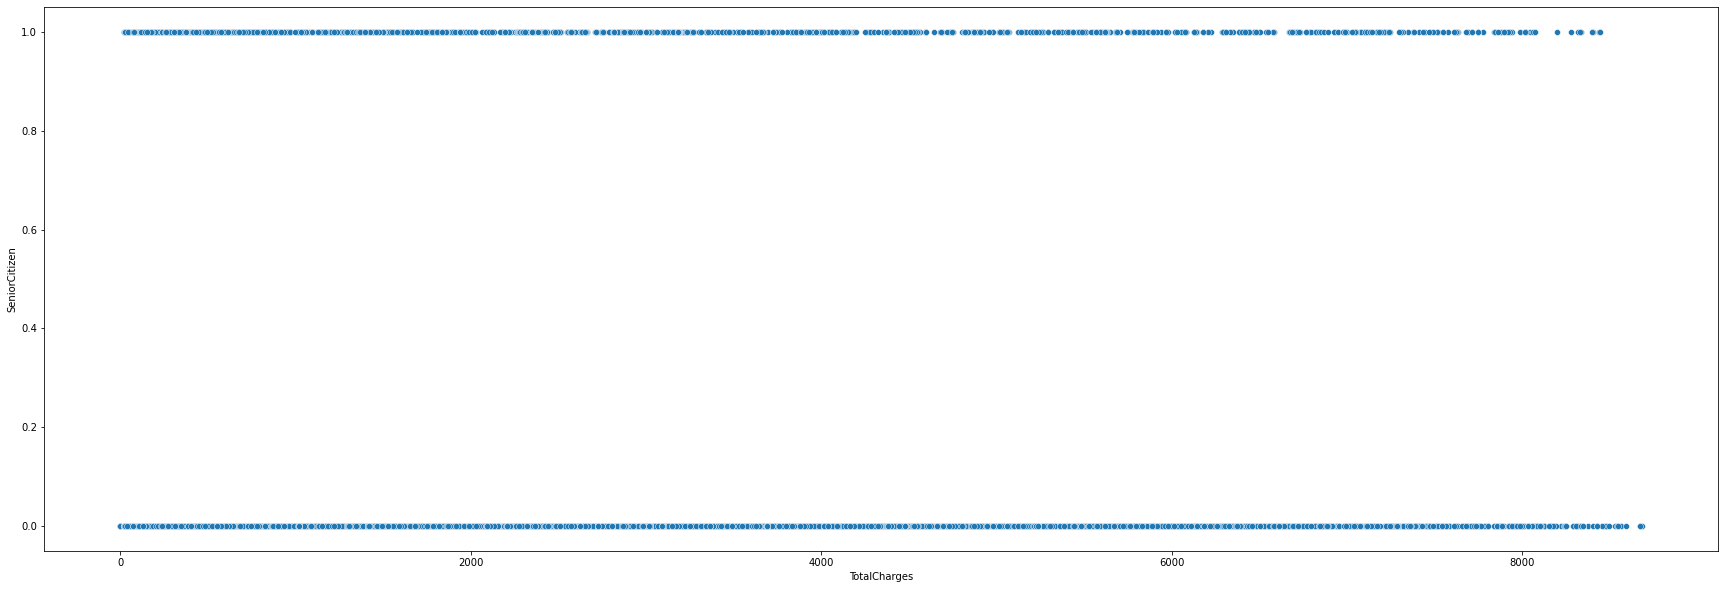

Visualizing Numerical Features with TotalCharges


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


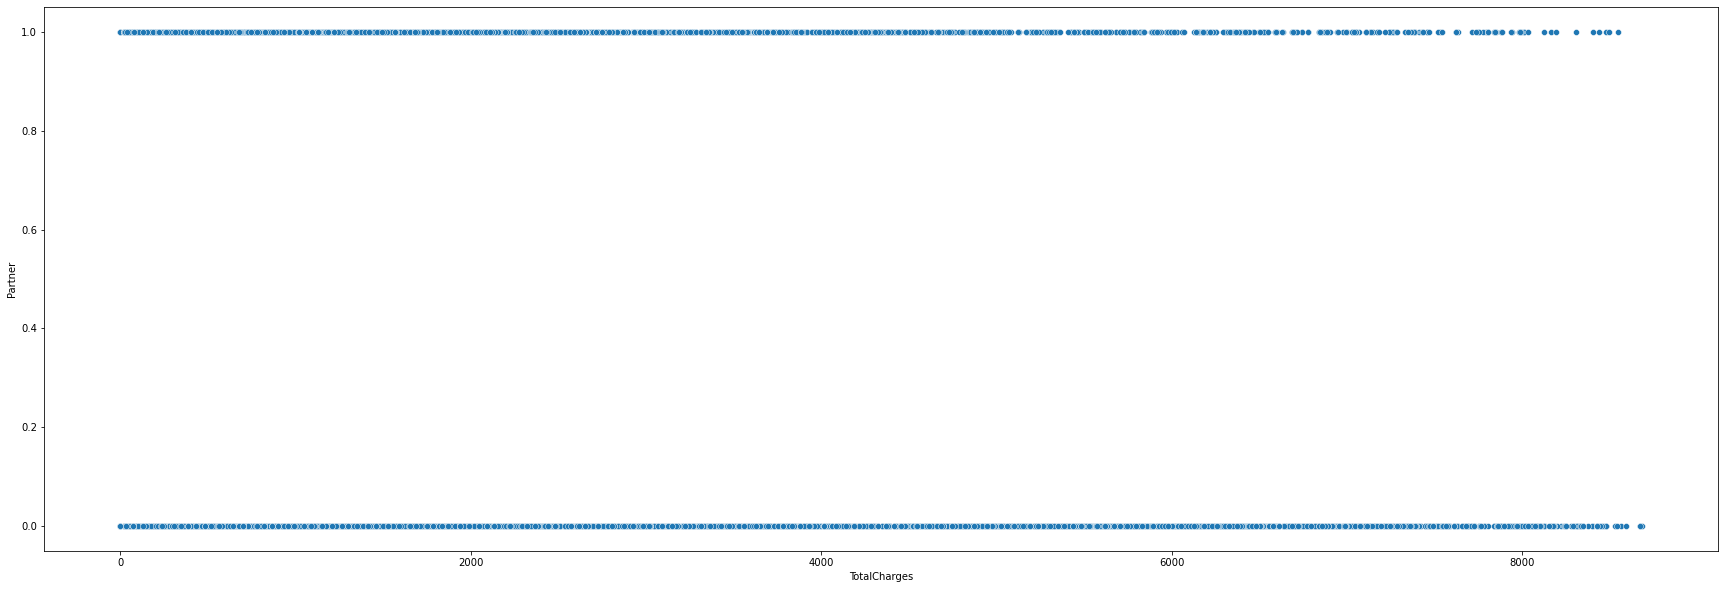

Visualizing Numerical Features with TotalCharges


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


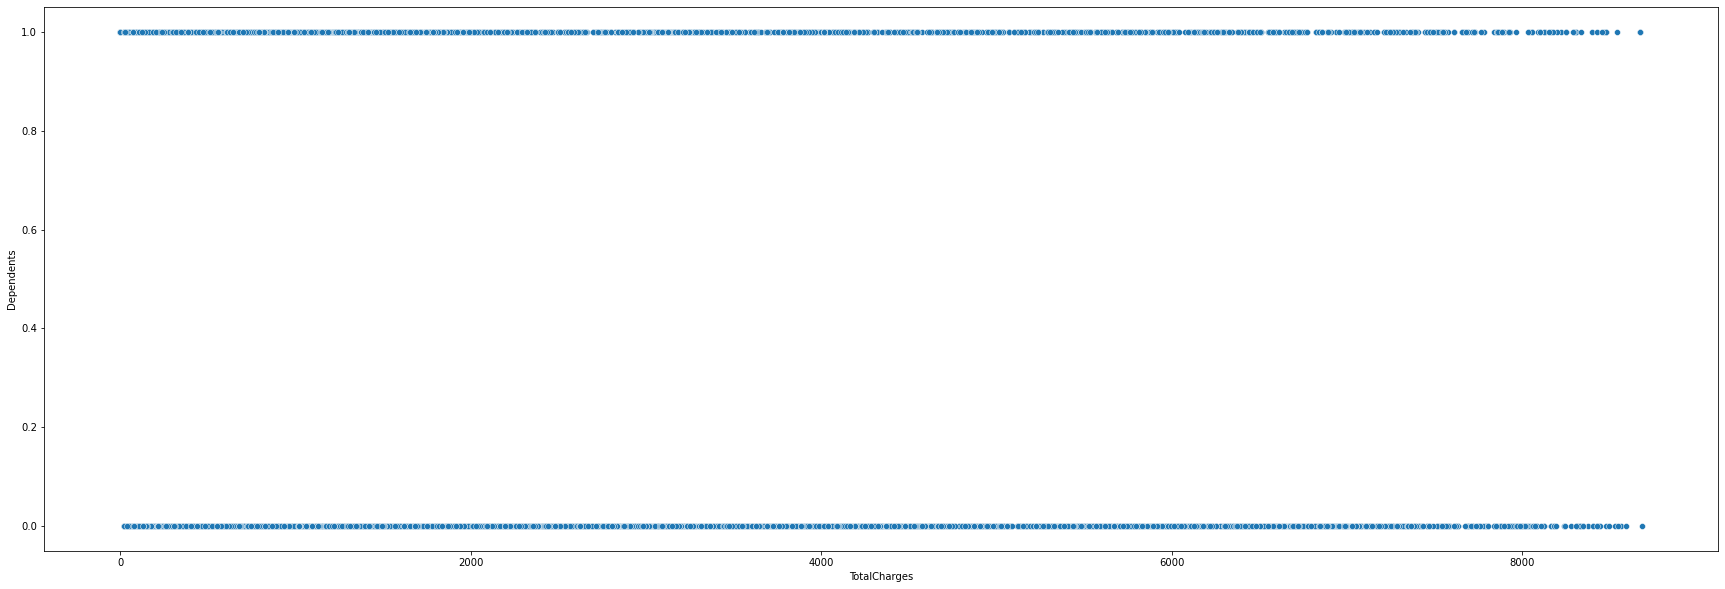

Visualizing Numerical Features with TotalCharges


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


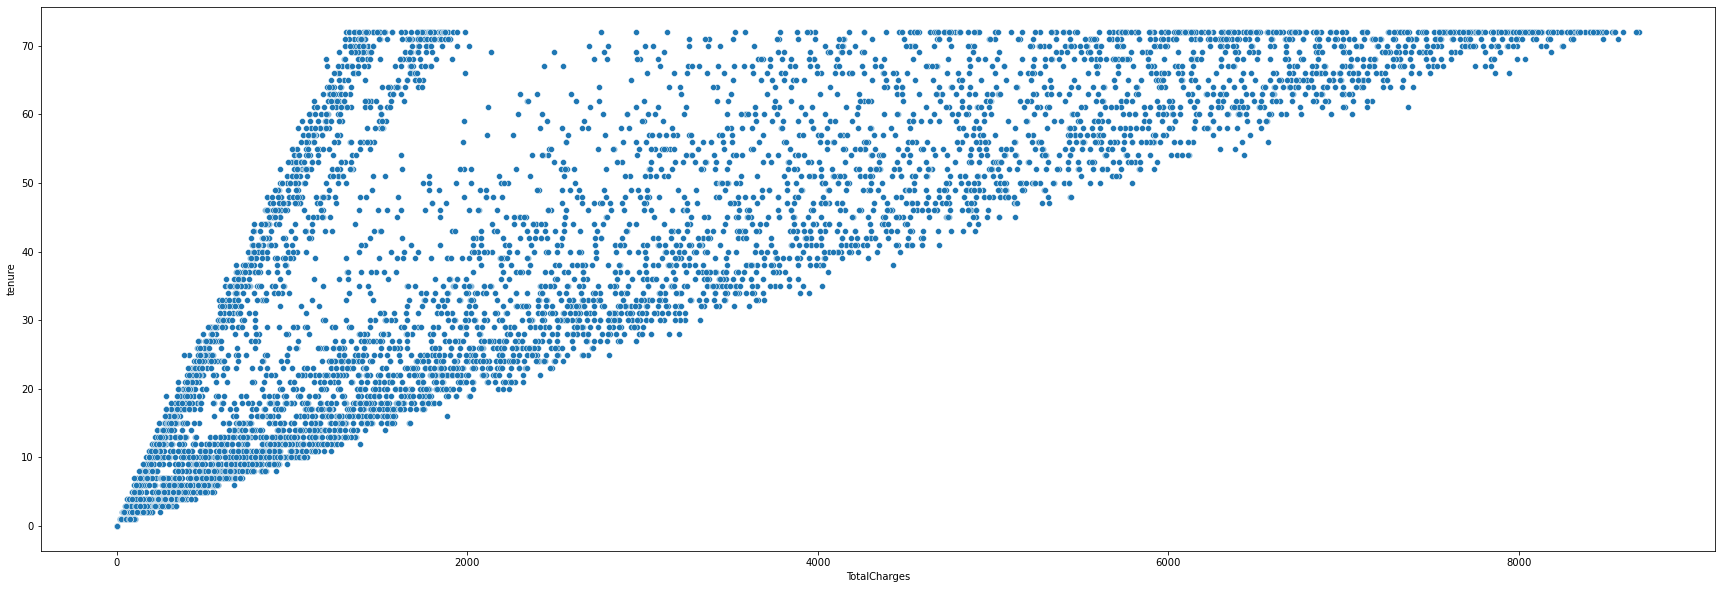

Visualizing Numerical Features with TotalCharges


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


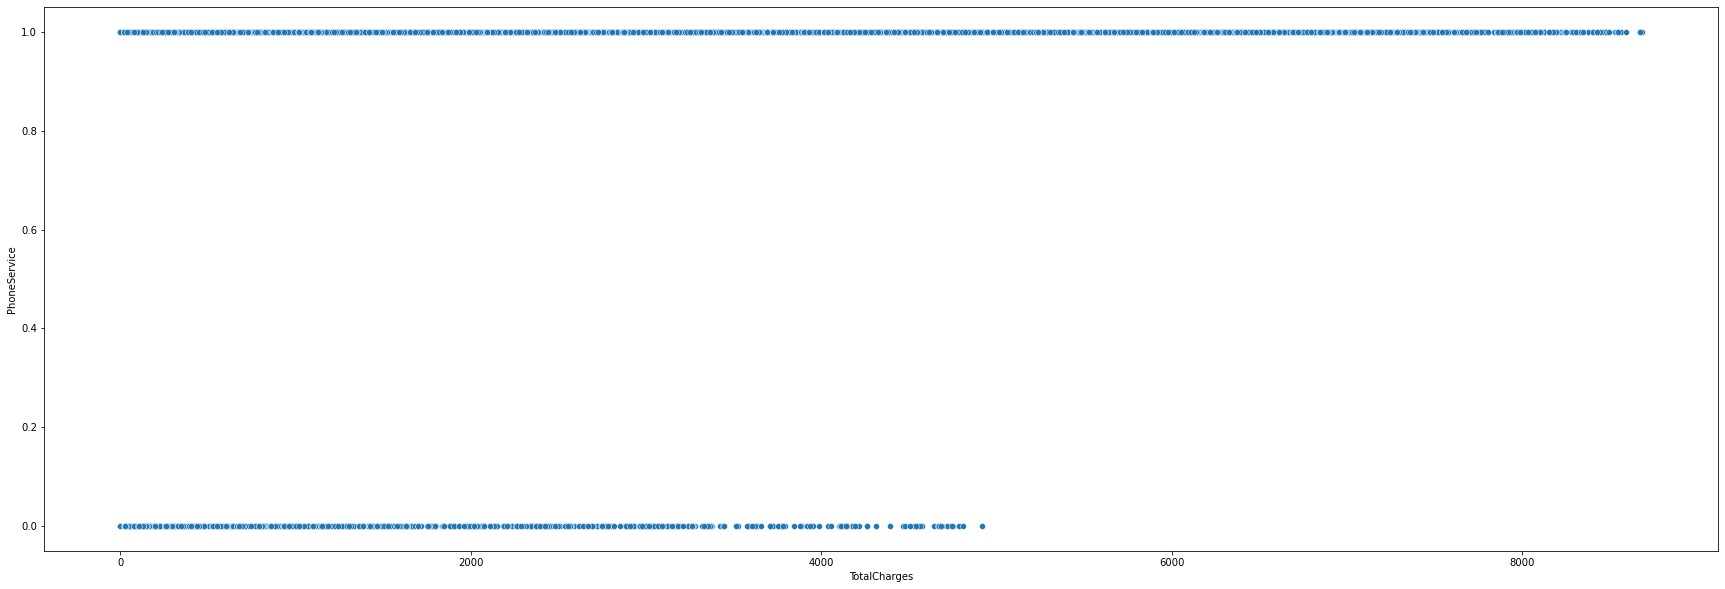

Visualizing Numerical Features with TotalCharges


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


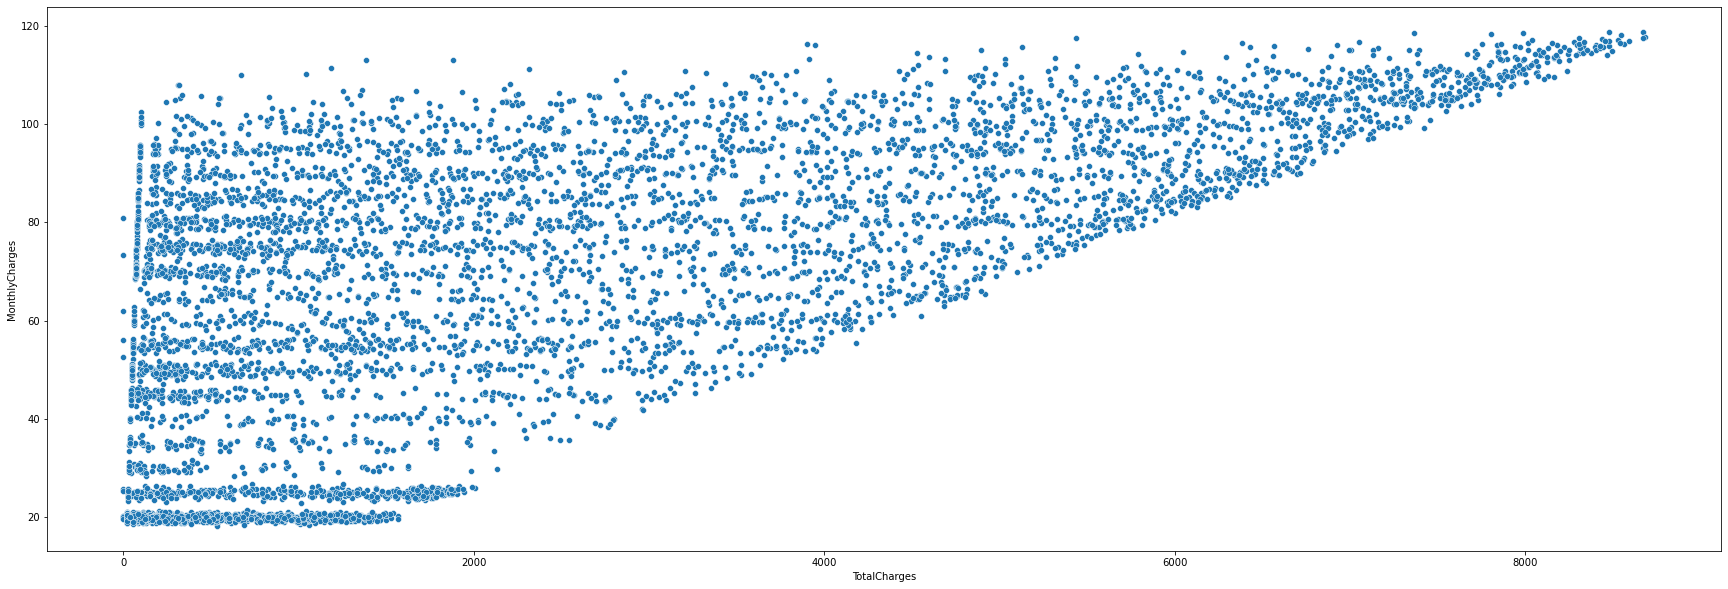

Visualizing Numerical Features with TotalCharges


D:\monika anakonda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


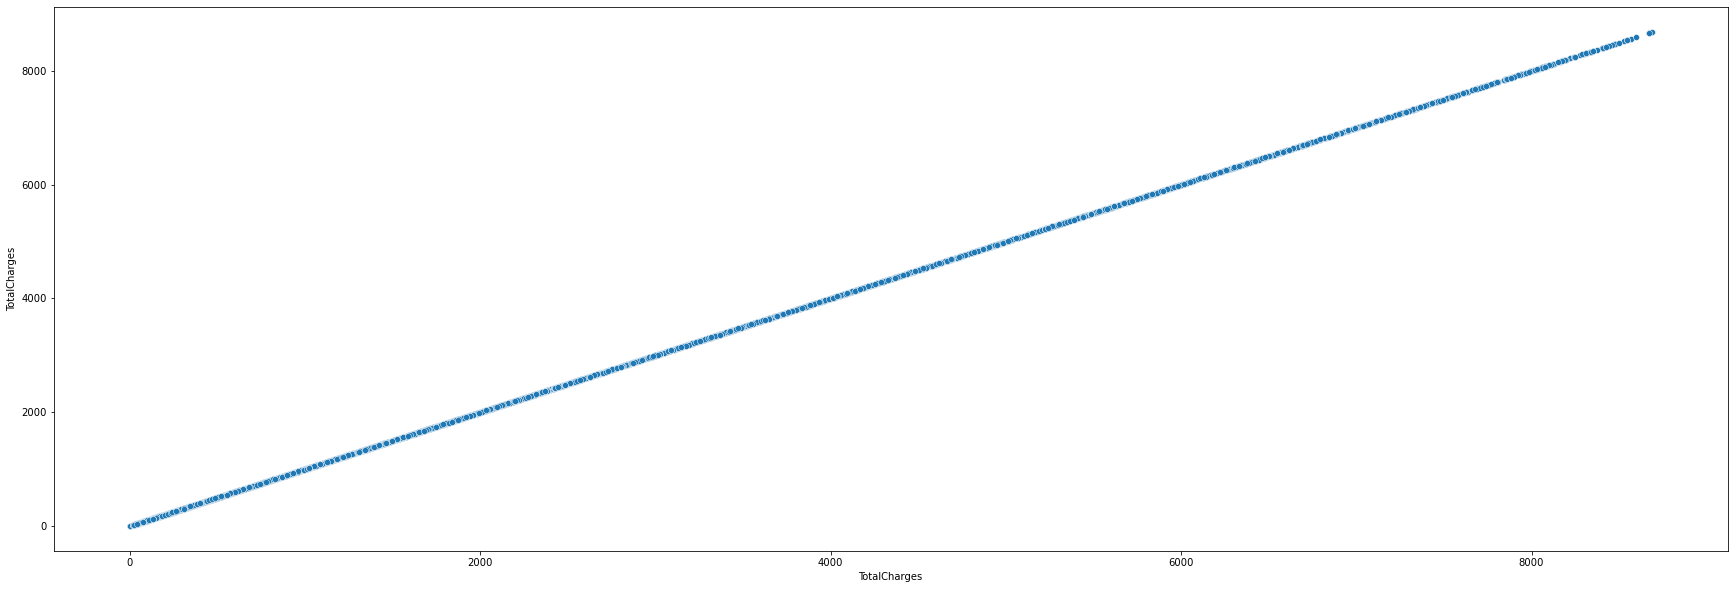

Visualizing Numerical Features with TotalCharges


In [50]:
for i in df0[num_cols]:
    plt.figure(figsize=(30,10))
    sns.scatterplot(df0['TotalCharges'],df0[i])
    plt.show()
    print("Visualizing Numerical Features with TotalCharges")

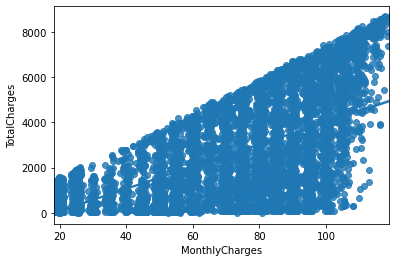

In [51]:
sns.regplot(x="MonthlyCharges", y="TotalCharges", data=df);

In [52]:
#We will observe that the total charges increases as the monthly bill for a customer increases.

#### i. Bar Plot – Every Categorical Variable vs every Numerical Variable

<AxesSubplot:xlabel='Churn', ylabel='count'>

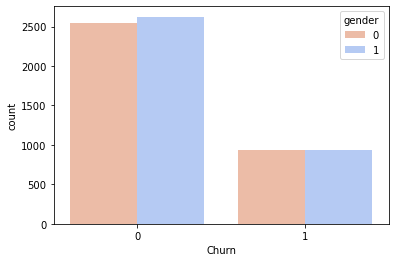

In [53]:
sns.countplot(x='Churn',data=df,hue='gender',palette="coolwarm_r")

<AxesSubplot:xlabel='Churn', ylabel='count'>

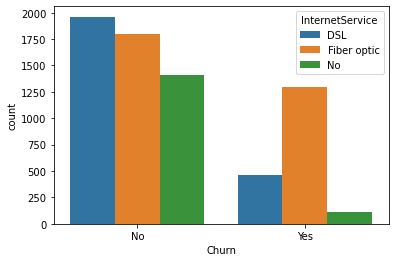

In [54]:
sns.countplot(x='Churn',data=df0, hue='InternetService')

<AxesSubplot:xlabel='Churn', ylabel='count'>

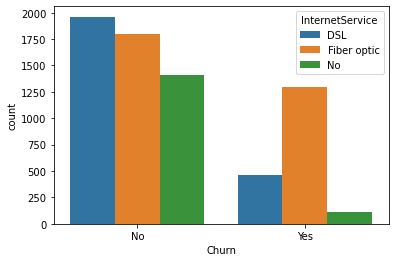

In [55]:
sns.countplot(x='Churn',data=df0, hue='InternetService')

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

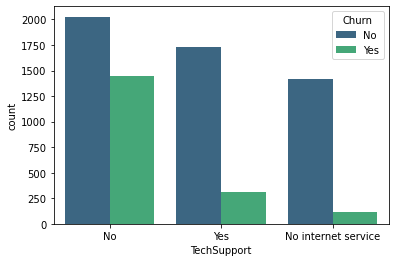

In [56]:
sns.countplot(x='TechSupport',data=df0, hue='Churn',palette='viridis')

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

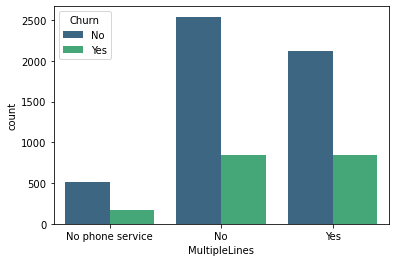

In [57]:
sns.countplot(x='MultipleLines',data=df0, hue='Churn',palette='viridis')

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

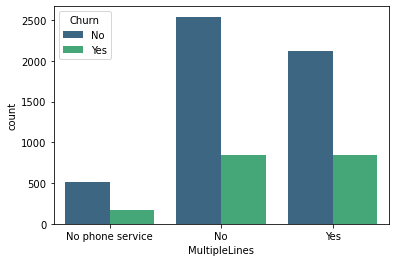

In [58]:
sns.countplot(x='MultipleLines',data=df0, hue='Churn',palette='viridis')

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

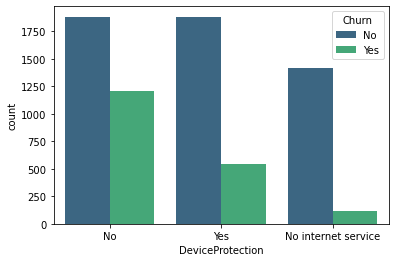

In [59]:
sns.countplot(x='DeviceProtection',data=df0, hue='Churn',palette='viridis')

<AxesSubplot:xlabel='Contract', ylabel='count'>

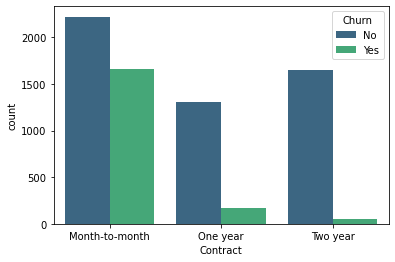

In [60]:
sns.countplot(x='Contract',data=df0, hue='Churn',palette='viridis')

#### j. Pair plot - All Numeric Variables 

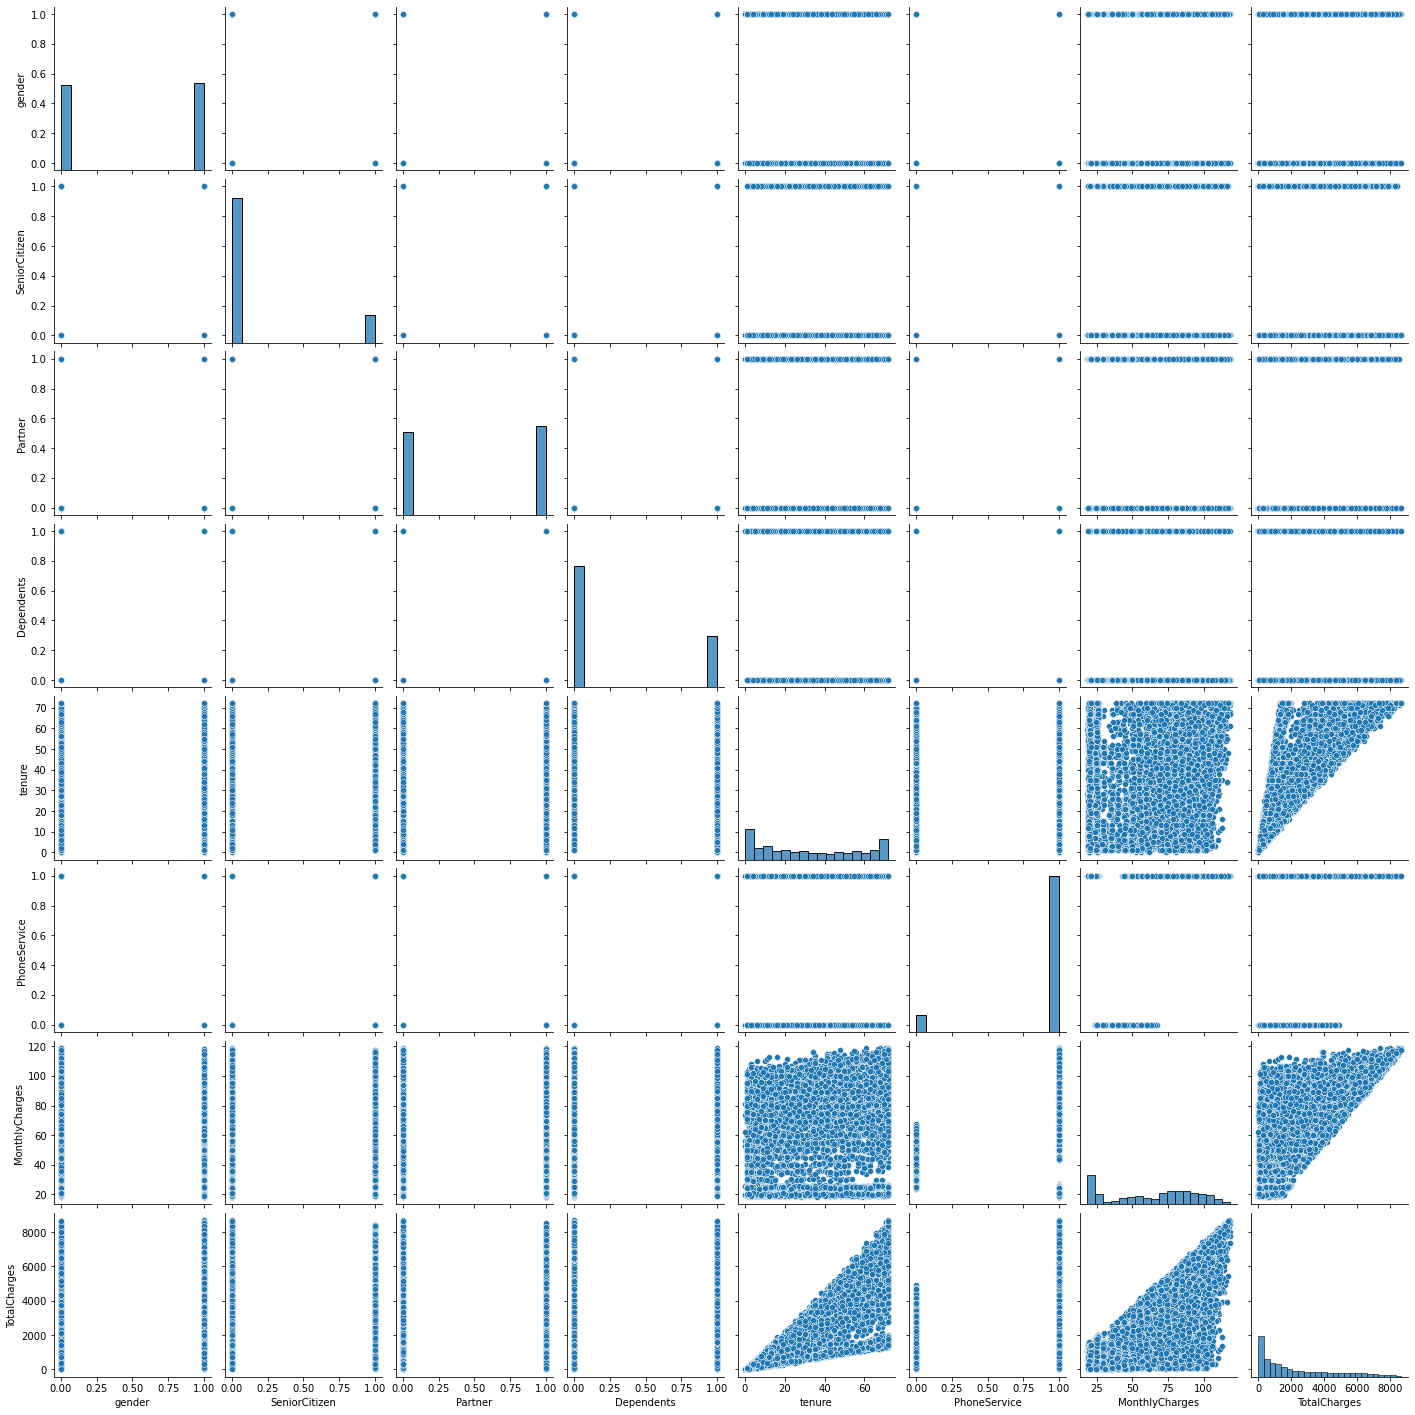

In [61]:
sns.pairplot(df0)

#### k. Line chart to show the trend of data - All Numeric/Date Variables

In [62]:
#with Telco-Customer line chart not able plot

#### k. kdeplot

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

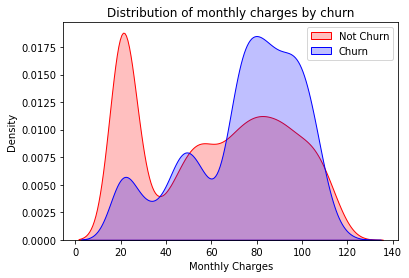

In [63]:
ax = sns.kdeplot(df.MonthlyCharges[(df0["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df0["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Text(0.5, 1.0, 'Distribution of total charges by churn')

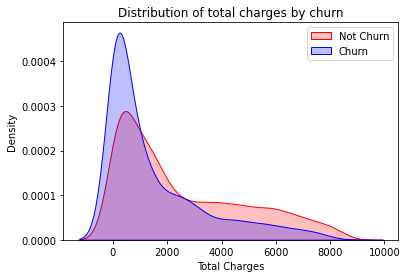

In [64]:
ax = sns.kdeplot(df.TotalCharges[(df0["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.TotalCharges[(df0["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

#### l. Plot the skewness - All Numeric Variables 

D:\monika anakonda setup\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


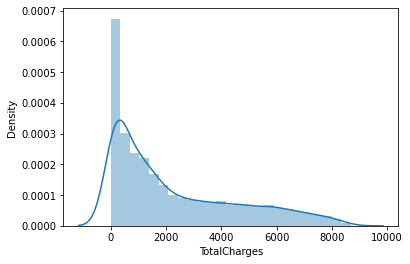

The skewness of this distribution is 0.963234654832277
The Median of this distribution 1394.55 is greater than mean 2279.734303563826 of this distribution


In [65]:
sns.distplot(df0['TotalCharges'])
plt.show()
print('The skewness of this distribution is',df0['TotalCharges'].skew())
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(df0.TotalCharges.median(),df0.TotalCharges.mean()))

D:\monika anakonda setup\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


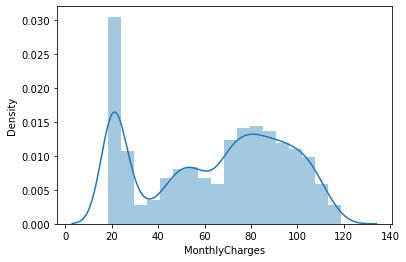

The skewness of this distribution is -0.22052443394398033
The Median of this distribution 70.35 is greater than mean 64.76169246059922 of this distribution


In [66]:
sns.distplot(df0['MonthlyCharges'])
plt.show()
print('The skewness of this distribution is',df0['MonthlyCharges'].skew())
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(df0.MonthlyCharges.median(),df0.MonthlyCharges.mean()))

D:\monika anakonda setup\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


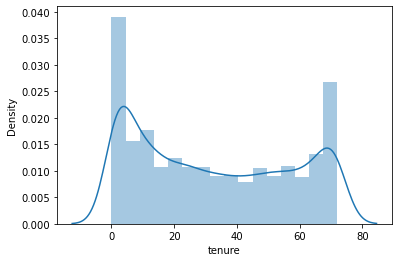

The skewness of this distribution is 0.2395397495619829
The Median of this distribution 29.0 is greater than mean 32.37114865824223 of this distribution


In [67]:
sns.distplot(df0['tenure'])
plt.show()
print('The skewness of this distribution is',df0['tenure'].skew())
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(df0.tenure.median(),df0.tenure.mean()))

##### P.s: All the above charts should be plotted against every independent variable vs Target Variable. (Except b and c) 

###  3. Drop all non-essential features 


In [68]:
#in data cleaning drop customer_Id

###  4. Replace outliers with Nulls (if you find it essential) and replace all the nulls with respective approach of central tendencies (Mean/Median/Mode). 

In [69]:
median = df0.loc[df0['tenure']<75, 'tenure'].median()
df0.loc[df0.tenure > 75, 'tenure'] = np.nan
df0.fillna(median,inplace=True)

In [70]:
median = df0.loc[df0['MonthlyCharges']<75, 'MonthlyCharges'].median()
df0.loc[df0.MonthlyCharges > 75, 'MonthlyCharges'] = np.nan
df0.fillna(median,inplace=True)

In [71]:
median = df0.loc[df0['TotalCharges']<75, 'TotalCharges'].median()
df0.loc[df0.MonthlyCharges > 75, 'TotalCharges'] = np.nan
df0.fillna(median,inplace=True)

###  5. Calculate Z score to validate whether outliers are still present or not. 


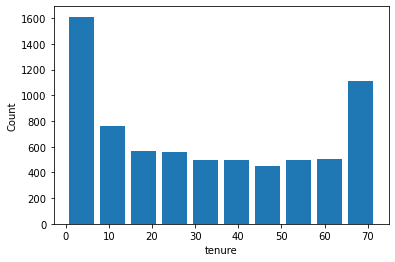

In [72]:
plt.hist(df0.tenure, bins=10, rwidth=0.8)
plt.xlabel('tenure')
plt.ylabel('Count')
plt.show()

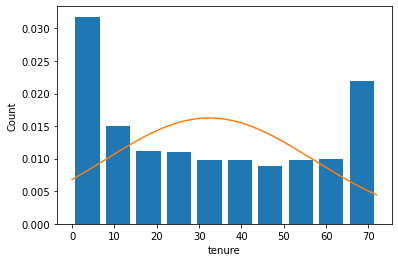

In [73]:
from scipy.stats import norm
plt.hist(df0.tenure, bins=10, rwidth=0.8, density=True)
plt.xlabel('tenure')
plt.ylabel('Count')
rng = np.arange(df0.tenure.min(), df0.tenure.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df0.tenure.mean(),df0.tenure.std()))

In [74]:
df0.tenure.mean()

32.37114865824223

In [75]:
df0.tenure.std()

24.55948102309423

In [76]:
#Outlier detection using z score
df0['zscore tenure'] = ( df0.tenure - df0.tenure.mean() ) / df0.tenure.std()
df0.head(5)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        0           0     1.0             0   
1       1              0        1           0    34.0             1   
2       1              0        1           0     2.0             1   
3       1              0        1           0    45.0             0   
4       0              0        1           0     2.0             1   

      MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0  No phone service             DSL             No          Yes  ...   
1                No             DSL            Yes           No  ...   
2                No             DSL            Yes          Yes  ...   
3  No phone service             DSL            Yes           No  ...   
4                No     Fiber optic             No           No  ...   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn zscore tenure  
0           Electronic check          29.85         29.85     No     -1.277354  
1               Mailed check          56.95       1889.50     No      0.066323  
2               Mailed check          53.85        108.15    Yes     -1.236636  
3  Bank transfer (automatic)          42.30       1840.75     No      0.514215  
4           Electronic check          70.70        151.65    Yes     -1.236636  

[5 rows x 21 columns]

In [77]:
#Above for first record with tenure 1.0, z score is -1.277354. This means 1.0 is -1.277354 standard deviation away from mean

In [78]:
df0[df0['zscore tenure']>3]

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn, zscore tenure]
Index: []

[0 rows x 21 columns]

In [79]:
#no outliers

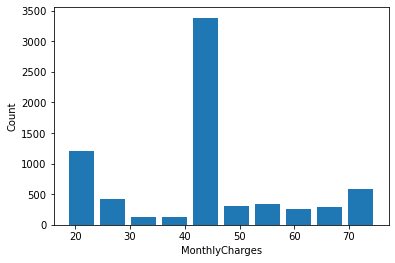

In [80]:
plt.hist(df0.MonthlyCharges, bins=10, rwidth=0.8)
plt.xlabel('MonthlyCharges')
plt.ylabel('Count')
plt.show()

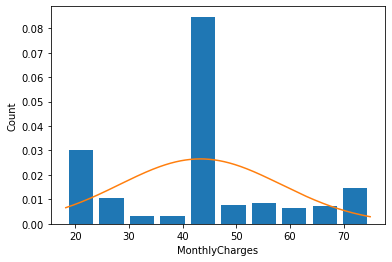

In [81]:
from scipy.stats import norm
plt.hist(df0.MonthlyCharges, bins=10, rwidth=0.8, density=True)
plt.xlabel('MonthlyCharges')
plt.ylabel('Count')
rng = np.arange(df0.MonthlyCharges.min(), df0.MonthlyCharges.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df0.MonthlyCharges.mean(),df0.MonthlyCharges.std()))

In [82]:
df0.MonthlyCharges.mean()

43.32428652563069

In [83]:
df0.MonthlyCharges.std()

15.028643570254662

In [84]:
#Outlier detection using z score
df0['zscore MonthlyCharges'] = ( df0.MonthlyCharges - df0.MonthlyCharges.mean() ) / df0.MonthlyCharges.std()
df0.head(5)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        0           0     1.0             0   
1       1              0        1           0    34.0             1   
2       1              0        1           0     2.0             1   
3       1              0        1           0    45.0             0   
4       0              0        1           0     2.0             1   

      MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0  No phone service             DSL             No          Yes  ...   
1                No             DSL            Yes           No  ...   
2                No             DSL            Yes          Yes  ...   
3  No phone service             DSL            Yes           No  ...   
4                No     Fiber optic             No           No  ...   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges TotalCharges  Churn  \
0           Electronic check          29.85        29.85     No   
1               Mailed check          56.95      1889.50     No   
2               Mailed check          53.85       108.15    Yes   
3  Bank transfer (automatic)          42.30      1840.75     No   
4           Electronic check          70.70       151.65    Yes   

   zscore tenure zscore MonthlyCharges  
0      -1.277354             -0.896574  
1       0.066323              0.906650  
2      -1.236636              0.700377  
3       0.514215             -0.068156  
4      -1.236636              1.821569  

[5 rows x 22 columns]

In [85]:
#Above for first record with MonthlyCharges 29.85, z score is -0.896574. This means 29.85 is -0.896574 standard deviation away from mean

In [86]:
df0[df0['zscore MonthlyCharges']>3]

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn, zscore tenure, zscore MonthlyCharges]
Index: []

[0 rows x 22 columns]

In [87]:
# no outliers

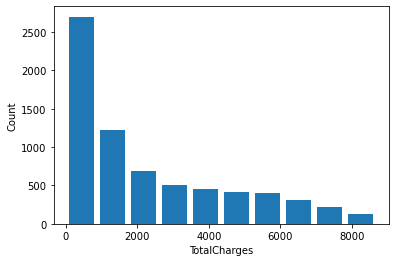

In [88]:
plt.hist(df0.TotalCharges, bins=10, rwidth=0.8)
plt.xlabel('TotalCharges')
plt.ylabel('Count')
plt.show()

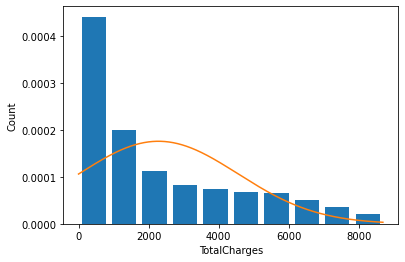

In [89]:
from scipy.stats import norm
plt.hist(df0.TotalCharges, bins=10, rwidth=0.8, density=True)
plt.xlabel('TotalCharges')
plt.ylabel('Count')
rng = np.arange(df0.TotalCharges.min(), df0.TotalCharges.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df0.TotalCharges.mean(),df0.TotalCharges.std()))

In [90]:
df0.TotalCharges.mean()

2279.734303563826

In [91]:
df0.TotalCharges.std()

2266.7944696890195

In [92]:
#Outlier detection using z score
df0['zscoreTotalCharges'] = ( df0.TotalCharges - df0.TotalCharges.mean() ) / df0.TotalCharges.std()
df0.head(5)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        0           0     1.0             0   
1       1              0        1           0    34.0             1   
2       1              0        1           0     2.0             1   
3       1              0        1           0    45.0             0   
4       0              0        1           0     2.0             1   

      MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0  No phone service             DSL             No          Yes  ...   
1                No             DSL            Yes           No  ...   
2                No             DSL            Yes          Yes  ...   
3  No phone service             DSL            Yes           No  ...   
4                No     Fiber optic             No           No  ...   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month              Yes           Electronic check   
1              No        One year               No               Mailed check   
2              No  Month-to-month              Yes               Mailed check   
3              No        One year               No  Bank transfer (automatic)   
4              No  Month-to-month              Yes           Electronic check   

  MonthlyCharges TotalCharges Churn  zscore tenure  zscore MonthlyCharges  \
0          29.85        29.85    No      -1.277354              -0.896574   
1          56.95      1889.50    No       0.066323               0.906650   
2          53.85       108.15   Yes      -1.236636               0.700377   
3          42.30      1840.75    No       0.514215              -0.068156   
4          70.70       151.65   Yes      -1.236636               1.821569   

  zscoreTotalCharges  
0          -0.992540  
1          -0.172152  
2          -0.957998  
3          -0.193659  
4          -0.938808  

[5 rows x 23 columns]

In [93]:
#Above for first record with TotalCharges 29.85, z score is -2.635742. This means 29.85 is -2.635742 standard deviation away from mean

In [94]:
#Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away

In [95]:
df0[df0['zscoreTotalCharges']>3]

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn, zscore tenure, zscore MonthlyCharges, zscoreTotalCharges]
Index: []

[0 rows x 23 columns]

In [96]:
# no outliers

###  6. Clean the data with formatting issues if any. (converting datatypes, replacing dollars, etc.) 

In [97]:
# data cleaning 

###  7. Add your view of EDA to enhance understanding of data. i.e., Grouping data and observing the way data is distributed. Try to add as many layers of EDA as possible. 


###  8. Build a model of choice – Classification problem statement, hence build a classification model first and calculate Confusion Matrix, AUC, F1 Score, Precision, Recall and Accuracy. 


In [226]:
X = df.drop('Churn',axis='columns')
y = df['Churn']

In [228]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [229]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [230]:
y_train.value_counts()

0    4139
1    4139
Name: Churn, dtype: int64

In [233]:
y_preds = dt(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

TypeError: 'DecisionTreeClassifier' object is not callable

### Logistic Regression

In [221]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import sklearn
import sklearn.tree as tree
from IPython.display import Image  
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


In [99]:
X1 = df.drop(columns=['Churn'])

In [100]:
Y1 = df.Churn

In [205]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=101)

In [234]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=10**10, penalty = 'l2')
lr.fit(X1_train, y1_train)


LogisticRegression(C=10000000000)

In [235]:
y1_pred = lr.predict(X1_test)

In [212]:
lr.score(X1_test, y1_test)

0.8078561287269286

### Confusion matrix

In [213]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y1_test,y1_pred)


array([[1399,  147],
       [ 259,  308]], dtype=int64)

### AUC

In [214]:
y1_proba = lr.predict_proba(X1_test)[:,1]

In [215]:
sklearn.metrics.roc_auc_score(y1_test,y1_proba)

0.8452723190756825

###  Precision

In [108]:
sklearn.metrics.precision_score(y1_test,y1_pred)

0.676923076923077

### Recall 

In [109]:
sklearn.metrics.recall_score(y1_test,y1_pred)

0.5432098765432098

### Accuracy

In [110]:
print('Accuracy: %.3f' % accuracy_score(y1_test, y1_pred))

Accuracy: 0.808


### F1 Score

In [111]:
#F1 = 2 * (precision * recall) / (precision + recall)

In [112]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1546
           1       0.68      0.54      0.60       567

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113



### KFold

In [113]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,random_state=0,shuffle=True)
sklearn.model_selection.cross_val_score(lr,X1,Y1,cv=5,scoring='roc_auc').mean()

0.8441743028902119

Text(0.5, 0, 'False Positive Rate')

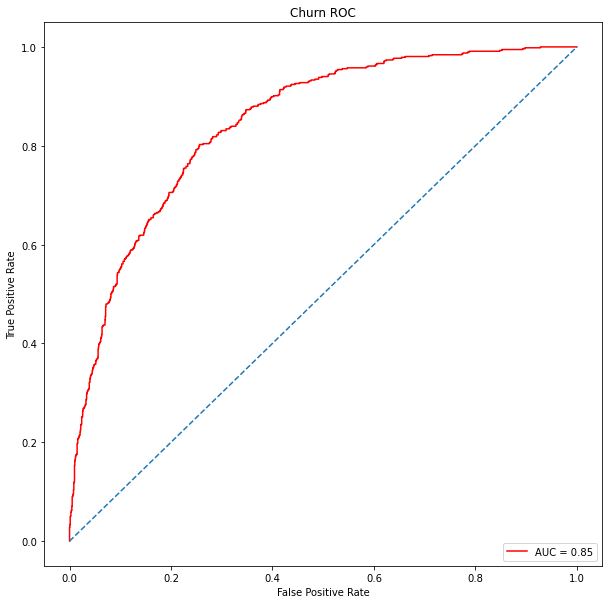

In [114]:
y1_prob = lr.predict_proba(X1_test)[:,1]   
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y1_test, y1_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Churn ROC')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### 2 random forest

In [115]:
import sklearn as sk

In [116]:
X2 = df.drop(columns=['Churn'])

In [117]:
Y2 = df.Churn

In [118]:
from sklearn.model_selection import train_test_split
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X2,Y2,test_size=0.3,random_state = 0)

In [119]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state=2, min_samples_leaf = 35, max_features= 3)
rf.fit(X2_train,Y2_train)

RandomForestClassifier(max_features=3, min_samples_leaf=35, n_estimators=1000,
                       random_state=2)

In [120]:
y2_pred = rf.predict(X2_test)

In [121]:
rf.score(X2_test, Y2_test)

0.791292001893043

### Confusion matrix

In [122]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y2_test,y2_pred)

array([[1446,  114],
       [ 327,  226]], dtype=int64)

### AUC

In [123]:
y2_proba = rf.predict_proba(X2_test)[:,1]

In [124]:
sklearn.metrics.roc_auc_score(Y2_test,y2_proba)

0.8389547688598322

###  Precision

In [125]:
import sklearn
sklearn.metrics.precision_score(Y2_test,y2_pred) 

0.6647058823529411

### Recall 

In [126]:
sklearn.metrics.recall_score(Y2_test,y2_pred)

0.40867992766726946

### Accuracy

In [127]:
print('Accuracy: %.3f' % accuracy_score(Y2_test, y2_pred))

Accuracy: 0.791


### F1 Score

In [128]:
from sklearn.metrics import classification_report
print(classification_report(Y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1560
           1       0.66      0.41      0.51       553

    accuracy                           0.79      2113
   macro avg       0.74      0.67      0.69      2113
weighted avg       0.78      0.79      0.77      2113



### KFold

In [129]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,random_state=0,shuffle=True)
sklearn.model_selection.cross_val_score(rf,X2,Y2,cv=5,scoring='roc_auc').mean()

0.8458672589470935

Text(0.5, 0, 'False Positive Rate')

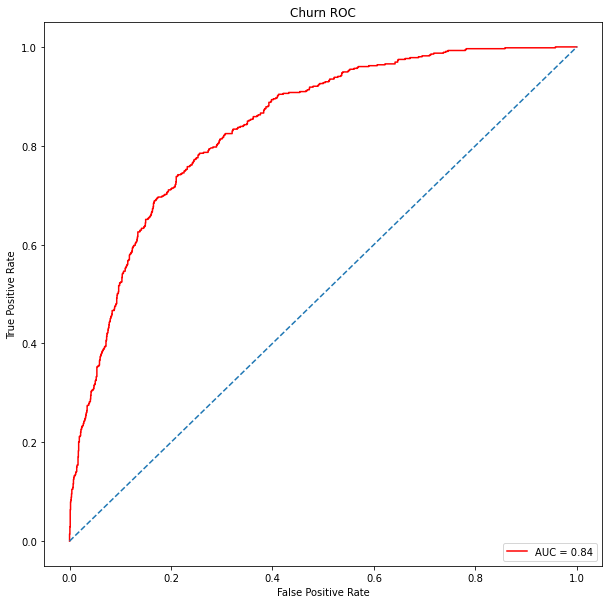

In [130]:
### KFoldy2_prob = rf.predict_proba(X2_test)[:,1]  
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y2_test, y2_proba)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Churn ROC')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### 3 Decision tree

In [131]:
x3 = df.drop(columns=['Churn'])

In [132]:
y3 = df.Churn

In [133]:
from sklearn.model_selection import train_test_split
x3_train,x3_test,y3_train,y3_test = train_test_split(x3,y3,test_size=0.3,random_state = 0)

In [134]:
dt = tree.DecisionTreeClassifier(max_depth = 3)

In [135]:
dt.fit(x3,y3)

DecisionTreeClassifier(max_depth=3)

In [136]:
y3_pred = rf.predict(x3_test)

In [137]:
dt.score(x3_test, y3_test)

0.7889256980596309

### Confusion matrix

In [138]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y3_test,y3_pred)

array([[1446,  114],
       [ 327,  226]], dtype=int64)

### AUC

In [139]:
y3_proba = dt.predict_proba(x3_test)[:,1]

In [140]:
sklearn.metrics.roc_auc_score(y3_test,y3_proba)

0.8155416840543422

###  Precision

In [141]:
import sklearn
sklearn.metrics.precision_score(y3_test,y3_pred)

0.6647058823529411

### Recall 

In [142]:
sklearn.metrics.recall_score(y3_test,y3_pred)

0.40867992766726946

### Accuracy

In [143]:
print('Accuracy: %.3f' % accuracy_score(y3_test, y3_pred))

Accuracy: 0.791


### F1 Score

In [144]:
from sklearn.metrics import classification_report
print(classification_report(y3_test, y3_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1560
           1       0.66      0.41      0.51       553

    accuracy                           0.79      2113
   macro avg       0.74      0.67      0.69      2113
weighted avg       0.78      0.79      0.77      2113



### KFold

In [145]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,random_state=0,shuffle=True)
sklearn.model_selection.cross_val_score(rf,X2,Y2,cv=5,scoring='roc_auc').mean()

0.8458672589470935

Text(0.5, 0, 'False Positive Rate')

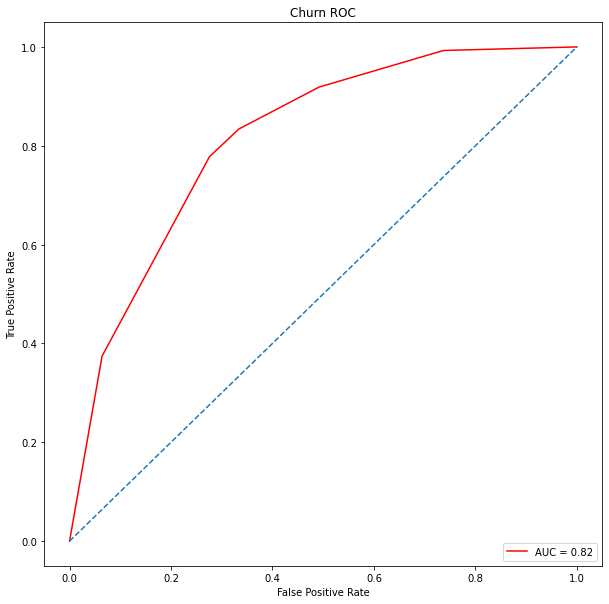

In [146]:
### KFoldy2_prob = rf.predict_proba(X2_test)[:,1]  
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y3_test, y3_proba)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Churn ROC')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### 4 KNN

In [147]:
from sklearn.neighbors import KNeighborsClassifier 

In [148]:
x4 = df.drop(columns=['Churn'])

In [149]:
y4 = df.Churn

In [150]:
from sklearn.model_selection import train_test_split
x4_train,x4_test,y4_train,y4_test = train_test_split(x4,y4,test_size=0.3,random_state = 0)

In [151]:
knn = KNeighborsClassifier(n_neighbors=3) 

In [152]:
knn.fit(x4,y4)

KNeighborsClassifier(n_neighbors=3)

In [153]:
y4_pred = knn.predict(x4_test)

In [154]:
knn.score(x4_test, y4_test)

0.8580217699952674

### Confusion matrix

In [155]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y4_test,y4_pred)

array([[1441,  119],
       [ 181,  372]], dtype=int64)

### AUC

In [156]:
y4_proba = dt.predict_proba(x4_test)[:,1]

In [157]:
sklearn.metrics.roc_auc_score(y4_test,y4_proba)

0.8155416840543422

###  Precision

In [158]:
import sklearn
sklearn.metrics.precision_score(y4_test,y4_pred)

0.7576374745417516

### Recall 

In [159]:
sklearn.metrics.recall_score(y4_test,y4_pred)

0.6726943942133815

### Accuracy

In [160]:
print('Accuracy: %.3f' % accuracy_score(y4_test, y4_pred))

Accuracy: 0.858


### F1 Score

In [161]:
from sklearn.metrics import classification_report
print(classification_report(y4_test, y4_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1560
           1       0.76      0.67      0.71       553

    accuracy                           0.86      2113
   macro avg       0.82      0.80      0.81      2113
weighted avg       0.85      0.86      0.86      2113



### KFold

In [162]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,random_state=0,shuffle=True)
sklearn.model_selection.cross_val_score(knn,x4,y4,cv=5,scoring='roc_auc').mean()

0.7178917495878752

Text(0.5, 0, 'False Positive Rate')

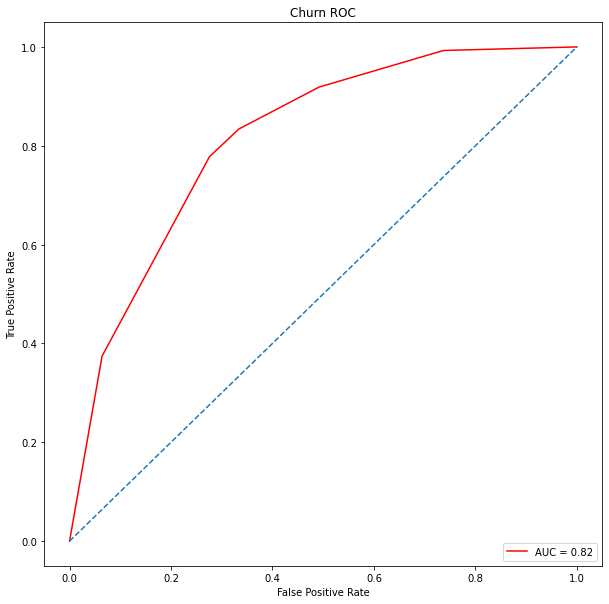

In [163]:
### KFoldy2_prob = rf.predict_proba(X2_test)[:,1]  
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y4_test, y4_proba)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Churn ROC')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Naive Bayes

In [164]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [165]:
x5 = df.drop(columns=['Churn'])

In [166]:
y5 = df.Churn

In [167]:
from sklearn.model_selection import train_test_split
x5_train,x5_test,y5_train,y5_test = train_test_split(x5,y5,test_size=0.3,random_state = 0)

In [168]:
gnb = GaussianNB()

In [169]:
gnb.fit(x5,y5)

GaussianNB()

In [170]:
y5_pred = gnb.predict(x5_test)

In [171]:
gnb.score(x5_test, y5_test)

0.7297681022243256

### Confusion matrix

In [172]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y5_test,y5_pred)

array([[1113,  447],
       [ 124,  429]], dtype=int64)

### AUC

In [173]:
y5_proba = dt.predict_proba(x5_test)[:,1]

In [174]:
sklearn.metrics.roc_auc_score(y5_test,y5_proba)

0.8155416840543422

###  Precision

In [175]:
import sklearn
sklearn.metrics.precision_score(y5_test,y5_pred)

0.4897260273972603

### Recall 

In [176]:
sklearn.metrics.recall_score(y5_test,y5_pred)

0.7757685352622061

### Accuracy

In [177]:
print('Accuracy: %.3f' % accuracy_score(y5_test, y5_pred))

Accuracy: 0.730


### F1 Score

In [178]:
from sklearn.metrics import classification_report
print(classification_report(y5_test, y5_pred))

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1560
           1       0.49      0.78      0.60       553

    accuracy                           0.73      2113
   macro avg       0.69      0.74      0.70      2113
weighted avg       0.79      0.73      0.74      2113



#### K-Nearest Neighbor is more accurate as compare to Logistic regression,Random forest,Decision tree,Naive Bayes.
#### K-Nearest Neighbor have accuracy on test data to almost 85%.

###  9. Build at least a minimum of 4 different Regression models. All the models should use K-Fold cross Validation to train the model with at least 5-fold cross validation. 

#### Logistic regression model performance using cross_val_score 

In [179]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,random_state=0,shuffle=True)
sklearn.model_selection.cross_val_score(lr,X1,Y1,cv=5,scoring='roc_auc').mean()

0.8441743028902119

#### Random forest model performance using cross_val_score 

In [180]:
kf = KFold(n_splits=10,random_state=0,shuffle=True)
sklearn.model_selection.cross_val_score(rf,X2,Y2,cv=5,scoring='roc_auc').mean()

0.8458672589470935

####   Decision tree model performance using cross_val_score 

In [181]:
kf = KFold(n_splits=10,random_state=0,shuffle=True)
sklearn.model_selection.cross_val_score(dt,x3,y3,cv=5,scoring='roc_auc').mean()

0.8186527233601402

####   K-Nearest Neighbor model performance using cross_val_score 

In [182]:
kf = KFold(n_splits=10,random_state=0,shuffle=True)
sklearn.model_selection.cross_val_score(knn,x4,y4,cv=5,scoring='roc_auc').mean()

0.7178917495878752

####   Naive Bayes model performance using cross_val_score 

In [183]:
kf = KFold(n_splits=10,random_state=0,shuffle=True)
sklearn.model_selection.cross_val_score(gnb,x5,y5,cv=5,scoring='roc_auc').mean()

0.8298259722379082

###  10. Compare the error and pick the ideal one with least errors. 


In [184]:
from sklearn import metrics

In [185]:
mae_lr = round(metrics.mean_absolute_error(y1_test, y1_pred), 4)
mse_lr = round(metrics.mean_squared_error(y1_test, y1_pred), 4)

In [186]:
mae_rf = round(metrics.mean_absolute_error(Y2_test, y2_pred), 4)
mse_rf = round(metrics.mean_squared_error(Y2_test, y2_pred), 4)

In [187]:
mae_dt = round(metrics.mean_absolute_error(y3_test, y3_pred), 4)
mse_dt = round(metrics.mean_squared_error(y3_test, y3_pred), 4)

In [188]:
mae_knn = round(metrics.mean_absolute_error(y4_test, y4_pred), 4)
mse_knn = round(metrics.mean_squared_error(y4_test, y4_pred), 4)

In [189]:
mae_gnb = round(metrics.mean_absolute_error(y5_test, y5_pred), 4)
mse_gnb = round(metrics.mean_squared_error(y5_test, y5_pred), 4)

In [190]:
compare_models = pd.DataFrame(
    {  'Model' : ['lr', 'rf','dt','knn','gnb'],
        'MAE'  : [mae_lr, mae_rf, mae_dt, mae_knn, mae_gnb],
        'MSE'  : [mse_lr, mse_rf, mae_dt, mae_knn, mae_gnb]
    })
  
print(compare_models)

  Model     MAE     MSE
0    lr  0.1921  0.1921
1    rf  0.2087  0.2087
2    dt  0.2087  0.2087
3   knn  0.1420  0.1420
4   gnb  0.2702  0.2702


#### K-Nearest Neighbor have least errors and high accuracy

###  11. Run hyperparameter tuning on all the models and pick the best parameters (A minimum of 2 Parameters should be tuned) and picked. 

In [191]:
from sklearn.model_selection import GridSearchCV

#### Logistic regression

In [192]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiating logistic regression classifier
logreg = LogisticRegression()

# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)

logreg_cv.fit(X1, Y1)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.8057659969998066


#### for logistic regression best parameter is 'C': 0.006105402296585327

#### Random forest 

In [193]:
rfc = RandomForestClassifier()

forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(X2_train, Y2_train)

print(clf.best_params_)

print(clf.best_score_)

{'max_depth': 10, 'max_features': 5}
0.8036511156186613


#### for Random forest best parameter is 'max_depth': 10, 'max_features': 3

#### Decision tree

In [194]:
# Necessary imports
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Creating the hyperparameter grid
param_dist = {"max_depth": [3, None],
                "max_features": randint(1, 9),
                "min_samples_leaf": randint(1, 9),
                "criterion": ["gini", "entropy"]}

# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()

# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)

tree_cv.fit(x3, y3)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 6}
Best score is 0.7786454972901478


#### for Decision tree best parameter is 'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 6

#### K-Nearest Neighbor

In [195]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
knn = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
knn_res = knn.fit(x4_train, y4_train)

print("Tuned K-Nearest Neighbor Parameters: {}".format(knn_res.best_params_))
print("Best score is {}".format(knn_res.best_score_))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Tuned K-Nearest Neighbor Parameters: {'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'uniform'}
Best score is 0.7780933291671172


#### for K-Nearest Neighbor best parameter is 'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'uniform'

#### Naive Bayes

In [196]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(x5_train, y5_train)
print("Tuned K-Nearest Neighbor Parameters: {}".format(gs_NB.best_params_))
print("Best score is {}".format(gs_NB.best_score_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Tuned K-Nearest Neighbor Parameters: {'var_smoothing': 0.0001519911082952933}
Best score is 0.7882352941176471


#### for Naive Bayes best parameter is 'var_smoothing': 0.0001519911082952933

###  12. Now, compare the models and pick the ideal one. 

In [197]:
print('Accuracy: %.3f' % accuracy_score(y1_test, y1_pred))#Logistic regression

Accuracy: 0.808


In [198]:
print('Accuracy: %.3f' % accuracy_score(Y2_test, y2_pred))#Random forest 

Accuracy: 0.791


In [199]:
print('Accuracy: %.3f' % accuracy_score(y3_test, y3_pred))#decision tree

Accuracy: 0.791


In [200]:
print('Accuracy: %.3f' % accuracy_score(y4_test, y4_pred))#K-Nearest Neighbor

Accuracy: 0.858


In [201]:
print('Accuracy: %.3f' % accuracy_score(y5_test, y5_pred))#Naive Bayes

Accuracy: 0.730


##### With K-Nearest Neighbor I was able to increase the accuracy on test data to almost 85%. Clearly, K-Nearest Neighbor  is a winner among all other techniques.

###  13. Try to Predict the target with maximum independent features. 


In [202]:
!pip install imbalanced-learn

In [203]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()